In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Introduction

1. **Objective:** Predict the survival rate of passengers on the Titanic with the highest accuracy.
<br>
<br>
2. **Method:** 
    1. Explore the data and obtain insights and useful information for developing prediction models.
    2. Use information learned from the data exploration to create useful features that will enhance our models.
    3. Process and prepare the data for the various machine learning models that we explored in the project.
    4. Learn a prediction model on the dataset using several different classifiers.
<br>
<br>
3. **Data:** The dataset consists of 891 entries with some entries missing feature values.

    1. survival
    2. pclass
    3. sex
    4. Age
    5. sibsp
    6. parch
    7. ticket
    8. fare
    9. cabin
    10. embarked
<br>
<br>
4. **Results:** Our highest submission score was 0.78947.

# Read in the Data

In [84]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelBinarizer, Imputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#read in the csv
df = pd.read_csv(r'C:\Users\stahlaj\Downloads\Titanictrain.csv')

#format the test_data for predictions
df_test = pd.read_csv(r'C:\Users\stahlaj\Downloads\Titanictest.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Exploration/Visualization

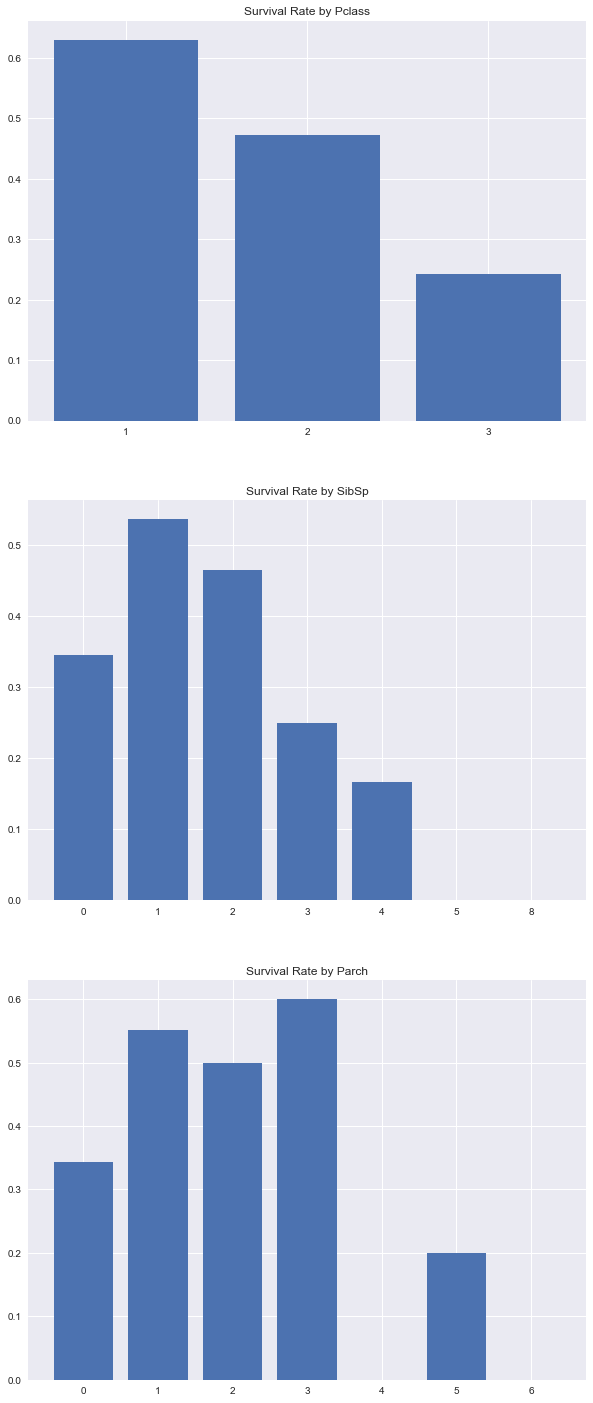

In [20]:
# visualize the different predictors vs the target values

fig, axes = subplots(3)
fig.set_size_inches(10, 25)
j = 0;

predictors = array(['Pclass', 'SibSp', 'Parch'])

for predictor in predictors:
    values = unique(df[predictor])
    survived = numpy.zeros(len(values))
    totals = numpy.zeros(len(values))
    
    
    for i in range(0, len(values)):
        survived[i] = sum(df['Survived'][df[predictor] == values[i]] == 1)
        totals[i] = len(df['Survived'][df[predictor] == values[i]])
    sca(axes[j])
    
    bar(arange(len(values)), survived/totals)
    xticks(arange(len(values)), values)
    
    axes[j].set_title( 'Survival Rate by ' + predictor)
    
    j+= 1
    
    

The graph titled 'Survival Rate by Pclass' shows us the percentage of each of the different Pclasses that survived. It is clear that a passenger's Pclass impacted their survival rate. Pclass 1 had the highest, followed by Pclass 2, and then Pclass 3, suggesting that passengers with higher socio-economic status had a better chance of survival.
   

Subgraphs relating to SibSp and Parch also show that having a smaller family unit improved survival. If a passenger traveled with more than four childern and parents, then their chances of survival dropped significantly. This might suggest that passengers with many children or parents gave up their seat on a life boat for their chilren/parents. The same results are reflected in the SibSp chart; traveling with less than two siblings and spouses greatly increased your chance of survival.

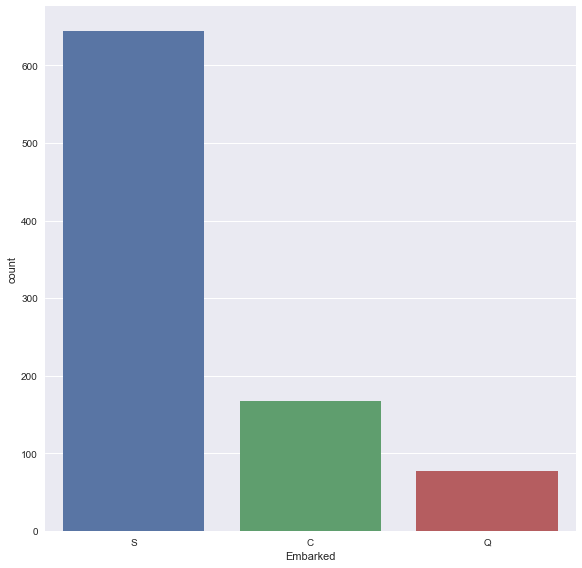

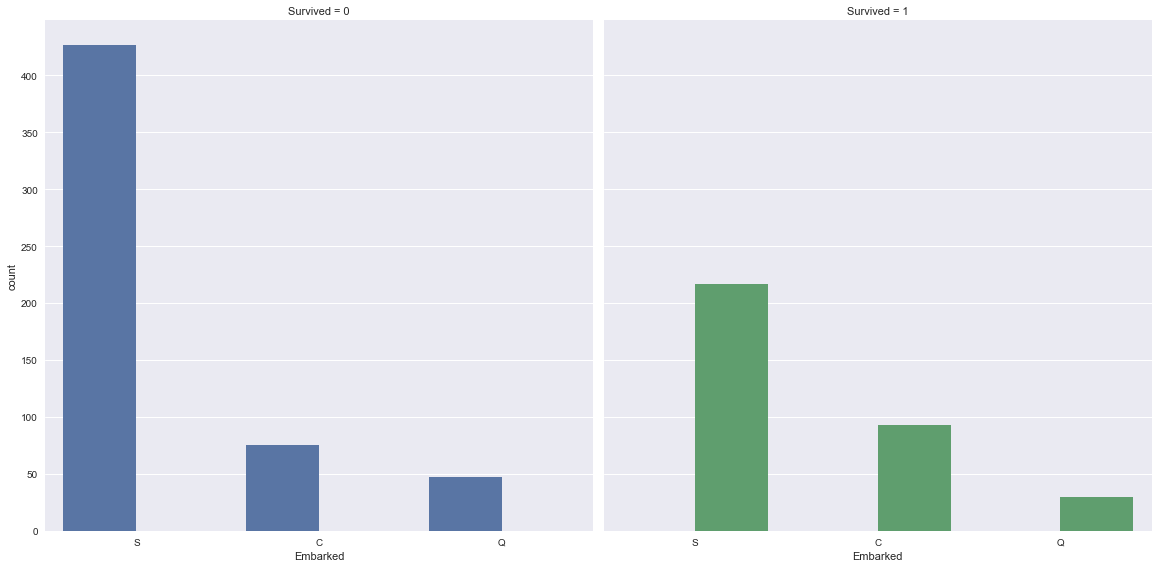

In [21]:
# a look at the embarked data
sns.factorplot(x="Embarked", kind="count", size=8, data=df)
sns.factorplot(x="Embarked", hue="Survived", col="Survived", kind="count", size=8, data=df)

By examining the 'Embarked' variable we can see that most of the passengers boarded at Southampton. Since more people boarded at that location, it isn't surprising that it had the greatest number of survivors. When we examine the three locations by survival percentage (See below), it is clear that Cherbourg had the highest percentage of survivors. This could be explained by the class of the guest that boarded at each location.

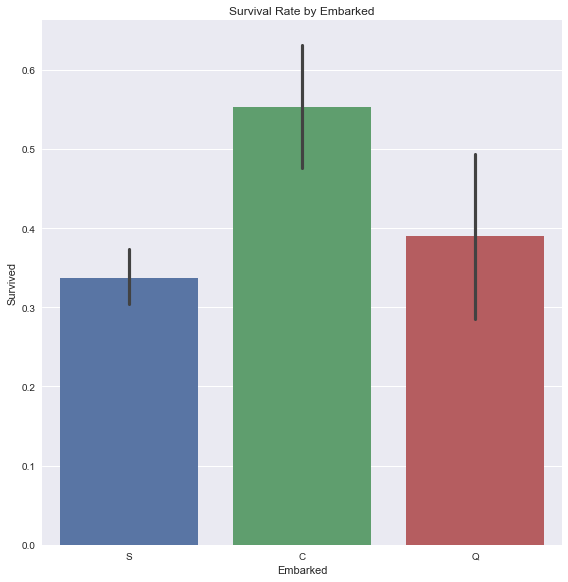

In [22]:
sns.factorplot(x="Embarked", y="Survived", kind="bar", size=8, data=df)
sns.plt.title('Survival Rate by Embarked')

The graph below shows the distribution of Pclass that boarded at each location. As we guessed, most of the passengers that boarded at Cherbourg belonged to a higher socio-economic class, specifically Pclass 1. We already know that Pclass 1 has the highest survival rate among the different Pclasses, so this helps to explain why Cherbourg had such a high survival percentage.

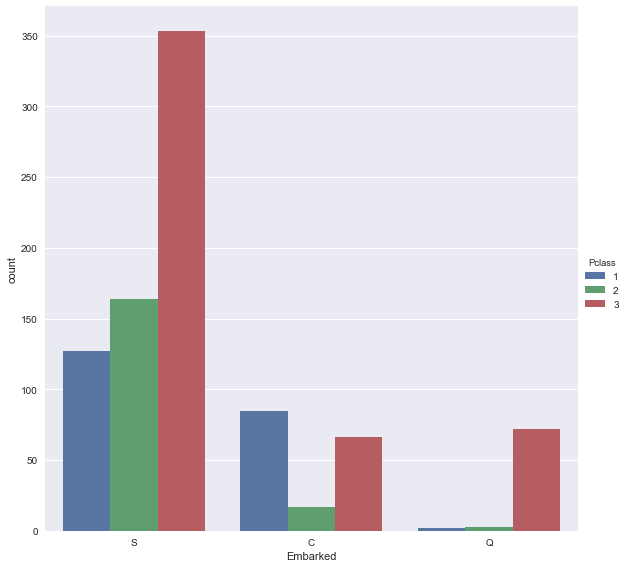

In [23]:
sns.factorplot(x="Embarked", hue = 'Pclass', kind="count", size=8, data=df)

Below we can see graphs that display both the total number that survived and the survival percentage categorized by sex. It is clear there were more female passengers that survived and that the percentage of females that survived is much higher than the percentage of males that survived.

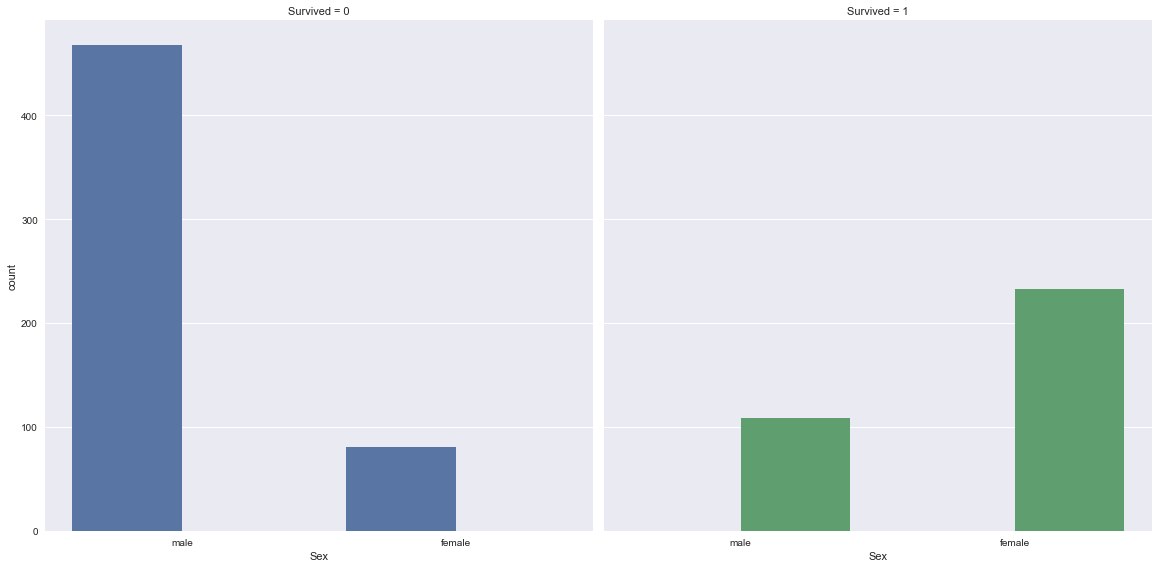

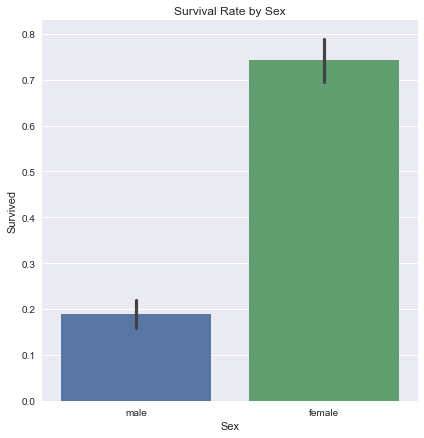

In [24]:
sns.factorplot(x="Sex", hue="Survived", col="Survived", kind="count", size=8, data=df)
sns.factorplot(x="Sex", y="Survived", kind="bar", size=6, data=df)
sns.plt.title('Survival Rate by Sex')

We can also examine the survival rate of the sexes by their Pclass. As expected, females have a higher rate of surival than the males in the same Pclass. It's interesting that see that a female in Pclass 3 has a better change of surival than a male in Pclass 1.

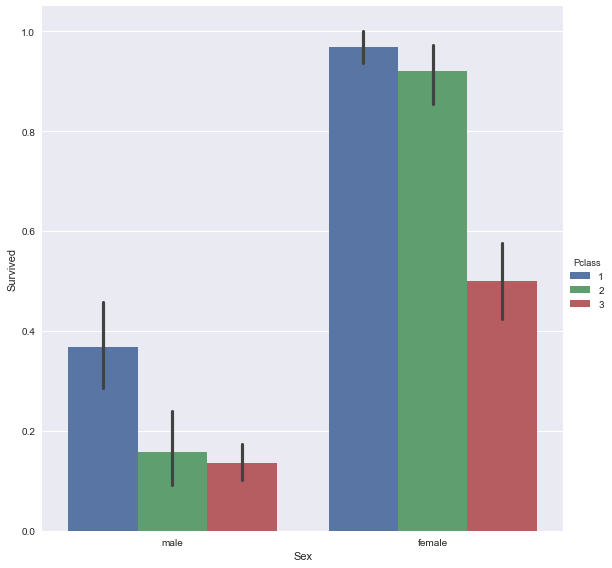

In [25]:
sns.factorplot(x="Sex", y="Survived", hue="Pclass", kind="bar", size=8, data=df)

We will now take a look at the survival rate based on the age of the passenger.For this we group each passenger into one of five age groups - child, young adult, adult, elderly, or unknown. If a passenger is missing their age value we put them in the unknown group for now. These age groups are used only for the visualizations, not as actual predictors. In our model we use the exact age of each passenger as the predictor.

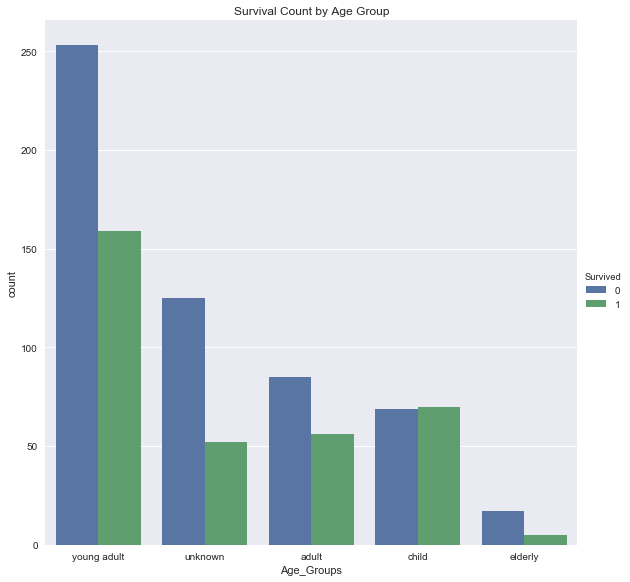

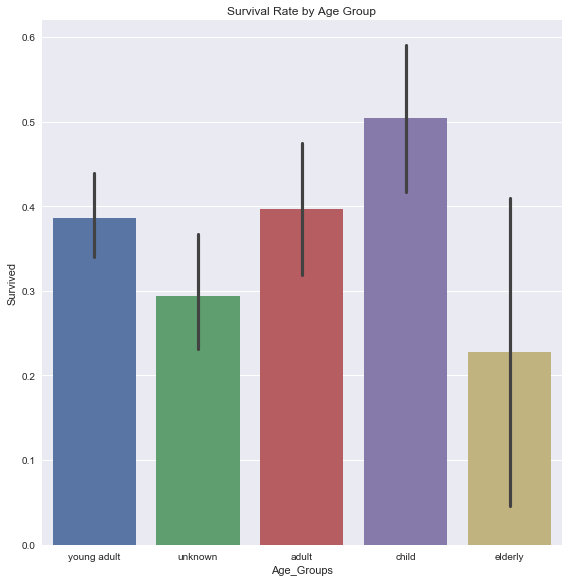

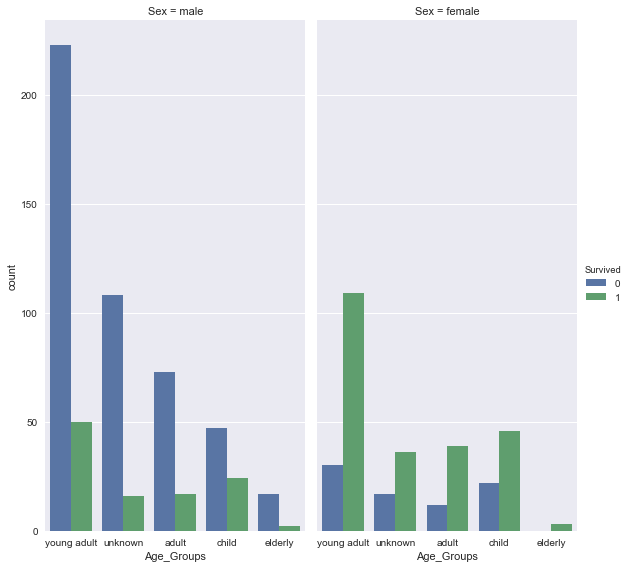

In [12]:
def age_range(age):
    if age > 60: return 'elderly'
    elif 39 < age <= 60: return 'adult'
    elif 18 < age <= 39: return 'young adult'
    elif age <= 18: return 'child'
    else: return 'unknown'  
    
df['Age_Groups'] = df.Age.map(age_range)
sns.factorplot(x="Age_Groups", hue="Survived", kind="count", size = 8, data=df)
sns.plt.title('Survival Count by Age Group')
sns.factorplot(x="Age_Groups", y="Survived", kind="bar", size = 8, data=df)
sns.plt.title('Survival Rate by Age Group')
sns.factorplot(x="Age_Groups", hue="Survived", col="Sex", kind="count", aspect=0.5, size = 8, data=df)

As you can see above, children had the highest survival rate among all age groups. When you consider gender as well you see that more females survived than males in each age group. It seems the saying of "women and children first" holds true for the titanic. 

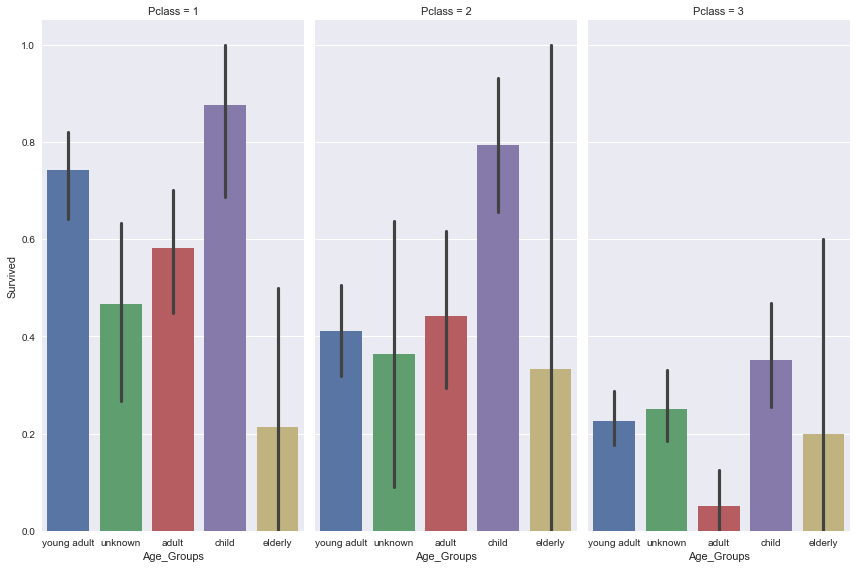

In [15]:
sns.factorplot(x="Age_Groups", y="Survived", col="Pclass", kind="bar", aspect=0.5, size = 8, data=df)

If we examine each age group by their Pclass, we see that higher socio-economic groups tend to have higher survival rates than their counterpart in lower socio-economic groups. This reinforces our above findings. We also note that children have the highest survival rate out of every Pclass group. 

Finally, we examine the survival rate by Fare.

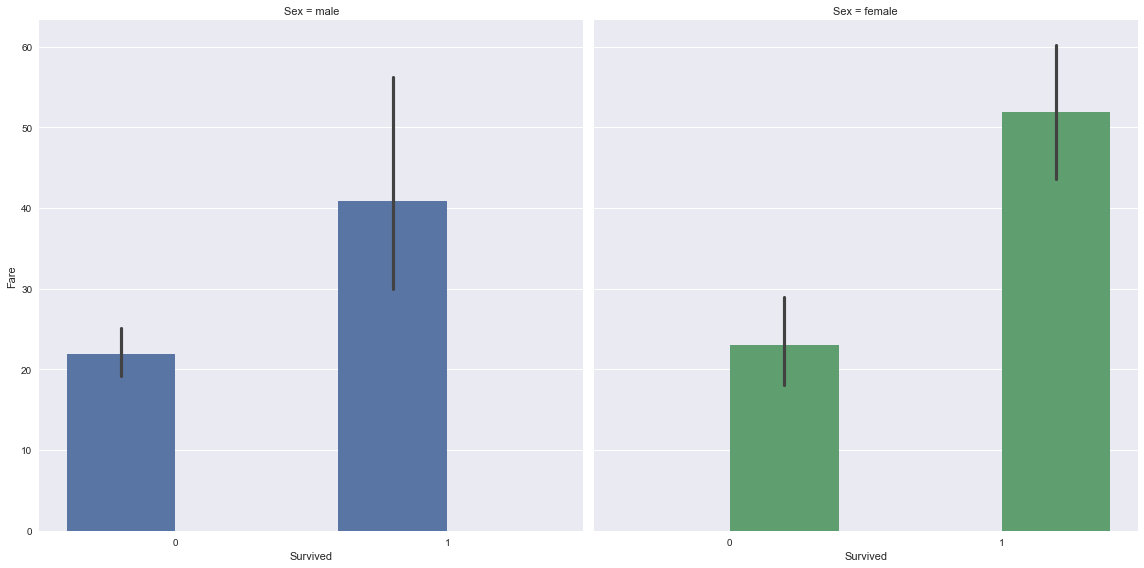

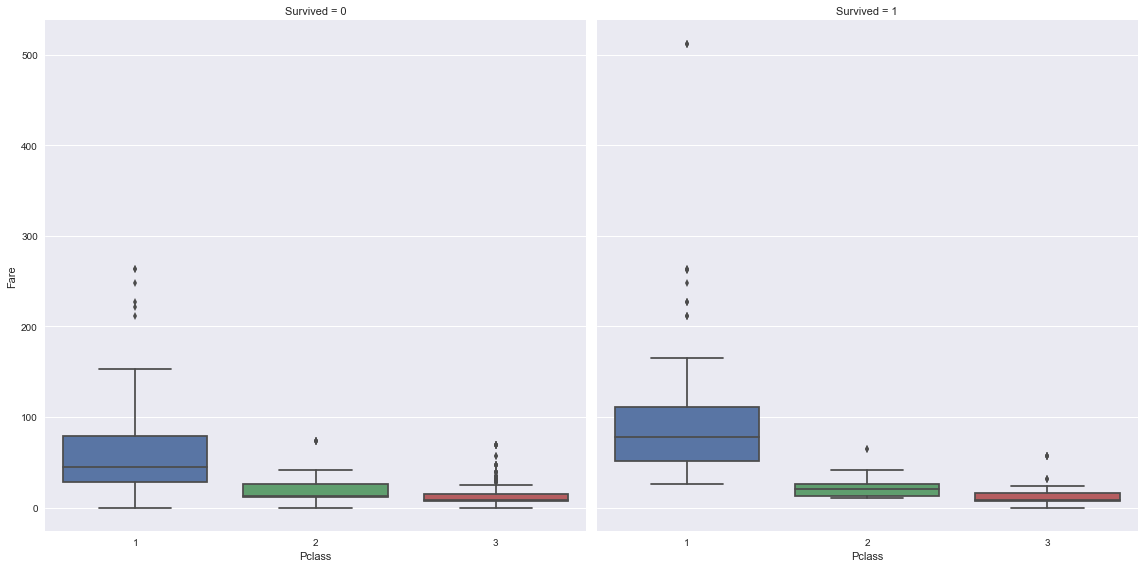

In [68]:
sns.factorplot(x="Survived", y="Fare", hue="Sex", col="Sex", kind="bar", size = 8, data=df)
sns.factorplot(x="Pclass", y="Fare", col = "Survived", kind="box", size = 8, data=df)

It's interesting to note that passengers that paid a higher fare amount tended to have a higher rate of survival. This could have to do with the 'Cabin' group. Customers that payed more for their fare might have ended up in cabins closer to the stairs or to the life boats. This could help them get to the boats faster, which would increase their survival rate.

# Feature Extraction

### Title

Now that we have read in our data, we can begin to consider some new features. At first glance the 'Name' column seems useless; we can't just use it as a predictor since almost every passenger will have a unique name. However we can extract the title from each passenger and add this into our models. This might give us even more ensight into the socio-economic status of a passenger.

In [95]:
def prefix(name):
    return name[name.find(", ") + 2 :name.find(".")].strip()

In [96]:
df["Title"] = df.Name.map(prefix)

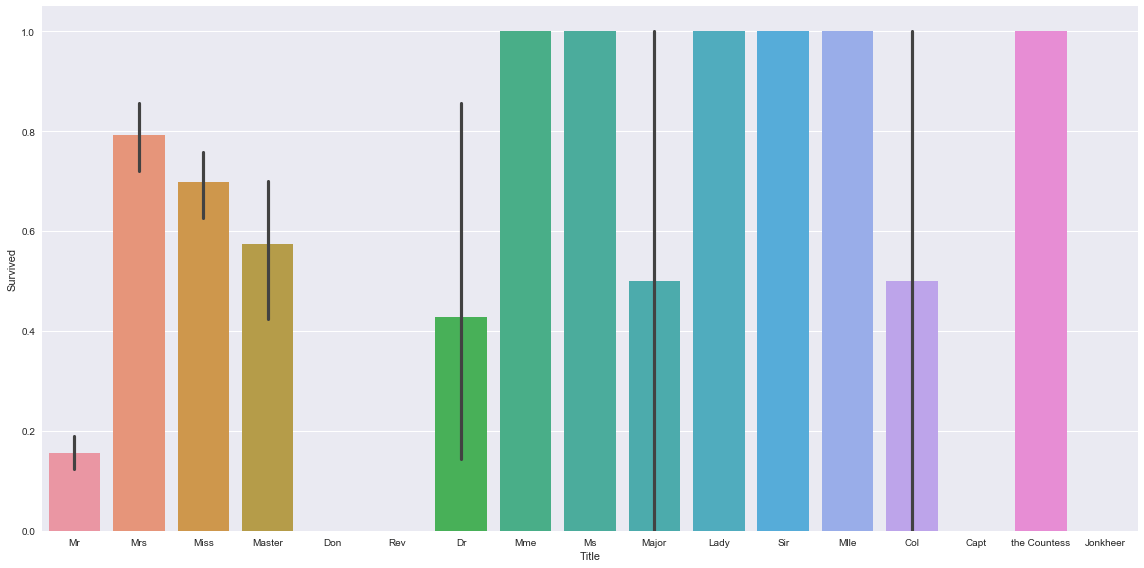

In [97]:
sns.factorplot(x="Title", y="Survived", kind="bar", size=8, aspect = 2, data=df)

As you can see above, classes that are associated with higher socio-economic status, like Lady, Sir, or  the Countess, have a higher survival rate. This graph also reinforces the data showing that females are more likely to survive than males. Titles associated with women, like Mrs, and Ms, have a much higher survival rate than the male counterpart Mr and Master. This graph can may be misleading since some titles are associated with very few passengers. To avoid overfitting we will group upper socio-economic male titles into a group called 'sir' and the upper socio-economic females titles into a group called 'Lady'.

In [98]:
df.loc[(df.Title == 'Don') |
       (df.Title == 'Sir') |
       (df.Title == 'Col') |
       (df.Title == 'Don') |
       (df.Title == 'Dr') |
       (df.Title == 'Jonkheer') |
       (df.Title == 'Capt') |
       (df.Title == 'Major') |
       (df.Title == 'Rev'), 'Title']='Sir'

In [99]:
df.loc[(df.Title == 'Lady') |
       (df.Title == 'the Countess') |
       (df.Title == 'Mme') |
       (df.Title == 'Ms') |
       (df.Title == 'Mlle'), 'Title']='Lady'

Below is a chart that shows the survival rate of the new groups. We can see that the 'Lady' group has the highest surival rate, which is to be expected. We also see that the 'Sir' group has a higher survival rate than the 'Mr' group. This is also expected since groups with a higher socio-economic status generally have a higher survival rate than other groups of the same gender.

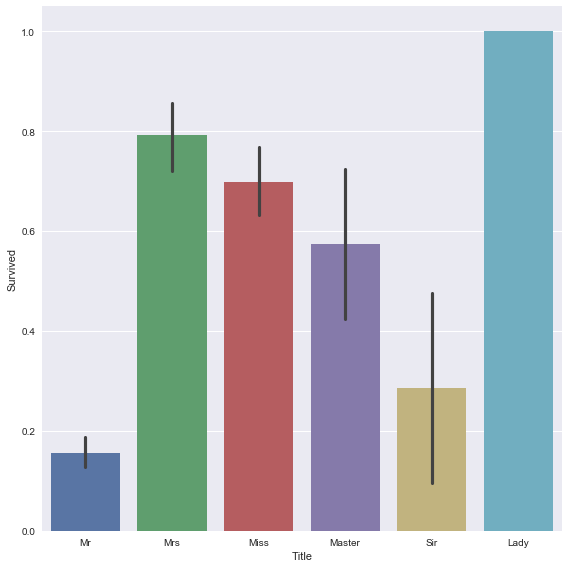

In [100]:

sns.factorplot(x="Title", y="Survived", kind="bar", size=8, data=df)


### Family Size

We thought it might also be worthwhile to examine the size of the family each passenger was traveling with. This can be accomplished by adding the number of siblings and spouses a passenger is traveling with (SibSp) and the number of parents and children a passenger is traveling with (Parch). From the results above we expect that smaller families units will have a higher rate of survival.

In [101]:
df["Family_size"] = df.SibSp + df.Parch + 1

The graph below displays the rate of survival for the family size each passenger is traveling with. As expected smaller families have a higher survival rate.

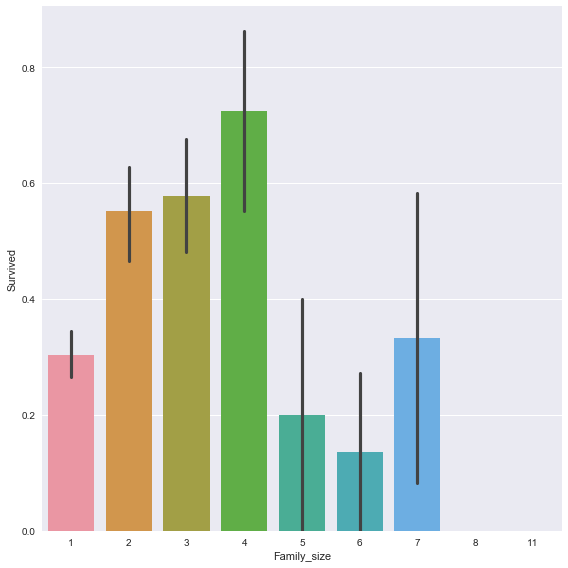

In [13]:
sns.factorplot(x="Family_size", y="Survived", kind="bar", size=8, data=df)

# Preprocessing of Data

We decided to impute the missing values in our data. This allowed us to use passengers with missing values in our training set. Each section will discuess how we calculated the missing values for each category. After these values were calculated we converted each categorical variable, such as Title or Pclass, into several that use one hot encoding. 

In [102]:
lb = LabelBinarizer()
scaler = StandardScaler()
imputer = Imputer(strategy="median")

### Age

We noticed that there were several passengers that were missing their age. To compute this we will use the median age of the Pclass and Title groups that the passenger belongs to. Below we can see that each Title group has a different age associated with the differnt Pclasses. By including multiple levels in this fashion, we should get a more realistic estimate on the passengers' age.

In [103]:
df.groupby(['Pclass','Title'])['Age'].median()

Pclass  Title 
1       Lady      24.0
        Master     4.0
        Miss      30.0
        Mr        40.0
        Mrs       41.5
        Sir       49.0
2       Lady      28.0
        Master     1.0
        Miss      24.0
        Mr        31.0
        Mrs       32.0
        Sir       46.5
3       Master     4.0
        Miss      18.0
        Mr        26.0
        Mrs       31.0
Name: Age, dtype: float64

In [104]:
df['Age'] = df.groupby(['Pclass','Title'])['Age'].transform(lambda x:x.fillna(x.median()))

### Embarked

Two passengers were missing the embarkment location. Their infomation is shown below:

In [18]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1


We can see that both the passengers were female and belonged to Pclass 1. Below is a graph that shows the distribution of where females in Pclass 1 boarded. Since most of them boarded at Southampton, we will use it as the embarked location for the two passengers.

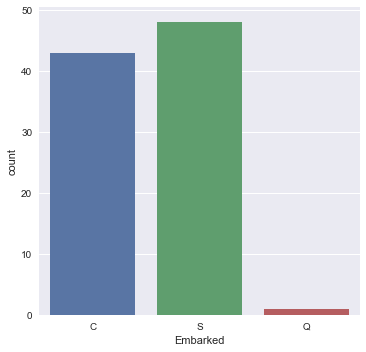

In [105]:
sns.factorplot(x="Embarked", kind="count", data=df[(df['Sex'] == 'female') & (df['Pclass'] == 1)], size=5)

In [106]:
embark_filler = 'S'
df.loc[(df.Embarked.isnull()), 'Embarked'] = embark_filler

embark = lb.fit_transform(df['Embarked'])
embark_columns = lb.classes_
embarked = pd.DataFrame(data=embark, columns=embark_columns)

### Title

There were now missing values in Title.

In [107]:
title = lb.fit_transform(df['Title'])
title_columns = lb.classes_
titles = pd.DataFrame(data=title, columns=title_columns)

### Pclass

There were no missing values in Pclass.

In [108]:
pclass = lb.fit_transform(df['Pclass'])
pclass_columns = ['Class1', 'Class2', 'Class3']
pclasses = pd.DataFrame(data=pclass, columns=pclass_columns)

### Sex

There were no missing values in Sex.

In [109]:
sex = lb.fit_transform(df['Sex'])
genders = pd.DataFrame(data=sex, columns=['Sex_transform'])

### Combine Transformed Dataframes into Training Dataset

Now we combine all of the one hot encoded dataframes we created above to use as testing data. We also normalize our data in this step. This allows the unit changes for each predictor to have a more equal impact on our models. If we didn't normalize the data then changes in large integers, like age, might have more of an impact than changes in smaller integers in our data, like SibSp.

In [110]:
numerical_attributes=['SibSp', 'Parch', 'Age', 'Family_size', 'Fare']
data = pd.concat([df[numerical_attributes], embarked, titles, pclasses, genders], axis=1)
numerical_attributes=['SibSp', 'Parch', 'Age', 'Family_size', 'Fare']
# scale the numerical attributes
data[numerical_attributes] = scaler.fit_transform(data[numerical_attributes])
targets = df['Survived']

# Model Building

The first models we choose to explore were based on our findings in Orange. SVC, Random Forest, and Adaboosting had the highest accuracy rate, so these were the first models we explored. Since the classification rate wasn't satisfactory we ended up exploring more models. Each section below discusses the different models and how we tuned the parameters. A seed was set for testing purposes.

In [43]:
seed = 12345

### SVC Model

The first model we will build will be a support vector classifier. For this model we will try to tune gamma, which is the kernel coeffecient, and C, which is the penalty parameter for the error term. When we were first tuning the gamma value we tested different magnitude values (now commented out) to find the region we should be searching. This resulted in the gamma range you see below. To find the region for the penalty parameter we followed the same procedure. We also decided to hold back to testing set to see the approximate accuracy of our model. 

In [143]:
# determine the best SVC model

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.25, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 
                    'gamma': np.arange(1e-4, 1e-2, 1e-3),#[1e-1, 1e-2, 1e-3],
                     'C': [150, 175, 180, 200]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10,
                       scoring='accuracy')
clf.fit(X_train, y_train)

print('Best parameters for our model: ')
print(clf.best_params_)

y_true, y_pred = y_test, clf.predict(X_test)
print('\nClassification Report for SVC Model with above parameters:')
print(classification_report(y_true, y_pred))


Best parameters for our model: 
{'C': 150, 'gamma': 0.0051000000000000004, 'kernel': 'rbf'}

Classification Report for SVC Model with above parameters:
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       139
          1       0.76      0.73      0.74        84

avg / total       0.81      0.81      0.81       223



The output above shows that our model is about 81% accurate. 

### Random Forest Model

For our random forest classifier we will be tuning n_estimators, which is the number of trees built, the criterion, the maximum features considered, the maximum depth our of trees, and whether or not the data is bootstraped. We followed the same procedure as the SVC model to determine the ranges we were searching for our parameter tuning. Again, we left out some test data to gauge the approximate accuracy of our model.

In [144]:
# determine the best RandomForest model

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.5, random_state=0)

tuned_parameters = [{'n_estimators': [300, 400], 
                     'criterion': ['gini', 'entropy'],
                     'max_features': ['auto', 'sqrt', 'log2'],
                     'max_depth': [5, 7],
                     'bootstrap': [True, False]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,
                       scoring='accuracy')

clf.fit(X_train, y_train)

print('Best parameters for our model: ')
print(clf.best_params_)

y_true, y_pred = y_test, clf.predict(X_test)
print('\nClassification Report for Random Forest Model with above parameters:')
print(classification_report(y_true, y_pred))

Best parameters for our model: 
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}

Classification Report for Random Forest Model with above parameters:
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       283
          1       0.76      0.75      0.76       163

avg / total       0.82      0.82      0.82       446



The output above shows that our model is about 82% accurate. With random forest classifiers we are also able to show the importance of our features in building the model.

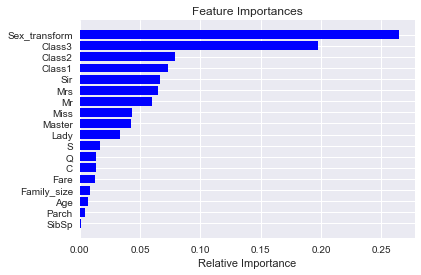

In [158]:
clf = RandomForestClassifier(n_estimators = 300, bootstrap = False, max_depth = 5)
clf.fit(data, targets)

importances = clf.feature_importances_
features = np.array(['SibSp', 'Parch', 'Age', 'Family_size', 'Fare', 'C', 'Q', 'S', 'Lady', 'Master', 'Miss', 'Mr',
                     'Mrs', 'Sir', 'Class1', 'Class2', 'Class3', 'Sex_transform'])
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

As we can see above, Sex seems to be the most important feature, followed by the Pclass of the passenger. This suggests that gender has the biggest influence on who survives. This reinforces the graphs above that show females survive more often than males, regardless of the passenger's Pclass.

### Adaboosting Model

Another model we choose to explore was the adaboosting model. For this model we choose to tune the number of estimators, the learning rate, and the algoirthm used by the model. We set aside some test data to give the approximate accuracy of the tuned model.

In [150]:
#determine the best Adaboost model

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.5, random_state=0)

tuned_parameters = [{'n_estimators': [50, 100, 150], 
                     'learning_rate': [1, .5, .25, .1],
                     'algorithm': ['SAMME', 'SAMME.R']}]

clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=10,
                       scoring='accuracy')

clf.fit(X_train, y_train)

print('Best parameters for our model: ')
print(clf.best_params_)

y_true, y_pred = y_test, clf.predict(X_test)
print('\nClassification Report for Random Forest Model with above parameters:')
print(classification_report(y_true, y_pred))

Best parameters for our model: 
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

Classification Report for Random Forest Model with above parameters:
             precision    recall  f1-score   support

          0       0.85      0.82      0.83       283
          1       0.70      0.74      0.72       163

avg / total       0.79      0.79      0.79       446



The classification report above shows that our model is approximately 79% accurate.

### Gradient Boosting Classifier

We also fit a gradient boosting classifier. For this model we tuned the number of boosting stages to perform, the maximum depth of the regression estimators, the minimum number of samples per leaf, the maximum number of features used when considering a split, and the learning rate. Again we set back some data to calculate the approximate accuracy of the model.

In [155]:
# Tune parameters and fit Gradient Boosting Classifier to identify the best parameters

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=seed)

parameters = {
   'n_estimators': [1000, 1100],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_leaf': [5, 11, 17, 21],
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.001, 0.01, 0.1]   
}

gbc = GradientBoostingClassifier(random_state=seed)
gbc_gscv = GridSearchCV(estimator=gbc, cv=10, param_grid=parameters, scoring='accuracy').fit(X_train, y_train)

print('Best parameters for our model: ')
print(gbc_gscv.best_params_)

y_true, y_pred = y_test, gbc_gscv.predict(X_test)
print('\nClassification Report for Gradient Boosting Classifier Model with above parameters:')
print(classification_report(y_true, y_pred))

Best parameters for our model: 
{'learning_rate': 0.001, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 1000}

Classification Report for Gradient Boosting Classifier Model with above parameters:
             precision    recall  f1-score   support

          0       0.75      0.94      0.83       131
          1       0.86      0.54      0.67        92

avg / total       0.79      0.78      0.76       223



The classification report above shows that our model is approximately 79% accurate.

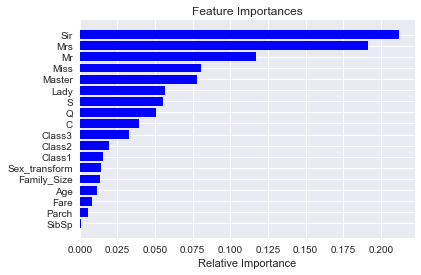

In [44]:
params = {'n_estimators': 1000, 'max_depth': 6,
          'min_samples_leaf': 5, 'learning_rate': 0.001,
          'max_features': 'sqrt', 'random_state': seed}

gbcm = GradientBoostingClassifier(**params).fit(data, targets)

importances = gbcm.feature_importances_
features = np.array(['SibSp','Parch','Fare', 'Age',
              'Family_Size', 'Sex_transform',
              'Class1','Class2','Class3',
              'C','Q','S','Lady','Master','Miss',
              'Mr','Mrs','Sir'])

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

For this model the 'Title' group was the most important feature when fitting the model.

### DNN Classifier

We will also fit a DNN classifier. For this problem we will be tuning the number of nodes in each hidden layer. We chose to stick with two hidden layers. After experimenting with the magnitude of the number of nodes in each layer (3, 5, 10, 50, 100, 1000), we found that our accuracy was highest when we selected a number that is smaller than the number of predictors in our model. With that in mind we tuned our model by testing every combination of the number of nodes from one to the max number of predictors for each layer. We calculated the accuracy by setting some data back and using it as a validation set. After the model was fit we predicted values for the validation set and compared the predictions to the true value.

In [60]:
X_train = data.iloc[:600, :].astype(np.float32)
y_train = targets.iloc[:600].astype(np.float32)
X_test = data.iloc[600:, :].astype(np.float32)
y_test = targets.iloc[600:].astype(np.float32)

feature_columns = [tf.feature_column.numeric_column('x', shape=[18])]

#FOR TESTING (evaluate 144 different combos of hidden layers)
accuracies = np.zeros((17, 17))


for i in range(17):
    for j in range(17):
        
        classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                                  hidden_units=[i+16, j+16],
                                                  n_classes=2,
                                                  optimizer=tf.train.AdamOptimizer())

        train_input_fn = tf.estimator.inputs.numpy_input_fn(
              x={"x": np.array(X_train)},
              y=np.array(y_train),
              num_epochs=None,
              shuffle=True)

        classifier.train(input_fn=train_input_fn, steps=5000)

        test_input_fn = tf.estimator.inputs.numpy_input_fn(
              x={"x": np.array(X_test)},
              y=np.array(y_test),
             num_epochs=1,
              shuffle=False)

        accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
        accuracies[i, j] = accuracy_score

print("Finished")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpy5vng3ko', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020736423470>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpy5vng3ko\model.ckpt.
INFO:tensorflow:loss = 92.5319, step = 1
INFO:tensorflow:global_step/sec: 741.297
INFO:tensorflow:loss = 66.8455, step = 101 (0.137 sec)
INFO:tensorflow:global_step/sec: 1139.02
INFO:tensorflow:loss = 53.8737, step = 201 (0.087 sec)
I

INFO:tensorflow:loss = 53.7732, step = 1001 (0.097 sec)
INFO:tensorflow:global_step/sec: 1017.61
INFO:tensorflow:loss = 38.2401, step = 1101 (0.096 sec)
INFO:tensorflow:global_step/sec: 1001.94
INFO:tensorflow:loss = 48.8312, step = 1201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1150.29
INFO:tensorflow:loss = 46.3403, step = 1301 (0.097 sec)
INFO:tensorflow:global_step/sec: 865.421
INFO:tensorflow:loss = 33.7241, step = 1401 (0.108 sec)
INFO:tensorflow:global_step/sec: 1183.27
INFO:tensorflow:loss = 33.591, step = 1501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1218.05
INFO:tensorflow:loss = 35.6057, step = 1601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1204.74
INFO:tensorflow:loss = 38.8165, step = 1701 (0.089 sec)
INFO:tensorflow:global_step/sec: 1149.33
INFO:tensorflow:loss = 39.2925, step = 1801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1203.72
INFO:tensorflow:loss = 39.325, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1240.59
INFO:tensorflow:loss = 38.5251, 

INFO:tensorflow:global_step/sec: 1055.39
INFO:tensorflow:loss = 39.2739, step = 2901 (0.095 sec)
INFO:tensorflow:global_step/sec: 1132.12
INFO:tensorflow:loss = 33.7896, step = 3001 (0.081 sec)
INFO:tensorflow:global_step/sec: 856.505
INFO:tensorflow:loss = 32.1518, step = 3101 (0.124 sec)
INFO:tensorflow:global_step/sec: 1055.22
INFO:tensorflow:loss = 31.7355, step = 3201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1101.96
INFO:tensorflow:loss = 36.9793, step = 3301 (0.090 sec)
INFO:tensorflow:global_step/sec: 951.86
INFO:tensorflow:loss = 42.7278, step = 3401 (0.105 sec)
INFO:tensorflow:global_step/sec: 1118.36
INFO:tensorflow:loss = 42.1852, step = 3501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1044.29
INFO:tensorflow:loss = 28.2678, step = 3601 (0.099 sec)
INFO:tensorflow:global_step/sec: 1139.78
INFO:tensorflow:loss = 34.3351, step = 3701 (0.089 sec)
INFO:tensorflow:global_step/sec: 1112.45
INFO:tensorflow:loss = 46.5979, step = 3801 (0.089 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 93.5079, step = 1
INFO:tensorflow:global_step/sec: 701.036
INFO:tensorflow:loss = 72.4709, step = 101 (0.143 sec)
INFO:tensorflow:global_step/sec: 1154.46
INFO:tensorflow:loss = 57.1777, step = 201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1015.9
INFO:tensorflow:loss = 40.7098, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1187.73
INFO:tensorflow:loss = 52.3708, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1201.88
INFO:tensorflow:loss = 51.4237, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1344.08
INFO:tensorflow:loss = 52.5129, step = 601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1012.8
INFO:tensorflow:loss = 44.7417, step = 701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1302.47
INFO:tensorflow:loss = 51.0431, step = 801 (0.075 sec)
INFO:tensorflow:global_step/sec: 995.328
INFO:tensorflow:loss = 51.0938, step = 901 (0.118 sec)
INFO:tensorflow:global_step/sec: 874.086
INFO:tensorflow:loss = 52.27, step = 1001 (0.103 sec)
IN

INFO:tensorflow:loss = 39.3603, step = 1901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1219.81
INFO:tensorflow:loss = 32.6446, step = 2001 (0.081 sec)
INFO:tensorflow:global_step/sec: 1219.29
INFO:tensorflow:loss = 36.0954, step = 2101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1280.5
INFO:tensorflow:loss = 50.0557, step = 2201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1208.54
INFO:tensorflow:loss = 38.7459, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1186.8
INFO:tensorflow:loss = 27.2463, step = 2401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1200.39
INFO:tensorflow:loss = 44.8128, step = 2501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1204.8
INFO:tensorflow:loss = 37.1435, step = 2601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1504.23
INFO:tensorflow:loss = 45.8386, step = 2701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1187.11
INFO:tensorflow:loss = 31.1371, step = 2801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1208.82
INFO:tensorflow:loss = 37.7254, s

INFO:tensorflow:global_step/sec: 1173.45
INFO:tensorflow:loss = 38.6404, step = 3801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1243.41
INFO:tensorflow:loss = 34.56, step = 3901 (0.077 sec)
INFO:tensorflow:global_step/sec: 1223.15
INFO:tensorflow:loss = 31.6165, step = 4001 (0.097 sec)
INFO:tensorflow:global_step/sec: 1002.52
INFO:tensorflow:loss = 34.9142, step = 4101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1183.31
INFO:tensorflow:loss = 26.3335, step = 4201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1190.52
INFO:tensorflow:loss = 33.4081, step = 4301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1011.64
INFO:tensorflow:loss = 33.7015, step = 4401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1153.31
INFO:tensorflow:loss = 42.4897, step = 4501 (0.087 sec)
INFO:tensorflow:global_step/sec: 1185.61
INFO:tensorflow:loss = 47.9355, step = 4601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1027.09
INFO:tensorflow:loss = 38.1418, step = 4701 (0.100 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpyfb_439y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073B767710>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpyfb_439y\model.ckpt.
INFO:tensorflow:loss = 91.3915, step = 1
INFO:tensorflow:global_step/sec: 762.11
INFO:tensorflow:loss = 61.268, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1040.5
INFO:tensorflow:loss = 52.0956, step = 201 (0.081 sec)
INFO

INFO:tensorflow:loss = 40.9064, step = 1001 (0.106 sec)
INFO:tensorflow:global_step/sec: 940.83
INFO:tensorflow:loss = 42.0955, step = 1101 (0.107 sec)
INFO:tensorflow:global_step/sec: 958.891
INFO:tensorflow:loss = 49.8799, step = 1201 (0.100 sec)
INFO:tensorflow:global_step/sec: 940.771
INFO:tensorflow:loss = 46.1451, step = 1301 (0.112 sec)
INFO:tensorflow:global_step/sec: 968.23
INFO:tensorflow:loss = 45.0612, step = 1401 (0.101 sec)
INFO:tensorflow:global_step/sec: 1345.62
INFO:tensorflow:loss = 35.3223, step = 1501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1207.48
INFO:tensorflow:loss = 39.0713, step = 1601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1004.71
INFO:tensorflow:loss = 28.2023, step = 1701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.32
INFO:tensorflow:loss = 49.1781, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1093.39
INFO:tensorflow:loss = 38.0987, step = 1901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1187.99
INFO:tensorflow:loss = 35.8494, 

INFO:tensorflow:global_step/sec: 1017.65
INFO:tensorflow:loss = 44.605, step = 2901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1039.41
INFO:tensorflow:loss = 36.9924, step = 3001 (0.095 sec)
INFO:tensorflow:global_step/sec: 1125.92
INFO:tensorflow:loss = 28.7, step = 3101 (0.098 sec)
INFO:tensorflow:global_step/sec: 1008.18
INFO:tensorflow:loss = 38.3335, step = 3201 (0.099 sec)
INFO:tensorflow:global_step/sec: 857.989
INFO:tensorflow:loss = 27.3192, step = 3301 (0.101 sec)
INFO:tensorflow:global_step/sec: 1000.64
INFO:tensorflow:loss = 44.0855, step = 3401 (0.100 sec)
INFO:tensorflow:global_step/sec: 997.668
INFO:tensorflow:loss = 34.8055, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1006.11
INFO:tensorflow:loss = 35.1798, step = 3601 (0.099 sec)
INFO:tensorflow:global_step/sec: 1174.91
INFO:tensorflow:loss = 37.5424, step = 3701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1205.02
INFO:tensorflow:loss = 32.5099, step = 3801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:global_step/sec: 1231.24
INFO:tensorflow:loss = 32.1838, step = 4801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1190.91
INFO:tensorflow:loss = 28.8205, step = 4901 (0.084 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpyjb2uk76\model.ckpt.
INFO:tensorflow:Loss for final step: 32.122.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:49:49
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpyjb2uk76\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:49:50
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.797251, accuracy_baseline = 0.635739, auc = 0.783223, auc_precision_recall = 0.789352, average_loss = 0.79097, global_step = 5000, label/mean = 0.364261, loss = 76.7241, prediction/mean = 0.372491
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpqhsdve73', '_tf_random_seed': None, '_save_su

INFO:tensorflow:loss = 89.0988, step = 1
INFO:tensorflow:global_step/sec: 661.76
INFO:tensorflow:loss = 61.0806, step = 101 (0.154 sec)
INFO:tensorflow:global_step/sec: 995.962
INFO:tensorflow:loss = 58.5051, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 978.275
INFO:tensorflow:loss = 47.5557, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1002.57
INFO:tensorflow:loss = 47.2161, step = 401 (0.100 sec)
INFO:tensorflow:global_step/sec: 997.203
INFO:tensorflow:loss = 51.086, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 995.189
INFO:tensorflow:loss = 50.3913, step = 601 (0.118 sec)
INFO:tensorflow:global_step/sec: 865.131
INFO:tensorflow:loss = 52.2392, step = 701 (0.098 sec)
INFO:tensorflow:global_step/sec: 1001.07
INFO:tensorflow:loss = 44.7216, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 1001.49
INFO:tensorflow:loss = 47.1939, step = 901 (0.100 sec)
INFO:tensorflow:global_step/sec: 920.365
INFO:tensorflow:loss = 46.7397, step = 1001 (0.111 sec)


INFO:tensorflow:loss = 30.8481, step = 1901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1120.54
INFO:tensorflow:loss = 50.1523, step = 2001 (0.089 sec)
INFO:tensorflow:global_step/sec: 893.578
INFO:tensorflow:loss = 34.6797, step = 2101 (0.115 sec)
INFO:tensorflow:global_step/sec: 939.62
INFO:tensorflow:loss = 38.7696, step = 2201 (0.099 sec)
INFO:tensorflow:global_step/sec: 997.162
INFO:tensorflow:loss = 39.275, step = 2301 (0.119 sec)
INFO:tensorflow:global_step/sec: 865.087
INFO:tensorflow:loss = 24.9286, step = 2401 (0.097 sec)
INFO:tensorflow:global_step/sec: 842.28
INFO:tensorflow:loss = 36.1832, step = 2501 (0.119 sec)
INFO:tensorflow:global_step/sec: 1000.6
INFO:tensorflow:loss = 42.6351, step = 2601 (0.100 sec)
INFO:tensorflow:global_step/sec: 859.904
INFO:tensorflow:loss = 37.108, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 999.598
INFO:tensorflow:loss = 29.8336, step = 2801 (0.116 sec)
INFO:tensorflow:global_step/sec: 996.703
INFO:tensorflow:loss = 38.9784, ste

INFO:tensorflow:global_step/sec: 932.061
INFO:tensorflow:loss = 28.6796, step = 3801 (0.106 sec)
INFO:tensorflow:global_step/sec: 1015.62
INFO:tensorflow:loss = 29.1291, step = 3901 (0.092 sec)
INFO:tensorflow:global_step/sec: 993.901
INFO:tensorflow:loss = 22.668, step = 4001 (0.101 sec)
INFO:tensorflow:global_step/sec: 1002.46
INFO:tensorflow:loss = 30.2681, step = 4101 (0.100 sec)
INFO:tensorflow:global_step/sec: 921.398
INFO:tensorflow:loss = 37.4518, step = 4201 (0.111 sec)
INFO:tensorflow:global_step/sec: 1096.5
INFO:tensorflow:loss = 35.712, step = 4301 (0.089 sec)
INFO:tensorflow:global_step/sec: 1188.55
INFO:tensorflow:loss = 36.6094, step = 4401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1340.23
INFO:tensorflow:loss = 39.9446, step = 4501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1173.48
INFO:tensorflow:loss = 28.558, step = 4601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1207.78
INFO:tensorflow:loss = 36.4854, step = 4701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmptjiedjul', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020736830630>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmptjiedjul\model.ckpt.
INFO:tensorflow:loss = 89.6693, step = 1
INFO:tensorflow:global_step/sec: 743.014
INFO:tensorflow:loss = 55.3882, step = 101 (0.135 sec)
INFO:tensorflow:global_step/sec: 1111.05
INFO:tensorflow:loss = 47.6131, step = 201 (0.090 sec)
I

INFO:tensorflow:loss = 40.6918, step = 1001 (0.112 sec)
INFO:tensorflow:global_step/sec: 1029.46
INFO:tensorflow:loss = 46.9027, step = 1101 (0.107 sec)
INFO:tensorflow:global_step/sec: 863.523
INFO:tensorflow:loss = 40.3052, step = 1201 (0.116 sec)
INFO:tensorflow:global_step/sec: 850.613
INFO:tensorflow:loss = 46.5148, step = 1301 (0.102 sec)
INFO:tensorflow:global_step/sec: 832.585
INFO:tensorflow:loss = 34.144, step = 1401 (0.120 sec)
INFO:tensorflow:global_step/sec: 1239.64
INFO:tensorflow:loss = 39.5589, step = 1501 (0.096 sec)
INFO:tensorflow:global_step/sec: 1010.25
INFO:tensorflow:loss = 34.1863, step = 1601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1187.05
INFO:tensorflow:loss = 40.3202, step = 1701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1208.29
INFO:tensorflow:loss = 45.8511, step = 1801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1187.43
INFO:tensorflow:loss = 41.0496, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1186.23
INFO:tensorflow:loss = 34.8863,

INFO:tensorflow:global_step/sec: 972.446
INFO:tensorflow:loss = 36.2953, step = 2901 (0.104 sec)
INFO:tensorflow:global_step/sec: 962.241
INFO:tensorflow:loss = 41.3536, step = 3001 (0.100 sec)
INFO:tensorflow:global_step/sec: 972.752
INFO:tensorflow:loss = 29.3108, step = 3101 (0.100 sec)
INFO:tensorflow:global_step/sec: 998.249
INFO:tensorflow:loss = 38.4429, step = 3201 (0.116 sec)
INFO:tensorflow:global_step/sec: 863.464
INFO:tensorflow:loss = 32.6122, step = 3301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1015.74
INFO:tensorflow:loss = 33.019, step = 3401 (0.114 sec)
INFO:tensorflow:global_step/sec: 978.478
INFO:tensorflow:loss = 28.9059, step = 3501 (0.104 sec)
INFO:tensorflow:global_step/sec: 899.72
INFO:tensorflow:loss = 29.4123, step = 3601 (0.097 sec)
INFO:tensorflow:global_step/sec: 1375.36
INFO:tensorflow:loss = 34.3834, step = 3701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1040.24
INFO:tensorflow:loss = 38.8896, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1216.21
INFO:tensorflow:loss = 27.5683, step = 4801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1173.3
INFO:tensorflow:loss = 24.2478, step = 4901 (0.082 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmphrap8abu\model.ckpt.
INFO:tensorflow:Loss for final step: 39.7004.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:51:41
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmphrap8abu\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:51:42
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.810997, accuracy_baseline = 0.635739, auc = 0.832254, auc_precision_recall = 0.811665, average_loss = 0.661061, global_step = 5000, label/mean = 0.364261, loss = 64.1229, prediction/mean = 0.415809
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmphm4v4e60', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 91.58, step = 1
INFO:tensorflow:global_step/sec: 678.815
INFO:tensorflow:loss = 58.5536, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1174.61
INFO:tensorflow:loss = 57.8136, step = 201 (0.104 sec)
INFO:tensorflow:global_step/sec: 937.072
INFO:tensorflow:loss = 48.673, step = 301 (0.091 sec)
INFO:tensorflow:global_step/sec: 1274.76
INFO:tensorflow:loss = 35.3849, step = 401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1198.78
INFO:tensorflow:loss = 40.2617, step = 501 (0.099 sec)
INFO:tensorflow:global_step/sec: 861.953
INFO:tensorflow:loss = 43.163, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 995.576
INFO:tensorflow:loss = 54.0216, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 923.31
INFO:tensorflow:loss = 46.9814, step = 801 (0.114 sec)
INFO:tensorflow:global_step/sec: 1100.27
INFO:tensorflow:loss = 49.3373, step = 901 (0.085 sec)
INFO:tensorflow:global_step/sec: 994.191
INFO:tensorflow:loss = 44.2592, step = 1001 (0.116 sec)
INF

INFO:tensorflow:loss = 48.4155, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1173.26
INFO:tensorflow:loss = 49.3607, step = 2001 (0.085 sec)
INFO:tensorflow:global_step/sec: 1201.02
INFO:tensorflow:loss = 36.6617, step = 2101 (0.079 sec)
INFO:tensorflow:global_step/sec: 1211.44
INFO:tensorflow:loss = 48.5375, step = 2201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1412.35
INFO:tensorflow:loss = 44.501, step = 2301 (0.086 sec)
INFO:tensorflow:global_step/sec: 1007.69
INFO:tensorflow:loss = 45.5348, step = 2401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1257.11
INFO:tensorflow:loss = 44.1029, step = 2501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1305.52
INFO:tensorflow:loss = 43.0883, step = 2601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1107.82
INFO:tensorflow:loss = 40.4089, step = 2701 (0.090 sec)
INFO:tensorflow:global_step/sec: 1192.54
INFO:tensorflow:loss = 32.6025, step = 2801 (0.084 sec)
INFO:tensorflow:global_step/sec: 999.627
INFO:tensorflow:loss = 30.6759,

INFO:tensorflow:global_step/sec: 1166.47
INFO:tensorflow:loss = 30.8911, step = 3801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1239.48
INFO:tensorflow:loss = 25.2999, step = 3901 (0.078 sec)
INFO:tensorflow:global_step/sec: 1200.84
INFO:tensorflow:loss = 34.6647, step = 4001 (0.088 sec)
INFO:tensorflow:global_step/sec: 1186.36
INFO:tensorflow:loss = 35.3031, step = 4101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1338.67
INFO:tensorflow:loss = 27.9607, step = 4201 (0.072 sec)
INFO:tensorflow:global_step/sec: 1068.64
INFO:tensorflow:loss = 42.2634, step = 4301 (0.097 sec)
INFO:tensorflow:global_step/sec: 1539.7
INFO:tensorflow:loss = 29.4153, step = 4401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1215.59
INFO:tensorflow:loss = 32.6758, step = 4501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1197.53
INFO:tensorflow:loss = 38.5, step = 4601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1089.54
INFO:tensorflow:loss = 32.1645, step = 4701 (0.076 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpqsvs21l6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073B50FB70>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpqsvs21l6\model.ckpt.
INFO:tensorflow:loss = 88.7417, step = 1
INFO:tensorflow:global_step/sec: 680.01
INFO:tensorflow:loss = 67.8256, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1128.6
INFO:tensorflow:loss = 50.7202, step = 201 (0.089 sec)
INF

INFO:tensorflow:loss = 48.8108, step = 1001 (0.109 sec)
INFO:tensorflow:global_step/sec: 1011.83
INFO:tensorflow:loss = 38.1981, step = 1101 (0.099 sec)
INFO:tensorflow:global_step/sec: 1027.6
INFO:tensorflow:loss = 38.3586, step = 1201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1006.06
INFO:tensorflow:loss = 42.5174, step = 1301 (0.115 sec)
INFO:tensorflow:global_step/sec: 994.75
INFO:tensorflow:loss = 38.6015, step = 1401 (0.091 sec)
INFO:tensorflow:global_step/sec: 1201.83
INFO:tensorflow:loss = 40.5511, step = 1501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1260.36
INFO:tensorflow:loss = 36.2448, step = 1601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1074.16
INFO:tensorflow:loss = 31.7043, step = 1701 (0.096 sec)
INFO:tensorflow:global_step/sec: 1309.93
INFO:tensorflow:loss = 42.9217, step = 1801 (0.073 sec)
INFO:tensorflow:global_step/sec: 1190.15
INFO:tensorflow:loss = 32.1211, step = 1901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1008.21
INFO:tensorflow:loss = 36.1338, 

INFO:tensorflow:global_step/sec: 924.118
INFO:tensorflow:loss = 31.2269, step = 2901 (0.114 sec)
INFO:tensorflow:global_step/sec: 936.379
INFO:tensorflow:loss = 29.337, step = 3001 (0.107 sec)
INFO:tensorflow:global_step/sec: 946.499
INFO:tensorflow:loss = 36.5388, step = 3101 (0.106 sec)
INFO:tensorflow:global_step/sec: 1061.12
INFO:tensorflow:loss = 38.9014, step = 3201 (0.088 sec)
INFO:tensorflow:global_step/sec: 983.627
INFO:tensorflow:loss = 32.5402, step = 3301 (0.102 sec)
INFO:tensorflow:global_step/sec: 1013.02
INFO:tensorflow:loss = 36.3383, step = 3401 (0.119 sec)
INFO:tensorflow:global_step/sec: 832.314
INFO:tensorflow:loss = 43.416, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1078.58
INFO:tensorflow:loss = 31.5743, step = 3601 (0.096 sec)
INFO:tensorflow:global_step/sec: 1414.37
INFO:tensorflow:loss = 28.4696, step = 3701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1193.4
INFO:tensorflow:loss = 29.6767, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 1166.45
INFO:tensorflow:loss = 33.0927, step = 4801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1015.69
INFO:tensorflow:loss = 39.9325, step = 4901 (0.100 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp_389xguz\model.ckpt.
INFO:tensorflow:Loss for final step: 27.6633.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:53:33
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp_389xguz\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:53:34
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.831615, accuracy_baseline = 0.635739, auc = 0.83103, auc_precision_recall = 0.817408, average_loss = 0.622858, global_step = 5000, label/mean = 0.364261, loss = 60.4172, prediction/mean = 0.390256
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpuz770108', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 85.7458, step = 1
INFO:tensorflow:global_step/sec: 798.197
INFO:tensorflow:loss = 65.7351, step = 101 (0.139 sec)
INFO:tensorflow:global_step/sec: 1080.4
INFO:tensorflow:loss = 54.9807, step = 201 (0.077 sec)
INFO:tensorflow:global_step/sec: 1089.14
INFO:tensorflow:loss = 51.8729, step = 301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1368.93
INFO:tensorflow:loss = 53.7023, step = 401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1004.81
INFO:tensorflow:loss = 54.4527, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1191.05
INFO:tensorflow:loss = 43.724, step = 601 (0.084 sec)
INFO:tensorflow:global_step/sec: 994.561
INFO:tensorflow:loss = 47.2132, step = 701 (0.101 sec)
INFO:tensorflow:global_step/sec: 869.439
INFO:tensorflow:loss = 42.4618, step = 801 (0.115 sec)
INFO:tensorflow:global_step/sec: 982.079
INFO:tensorflow:loss = 40.6845, step = 901 (0.102 sec)
INFO:tensorflow:global_step/sec: 867.183
INFO:tensorflow:loss = 47.2827, step = 1001 (0.121 sec)


INFO:tensorflow:loss = 35.2352, step = 1901 (0.085 sec)
INFO:tensorflow:global_step/sec: 1192.66
INFO:tensorflow:loss = 43.1274, step = 2001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1203.75
INFO:tensorflow:loss = 38.4787, step = 2101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1184.96
INFO:tensorflow:loss = 31.096, step = 2201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1207.46
INFO:tensorflow:loss = 23.5508, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1199.86
INFO:tensorflow:loss = 35.6874, step = 2401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1196.72
INFO:tensorflow:loss = 32.0628, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1191.07
INFO:tensorflow:loss = 27.2887, step = 2601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1198.58
INFO:tensorflow:loss = 44.2533, step = 2701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1016.07
INFO:tensorflow:loss = 40.4198, step = 2801 (0.098 sec)
INFO:tensorflow:global_step/sec: 984.953
INFO:tensorflow:loss = 38.9216,

INFO:tensorflow:global_step/sec: 1020.25
INFO:tensorflow:loss = 33.5922, step = 3801 (0.098 sec)
INFO:tensorflow:global_step/sec: 997.288
INFO:tensorflow:loss = 33.465, step = 3901 (0.098 sec)
INFO:tensorflow:global_step/sec: 1246.58
INFO:tensorflow:loss = 37.7208, step = 4001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1326.71
INFO:tensorflow:loss = 34.7131, step = 4101 (0.072 sec)
INFO:tensorflow:global_step/sec: 1183.01
INFO:tensorflow:loss = 30.6611, step = 4201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1224.26
INFO:tensorflow:loss = 32.9201, step = 4301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1232.89
INFO:tensorflow:loss = 27.0626, step = 4401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1207.04
INFO:tensorflow:loss = 35.4594, step = 4501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1472.81
INFO:tensorflow:loss = 33.9865, step = 4601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1189.32
INFO:tensorflow:loss = 25.7392, step = 4701 (0.084 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp_uhxzmdj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020736FE5F28>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp_uhxzmdj\model.ckpt.
INFO:tensorflow:loss = 97.9294, step = 1
INFO:tensorflow:global_step/sec: 631.207
INFO:tensorflow:loss = 57.3617, step = 101 (0.162 sec)
INFO:tensorflow:global_step/sec: 1180.94
INFO:tensorflow:loss = 47.1701, step = 201 (0.081 sec)
I

INFO:tensorflow:loss = 37.5333, step = 1001 (0.096 sec)
INFO:tensorflow:global_step/sec: 987.402
INFO:tensorflow:loss = 48.6433, step = 1101 (0.101 sec)
INFO:tensorflow:global_step/sec: 1066.63
INFO:tensorflow:loss = 58.3631, step = 1201 (0.095 sec)
INFO:tensorflow:global_step/sec: 1038.46
INFO:tensorflow:loss = 33.3947, step = 1301 (0.108 sec)
INFO:tensorflow:global_step/sec: 840.318
INFO:tensorflow:loss = 35.2038, step = 1401 (0.101 sec)
INFO:tensorflow:global_step/sec: 986.73
INFO:tensorflow:loss = 36.3627, step = 1501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1027.85
INFO:tensorflow:loss = 43.2989, step = 1601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1399.12
INFO:tensorflow:loss = 45.063, step = 1701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1068.05
INFO:tensorflow:loss = 33.9175, step = 1801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1206.24
INFO:tensorflow:loss = 33.4864, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1193.05
INFO:tensorflow:loss = 37.6252, 

INFO:tensorflow:global_step/sec: 997.376
INFO:tensorflow:loss = 36.3943, step = 2901 (0.102 sec)
INFO:tensorflow:global_step/sec: 1024.28
INFO:tensorflow:loss = 30.9128, step = 3001 (0.090 sec)
INFO:tensorflow:global_step/sec: 862.702
INFO:tensorflow:loss = 24.9931, step = 3101 (0.120 sec)
INFO:tensorflow:global_step/sec: 1002.37
INFO:tensorflow:loss = 34.6656, step = 3201 (0.100 sec)
INFO:tensorflow:global_step/sec: 965.775
INFO:tensorflow:loss = 41.8118, step = 3301 (0.100 sec)
INFO:tensorflow:global_step/sec: 982.751
INFO:tensorflow:loss = 25.1224, step = 3401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1003.02
INFO:tensorflow:loss = 38.6419, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec: 994.517
INFO:tensorflow:loss = 33.0559, step = 3601 (0.110 sec)
INFO:tensorflow:global_step/sec: 1268.97
INFO:tensorflow:loss = 25.9055, step = 3701 (0.069 sec)
INFO:tensorflow:global_step/sec: 1200.18
INFO:tensorflow:loss = 32.8333, step = 3801 (0.083 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 28.4696, step = 4701 (0.099 sec)
INFO:tensorflow:global_step/sec: 1049.77
INFO:tensorflow:loss = 36.4979, step = 4801 (0.097 sec)
INFO:tensorflow:global_step/sec: 944.991
INFO:tensorflow:loss = 29.0332, step = 4901 (0.105 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp91w2wbr2\model.ckpt.
INFO:tensorflow:Loss for final step: 33.9041.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:55:28
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp91w2wbr2\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:55:28
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.814433, accuracy_baseline = 0.635739, auc = 0.816293, auc_precision_recall = 0.793189, average_loss = 0.656673, global_step = 5000, label/mean = 0.364261, loss = 63.6973, prediction/mean = 0.36736
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Loca

INFO:tensorflow:loss = 87.7791, step = 1
INFO:tensorflow:global_step/sec: 663.258
INFO:tensorflow:loss = 60.0757, step = 101 (0.149 sec)
INFO:tensorflow:global_step/sec: 948.403
INFO:tensorflow:loss = 51.8097, step = 201 (0.105 sec)
INFO:tensorflow:global_step/sec: 1004.36
INFO:tensorflow:loss = 44.577, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 995.463
INFO:tensorflow:loss = 42.6913, step = 401 (0.116 sec)
INFO:tensorflow:global_step/sec: 882.337
INFO:tensorflow:loss = 48.8093, step = 501 (0.104 sec)
INFO:tensorflow:global_step/sec: 971.797
INFO:tensorflow:loss = 43.9505, step = 601 (0.097 sec)
INFO:tensorflow:global_step/sec: 999.713
INFO:tensorflow:loss = 47.3039, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1008.85
INFO:tensorflow:loss = 50.7574, step = 801 (0.115 sec)
INFO:tensorflow:global_step/sec: 862.527
INFO:tensorflow:loss = 52.6806, step = 901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1173.4
INFO:tensorflow:loss = 46.4147, step = 1001 (0.102 sec)


INFO:tensorflow:loss = 38.882, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1201.35
INFO:tensorflow:loss = 51.6778, step = 2001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1186.9
INFO:tensorflow:loss = 35.8029, step = 2101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1206.28
INFO:tensorflow:loss = 26.3334, step = 2201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1323.51
INFO:tensorflow:loss = 40.2758, step = 2301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1066.12
INFO:tensorflow:loss = 37.8103, step = 2401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1260.44
INFO:tensorflow:loss = 36.9738, step = 2501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1461.4
INFO:tensorflow:loss = 33.8641, step = 2601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1016.89
INFO:tensorflow:loss = 32.7582, step = 2701 (0.083 sec)
INFO:tensorflow:global_step/sec: 987.525
INFO:tensorflow:loss = 41.3786, step = 2801 (0.117 sec)
INFO:tensorflow:global_step/sec: 859.434
INFO:tensorflow:loss = 42.6002, s

INFO:tensorflow:global_step/sec: 1173.45
INFO:tensorflow:loss = 39.7033, step = 3801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1276.96
INFO:tensorflow:loss = 31.6778, step = 3901 (0.074 sec)
INFO:tensorflow:global_step/sec: 1211.61
INFO:tensorflow:loss = 28.178, step = 4001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1124.32
INFO:tensorflow:loss = 31.7081, step = 4101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1189.34
INFO:tensorflow:loss = 22.601, step = 4201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1301.11
INFO:tensorflow:loss = 35.2964, step = 4301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1193.07
INFO:tensorflow:loss = 31.2026, step = 4401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1199.76
INFO:tensorflow:loss = 32.5167, step = 4501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1200.7
INFO:tensorflow:loss = 33.2129, step = 4601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1128.01
INFO:tensorflow:loss = 29.727, step = 4701 (0.089 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpk0194vyv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020736D95CF8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpk0194vyv\model.ckpt.
INFO:tensorflow:loss = 97.0908, step = 1
INFO:tensorflow:global_step/sec: 652.516
INFO:tensorflow:loss = 67.5835, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1183.64
INFO:tensorflow:loss = 54.323, step = 201 (0.100 sec)
IN

INFO:tensorflow:loss = 37.4181, step = 2801 (0.101 sec)
INFO:tensorflow:global_step/sec: 982.563
INFO:tensorflow:loss = 43.2375, step = 2901 (0.102 sec)
INFO:tensorflow:global_step/sec: 1017.62
INFO:tensorflow:loss = 25.6668, step = 3001 (0.098 sec)
INFO:tensorflow:global_step/sec: 969.147
INFO:tensorflow:loss = 53.2961, step = 3101 (0.104 sec)
INFO:tensorflow:global_step/sec: 969.828
INFO:tensorflow:loss = 32.2332, step = 3201 (0.104 sec)
INFO:tensorflow:global_step/sec: 961.882
INFO:tensorflow:loss = 31.759, step = 3301 (0.104 sec)
INFO:tensorflow:global_step/sec: 992.126
INFO:tensorflow:loss = 33.6696, step = 3401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1000.55
INFO:tensorflow:loss = 25.7335, step = 3501 (0.113 sec)
INFO:tensorflow:global_step/sec: 1040.15
INFO:tensorflow:loss = 44.1197, step = 3601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1373.45
INFO:tensorflow:loss = 33.9914, step = 3701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1203.16
INFO:tensorflow:loss = 37.7029,

INFO:tensorflow:global_step/sec: 931.954
INFO:tensorflow:loss = 33.1456, step = 4701 (0.107 sec)
INFO:tensorflow:global_step/sec: 906.504
INFO:tensorflow:loss = 36.6385, step = 4801 (0.109 sec)
INFO:tensorflow:global_step/sec: 929.029
INFO:tensorflow:loss = 32.3537, step = 4901 (0.109 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp2rqy1ov4\model.ckpt.
INFO:tensorflow:Loss for final step: 27.2003.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:57:20
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp2rqy1ov4\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:57:21
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.828179, accuracy_baseline = 0.635739, auc = 0.851683, auc_precision_recall = 0.834077, average_loss = 0.489094, global_step = 5000, label/mean = 0.364261, loss = 47.4421, prediction/mean = 0.384707
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_mo

INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp0089t22k\model.ckpt.
INFO:tensorflow:loss = 78.8774, step = 1
INFO:tensorflow:global_step/sec: 655.056
INFO:tensorflow:loss = 57.1642, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1077.52
INFO:tensorflow:loss = 60.3256, step = 201 (0.096 sec)
INFO:tensorflow:global_step/sec: 1215.78
INFO:tensorflow:loss = 47.7492, step = 301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1208.63
INFO:tensorflow:loss = 46.3576, step = 401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1212.45
INFO:tensorflow:loss = 39.2544, step = 501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1183.79
INFO:tensorflow:loss = 49.0583, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 862.406
INFO:tensorflow:loss = 47.815, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 992.371
INFO:tensorflow:loss = 52.8753, step = 801 (0.116 sec)
INFO:tensorflow:global_step/sec: 861.556
INFO:tensorflow:loss = 44.3496, step = 901 (0.1

INFO:tensorflow:loss = 48.366, step = 1801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1198.44
INFO:tensorflow:loss = 55.9312, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1389.53
INFO:tensorflow:loss = 46.9176, step = 2001 (0.068 sec)
INFO:tensorflow:global_step/sec: 1198.7
INFO:tensorflow:loss = 25.214, step = 2101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1194.53
INFO:tensorflow:loss = 25.2998, step = 2201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1289.66
INFO:tensorflow:loss = 42.6016, step = 2301 (0.093 sec)
INFO:tensorflow:global_step/sec: 1029.06
INFO:tensorflow:loss = 33.6448, step = 2401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1338.7
INFO:tensorflow:loss = 38.4887, step = 2501 (0.072 sec)
INFO:tensorflow:global_step/sec: 1196.24
INFO:tensorflow:loss = 31.3499, step = 2601 (0.099 sec)
INFO:tensorflow:global_step/sec: 990.772
INFO:tensorflow:loss = 36.9816, step = 2701 (0.101 sec)
INFO:tensorflow:global_step/sec: 899.343
INFO:tensorflow:loss = 35.2545, st

INFO:tensorflow:global_step/sec: 1192.35
INFO:tensorflow:loss = 38.6916, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1180.41
INFO:tensorflow:loss = 34.8733, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1297.5
INFO:tensorflow:loss = 37.5924, step = 3901 (0.075 sec)
INFO:tensorflow:global_step/sec: 1175.41
INFO:tensorflow:loss = 44.7618, step = 4001 (0.085 sec)
INFO:tensorflow:global_step/sec: 1212.7
INFO:tensorflow:loss = 49.9335, step = 4101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1192.21
INFO:tensorflow:loss = 23.5854, step = 4201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1360.4
INFO:tensorflow:loss = 31.7555, step = 4301 (0.089 sec)
INFO:tensorflow:global_step/sec: 1044.49
INFO:tensorflow:loss = 26.9917, step = 4401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1258.17
INFO:tensorflow:loss = 26.273, step = 4501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1456.64
INFO:tensorflow:loss = 35.4761, step = 4601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp3246d1op', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020739EBC2E8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp3246d1op\model.ckpt.
INFO:tensorflow:loss = 83.1728, step = 1
INFO:tensorflow:global_step/sec: 681.62
INFO:tensorflow:loss = 54.4603, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1198.01
INFO:tensorflow:loss = 53.1232, step = 201 (0.099 sec)
IN

INFO:tensorflow:loss = 44.4871, step = 1001 (0.100 sec)
INFO:tensorflow:global_step/sec: 1000.84
INFO:tensorflow:loss = 52.0084, step = 1101 (0.116 sec)
INFO:tensorflow:global_step/sec: 1010.7
INFO:tensorflow:loss = 34.6301, step = 1201 (0.101 sec)
INFO:tensorflow:global_step/sec: 987.795
INFO:tensorflow:loss = 45.093, step = 1301 (0.101 sec)
INFO:tensorflow:global_step/sec: 854.829
INFO:tensorflow:loss = 41.4802, step = 1401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1201.7
INFO:tensorflow:loss = 39.4161, step = 1501 (0.086 sec)
INFO:tensorflow:global_step/sec: 1213.25
INFO:tensorflow:loss = 41.9157, step = 1601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1206.81
INFO:tensorflow:loss = 43.8429, step = 1701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1201.84
INFO:tensorflow:loss = 46.0303, step = 1801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1346.55
INFO:tensorflow:loss = 36.3379, step = 1901 (0.074 sec)
INFO:tensorflow:global_step/sec: 1071.05
INFO:tensorflow:loss = 31.2419, s

INFO:tensorflow:global_step/sec: 1187.25
INFO:tensorflow:loss = 31.1814, step = 2901 (0.088 sec)
INFO:tensorflow:global_step/sec: 1135.57
INFO:tensorflow:loss = 39.6134, step = 3001 (0.097 sec)
INFO:tensorflow:global_step/sec: 862.328
INFO:tensorflow:loss = 35.0109, step = 3101 (0.100 sec)
INFO:tensorflow:global_step/sec: 981.567
INFO:tensorflow:loss = 34.4697, step = 3201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1010.34
INFO:tensorflow:loss = 33.2315, step = 3301 (0.115 sec)
INFO:tensorflow:global_step/sec: 988.186
INFO:tensorflow:loss = 36.7122, step = 3401 (0.101 sec)
INFO:tensorflow:global_step/sec: 861.983
INFO:tensorflow:loss = 28.0946, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec: 996.553
INFO:tensorflow:loss = 49.8325, step = 3601 (0.100 sec)
INFO:tensorflow:global_step/sec: 998.351
INFO:tensorflow:loss = 30.8496, step = 3701 (0.117 sec)
INFO:tensorflow:global_step/sec: 870.24
INFO:tensorflow:loss = 37.5023, step = 3801 (0.102 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 1202.32
INFO:tensorflow:loss = 31.0783, step = 4801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1173.27
INFO:tensorflow:loss = 24.25, step = 4901 (0.086 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpoyhl5fr4\model.ckpt.
INFO:tensorflow:Loss for final step: 37.6732.
INFO:tensorflow:Starting evaluation at 2017-11-02-02:59:11
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpoyhl5fr4\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-02:59:12
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.817869, accuracy_baseline = 0.635739, auc = 0.809663, auc_precision_recall = 0.805574, average_loss = 0.776523, global_step = 5000, label/mean = 0.364261, loss = 75.3227, prediction/mean = 0.377269
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmptagnmirh', '_tf_random_seed': None, '_save_su

INFO:tensorflow:loss = 93.2395, step = 1
INFO:tensorflow:global_step/sec: 679.993
INFO:tensorflow:loss = 61.2488, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1160.06
INFO:tensorflow:loss = 65.1488, step = 201 (0.086 sec)
INFO:tensorflow:global_step/sec: 1209.55
INFO:tensorflow:loss = 44.3597, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.1
INFO:tensorflow:loss = 51.3125, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1183.36
INFO:tensorflow:loss = 50.1561, step = 501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1188.87
INFO:tensorflow:loss = 43.9502, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 994.651
INFO:tensorflow:loss = 51.1067, step = 701 (0.106 sec)
INFO:tensorflow:global_step/sec: 869.942
INFO:tensorflow:loss = 34.3665, step = 801 (0.093 sec)
INFO:tensorflow:global_step/sec: 1004.59
INFO:tensorflow:loss = 36.0731, step = 901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1002.63
INFO:tensorflow:loss = 48.8876, step = 1001 (0.100 sec)

INFO:tensorflow:loss = 33.6132, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1196.32
INFO:tensorflow:loss = 35.8765, step = 2001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1219.99
INFO:tensorflow:loss = 41.4356, step = 2101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1180.04
INFO:tensorflow:loss = 27.223, step = 2201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1191.9
INFO:tensorflow:loss = 35.9156, step = 2301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1226.01
INFO:tensorflow:loss = 31.4864, step = 2401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1194.57
INFO:tensorflow:loss = 40.004, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1206.58
INFO:tensorflow:loss = 47.9651, step = 2601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1198.03
INFO:tensorflow:loss = 32.729, step = 2701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1187.77
INFO:tensorflow:loss = 32.0263, step = 2801 (0.100 sec)
INFO:tensorflow:global_step/sec: 855.052
INFO:tensorflow:loss = 25.1145, st

INFO:tensorflow:global_step/sec: 1202.34
INFO:tensorflow:loss = 30.2196, step = 3801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1161.35
INFO:tensorflow:loss = 27.2988, step = 3901 (0.086 sec)
INFO:tensorflow:global_step/sec: 948.144
INFO:tensorflow:loss = 31.4449, step = 4001 (0.101 sec)
INFO:tensorflow:global_step/sec: 1028.01
INFO:tensorflow:loss = 27.5641, step = 4101 (0.097 sec)
INFO:tensorflow:global_step/sec: 1448.66
INFO:tensorflow:loss = 36.6882, step = 4201 (0.085 sec)
INFO:tensorflow:global_step/sec: 997.85
INFO:tensorflow:loss = 29.2793, step = 4301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1187.21
INFO:tensorflow:loss = 38.2022, step = 4401 (0.084 sec)
INFO:tensorflow:global_step/sec: 988.782
INFO:tensorflow:loss = 28.3199, step = 4501 (0.105 sec)
INFO:tensorflow:global_step/sec: 1194.39
INFO:tensorflow:loss = 26.0918, step = 4601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1027.73
INFO:tensorflow:loss = 33.6851, step = 4701 (0.100 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp9c11stc6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073DA51160>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp9c11stc6\model.ckpt.
INFO:tensorflow:loss = 85.7361, step = 1
INFO:tensorflow:global_step/sec: 762.085
INFO:tensorflow:loss = 54.6585, step = 101 (0.131 sec)
INFO:tensorflow:global_step/sec: 1019.67
INFO:tensorflow:loss = 49.282, step = 201 (0.098 sec)
IN

INFO:tensorflow:loss = 44.7634, step = 1001 (0.098 sec)
INFO:tensorflow:global_step/sec: 922.21
INFO:tensorflow:loss = 49.4534, step = 1101 (0.115 sec)
INFO:tensorflow:global_step/sec: 914.796
INFO:tensorflow:loss = 40.742, step = 1201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1004.87
INFO:tensorflow:loss = 45.1997, step = 1301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1202.81
INFO:tensorflow:loss = 42.2223, step = 1401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1247.99
INFO:tensorflow:loss = 36.1646, step = 1501 (0.096 sec)
INFO:tensorflow:global_step/sec: 1038.47
INFO:tensorflow:loss = 34.7484, step = 1601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1367.52
INFO:tensorflow:loss = 42.589, step = 1701 (0.070 sec)
INFO:tensorflow:global_step/sec: 1190.54
INFO:tensorflow:loss = 37.0955, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1207.13
INFO:tensorflow:loss = 32.889, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1195.27
INFO:tensorflow:loss = 28.3507, st

INFO:tensorflow:global_step/sec: 951.15
INFO:tensorflow:loss = 34.1753, step = 2901 (0.098 sec)
INFO:tensorflow:global_step/sec: 999.817
INFO:tensorflow:loss = 33.8024, step = 3001 (0.116 sec)
INFO:tensorflow:global_step/sec: 869.313
INFO:tensorflow:loss = 35.8307, step = 3101 (0.115 sec)
INFO:tensorflow:global_step/sec: 854.392
INFO:tensorflow:loss = 32.1898, step = 3201 (0.101 sec)
INFO:tensorflow:global_step/sec: 994.66
INFO:tensorflow:loss = 35.0171, step = 3301 (0.119 sec)
INFO:tensorflow:global_step/sec: 822.767
INFO:tensorflow:loss = 35.0254, step = 3401 (0.106 sec)
INFO:tensorflow:global_step/sec: 1265.53
INFO:tensorflow:loss = 28.3844, step = 3501 (0.088 sec)
INFO:tensorflow:global_step/sec: 1202.87
INFO:tensorflow:loss = 32.2366, step = 3601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1192.36
INFO:tensorflow:loss = 30.4787, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1015.22
INFO:tensorflow:loss = 35.3964, step = 3801 (0.088 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 940.845
INFO:tensorflow:loss = 30.847, step = 4801 (0.106 sec)
INFO:tensorflow:global_step/sec: 1052.96
INFO:tensorflow:loss = 33.7902, step = 4901 (0.106 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp5k_92pl6\model.ckpt.
INFO:tensorflow:Loss for final step: 20.1714.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:01:02
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp5k_92pl6\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:01:03
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.835052, accuracy_baseline = 0.635739, auc = 0.837175, auc_precision_recall = 0.814872, average_loss = 0.622314, global_step = 5000, label/mean = 0.364261, loss = 60.3645, prediction/mean = 0.399562
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmphrrp0jg3', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 87.6859, step = 1
INFO:tensorflow:global_step/sec: 680.362
INFO:tensorflow:loss = 59.0808, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1337.82
INFO:tensorflow:loss = 47.433, step = 201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1056.98
INFO:tensorflow:loss = 37.3862, step = 301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1193.72
INFO:tensorflow:loss = 45.134, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1400.56
INFO:tensorflow:loss = 46.465, step = 501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1010.9
INFO:tensorflow:loss = 44.7165, step = 601 (0.081 sec)
INFO:tensorflow:global_step/sec: 984.327
INFO:tensorflow:loss = 38.697, step = 701 (0.102 sec)
INFO:tensorflow:global_step/sec: 1008.84
INFO:tensorflow:loss = 53.2707, step = 801 (0.099 sec)
INFO:tensorflow:global_step/sec: 998.045
INFO:tensorflow:loss = 60.294, step = 901 (0.117 sec)
INFO:tensorflow:global_step/sec: 892.54
INFO:tensorflow:loss = 39.0733, step = 1001 (0.101 sec)
INFO:

INFO:tensorflow:loss = 42.0221, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1162.64
INFO:tensorflow:loss = 43.2213, step = 2001 (0.087 sec)
INFO:tensorflow:global_step/sec: 1487.11
INFO:tensorflow:loss = 29.4839, step = 2101 (0.063 sec)
INFO:tensorflow:global_step/sec: 1210.46
INFO:tensorflow:loss = 41.8372, step = 2201 (0.098 sec)
INFO:tensorflow:global_step/sec: 1203.29
INFO:tensorflow:loss = 45.3779, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1012.06
INFO:tensorflow:loss = 35.3091, step = 2401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1171.44
INFO:tensorflow:loss = 40.3178, step = 2501 (0.101 sec)
INFO:tensorflow:global_step/sec: 1004.77
INFO:tensorflow:loss = 37.0621, step = 2601 (0.084 sec)
INFO:tensorflow:global_step/sec: 997.76
INFO:tensorflow:loss = 38.8847, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 852.475
INFO:tensorflow:loss = 30.0579, step = 2801 (0.117 sec)
INFO:tensorflow:global_step/sec: 1002.7
INFO:tensorflow:loss = 38.8404, 

INFO:tensorflow:global_step/sec: 997.297
INFO:tensorflow:loss = 27.291, step = 3801 (0.100 sec)
INFO:tensorflow:global_step/sec: 1072.37
INFO:tensorflow:loss = 32.4538, step = 3901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1265.28
INFO:tensorflow:loss = 29.0019, step = 4001 (0.076 sec)
INFO:tensorflow:global_step/sec: 1207.79
INFO:tensorflow:loss = 38.544, step = 4101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1202.77
INFO:tensorflow:loss = 23.3517, step = 4201 (0.072 sec)
INFO:tensorflow:global_step/sec: 1191.4
INFO:tensorflow:loss = 34.476, step = 4301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1058.68
INFO:tensorflow:loss = 35.4219, step = 4401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1199.57
INFO:tensorflow:loss = 28.8477, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1392.49
INFO:tensorflow:loss = 36.0196, step = 4601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1195.36
INFO:tensorflow:loss = 27.7578, step = 4701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp4l2bkyt5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000207397E3D30>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp4l2bkyt5\model.ckpt.
INFO:tensorflow:loss = 88.8376, step = 1
INFO:tensorflow:global_step/sec: 824.934
INFO:tensorflow:loss = 59.6856, step = 101 (0.137 sec)
INFO:tensorflow:global_step/sec: 1001.58
INFO:tensorflow:loss = 50.3612, step = 201 (0.084 sec)
I

INFO:tensorflow:loss = 61.4945, step = 1001 (0.101 sec)
INFO:tensorflow:global_step/sec: 1007.36
INFO:tensorflow:loss = 38.2335, step = 1101 (0.098 sec)
INFO:tensorflow:global_step/sec: 1007.35
INFO:tensorflow:loss = 39.0588, step = 1201 (0.099 sec)
INFO:tensorflow:global_step/sec: 997.25
INFO:tensorflow:loss = 39.6436, step = 1301 (0.100 sec)
INFO:tensorflow:global_step/sec: 972.085
INFO:tensorflow:loss = 38.7775, step = 1401 (0.102 sec)
INFO:tensorflow:global_step/sec: 953.819
INFO:tensorflow:loss = 34.8792, step = 1501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1107.36
INFO:tensorflow:loss = 39.2821, step = 1601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1420.32
INFO:tensorflow:loss = 49.6347, step = 1701 (0.086 sec)
INFO:tensorflow:global_step/sec: 1083.15
INFO:tensorflow:loss = 46.9812, step = 1801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1113.75
INFO:tensorflow:loss = 47.266, step = 1901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1311.31
INFO:tensorflow:loss = 42.2184, 

INFO:tensorflow:global_step/sec: 958.808
INFO:tensorflow:loss = 32.7783, step = 2901 (0.107 sec)
INFO:tensorflow:global_step/sec: 953.728
INFO:tensorflow:loss = 42.7792, step = 3001 (0.099 sec)
INFO:tensorflow:global_step/sec: 1024.93
INFO:tensorflow:loss = 42.4708, step = 3101 (0.098 sec)
INFO:tensorflow:global_step/sec: 751.976
INFO:tensorflow:loss = 33.5092, step = 3201 (0.140 sec)
INFO:tensorflow:global_step/sec: 656.114
INFO:tensorflow:loss = 32.588, step = 3301 (0.153 sec)
INFO:tensorflow:global_step/sec: 782.229
INFO:tensorflow:loss = 42.4852, step = 3401 (0.127 sec)
INFO:tensorflow:global_step/sec: 936.39
INFO:tensorflow:loss = 28.0647, step = 3501 (0.106 sec)
INFO:tensorflow:global_step/sec: 944.757
INFO:tensorflow:loss = 37.0479, step = 3601 (0.104 sec)
INFO:tensorflow:global_step/sec: 1327.01
INFO:tensorflow:loss = 53.0047, step = 3701 (0.071 sec)
INFO:tensorflow:global_step/sec: 1199.33
INFO:tensorflow:loss = 39.9589, step = 3801 (0.099 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 35.8532, step = 4701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1356.9
INFO:tensorflow:loss = 30.7019, step = 4801 (0.071 sec)
INFO:tensorflow:global_step/sec: 1029.93
INFO:tensorflow:loss = 22.6466, step = 4901 (0.100 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpk0eqbury\model.ckpt.
INFO:tensorflow:Loss for final step: 29.3692.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:02:53
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpk0eqbury\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:02:54
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.821306, accuracy_baseline = 0.635739, auc = 0.832279, auc_precision_recall = 0.80783, average_loss = 0.61745, global_step = 5000, label/mean = 0.364261, loss = 59.8926, prediction/mean = 0.391345
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\

INFO:tensorflow:loss = 100.861, step = 1
INFO:tensorflow:global_step/sec: 655.238
INFO:tensorflow:loss = 59.9623, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1014.16
INFO:tensorflow:loss = 57.9808, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1368.49
INFO:tensorflow:loss = 39.3176, step = 301 (0.072 sec)
INFO:tensorflow:global_step/sec: 1194.49
INFO:tensorflow:loss = 49.3375, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1004.76
INFO:tensorflow:loss = 44.9422, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1010.15
INFO:tensorflow:loss = 47.1952, step = 601 (0.099 sec)
INFO:tensorflow:global_step/sec: 1185
INFO:tensorflow:loss = 41.8299, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 856.615
INFO:tensorflow:loss = 46.4436, step = 801 (0.101 sec)
INFO:tensorflow:global_step/sec: 996.864
INFO:tensorflow:loss = 37.4658, step = 901 (0.116 sec)
INFO:tensorflow:global_step/sec: 851.074
INFO:tensorflow:loss = 40.4334, step = 1001 (0.102 sec)
I

INFO:tensorflow:loss = 44.787, step = 1901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1212.81
INFO:tensorflow:loss = 42.1185, step = 2001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1230.94
INFO:tensorflow:loss = 34.2661, step = 2101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1169.87
INFO:tensorflow:loss = 34.1102, step = 2201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1189.85
INFO:tensorflow:loss = 27.4696, step = 2301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.64
INFO:tensorflow:loss = 37.7699, step = 2401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1230.33
INFO:tensorflow:loss = 45.9676, step = 2501 (0.081 sec)
INFO:tensorflow:global_step/sec: 1212.12
INFO:tensorflow:loss = 33.4352, step = 2601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1206.17
INFO:tensorflow:loss = 31.3153, step = 2701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1181.59
INFO:tensorflow:loss = 36.2362, step = 2801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1181.95
INFO:tensorflow:loss = 38.0551,

INFO:tensorflow:global_step/sec: 940.954
INFO:tensorflow:loss = 35.586, step = 3801 (0.104 sec)
INFO:tensorflow:global_step/sec: 1185.12
INFO:tensorflow:loss = 24.6502, step = 3901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1303.05
INFO:tensorflow:loss = 29.9977, step = 4001 (0.073 sec)
INFO:tensorflow:global_step/sec: 1208.11
INFO:tensorflow:loss = 31.3544, step = 4101 (0.097 sec)
INFO:tensorflow:global_step/sec: 1192.04
INFO:tensorflow:loss = 28.1256, step = 4201 (0.070 sec)
INFO:tensorflow:global_step/sec: 1202.3
INFO:tensorflow:loss = 33.0161, step = 4301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1053.18
INFO:tensorflow:loss = 31.8548, step = 4401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1186.43
INFO:tensorflow:loss = 37.626, step = 4501 (0.080 sec)
INFO:tensorflow:global_step/sec: 1122.69
INFO:tensorflow:loss = 30.0128, step = 4601 (0.092 sec)
INFO:tensorflow:global_step/sec: 1215.73
INFO:tensorflow:loss = 25.9949, step = 4701 (0.079 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpajg3bs2w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073BB1E4A8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpajg3bs2w\model.ckpt.
INFO:tensorflow:loss = 86.7065, step = 1
INFO:tensorflow:global_step/sec: 679.473
INFO:tensorflow:loss = 62.6934, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1048.49
INFO:tensorflow:loss = 58.6395, step = 201 (0.095 sec)
I

INFO:tensorflow:loss = 38.5134, step = 1001 (0.104 sec)
INFO:tensorflow:global_step/sec: 1007.34
INFO:tensorflow:loss = 42.3258, step = 1101 (0.100 sec)
INFO:tensorflow:global_step/sec: 882.565
INFO:tensorflow:loss = 38.1389, step = 1201 (0.112 sec)
INFO:tensorflow:global_step/sec: 936.797
INFO:tensorflow:loss = 47.4224, step = 1301 (0.101 sec)
INFO:tensorflow:global_step/sec: 995.513
INFO:tensorflow:loss = 40.2654, step = 1401 (0.103 sec)
INFO:tensorflow:global_step/sec: 1173.07
INFO:tensorflow:loss = 39.8151, step = 1501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1219.1
INFO:tensorflow:loss = 42.8037, step = 1601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1201.68
INFO:tensorflow:loss = 41.6726, step = 1701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1233.36
INFO:tensorflow:loss = 24.8186, step = 1801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1186.12
INFO:tensorflow:loss = 41.6027, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1020.43
INFO:tensorflow:loss = 34.7502,

INFO:tensorflow:global_step/sec: 1000.82
INFO:tensorflow:loss = 31.3622, step = 2901 (0.100 sec)
INFO:tensorflow:global_step/sec: 914.924
INFO:tensorflow:loss = 39.5604, step = 3001 (0.107 sec)
INFO:tensorflow:global_step/sec: 891.891
INFO:tensorflow:loss = 38.902, step = 3101 (0.112 sec)
INFO:tensorflow:global_step/sec: 973.534
INFO:tensorflow:loss = 44.3783, step = 3201 (0.098 sec)
INFO:tensorflow:global_step/sec: 983.948
INFO:tensorflow:loss = 38.0126, step = 3301 (0.117 sec)
INFO:tensorflow:global_step/sec: 853.848
INFO:tensorflow:loss = 27.7548, step = 3401 (0.101 sec)
INFO:tensorflow:global_step/sec: 1011.31
INFO:tensorflow:loss = 26.7185, step = 3501 (0.099 sec)
INFO:tensorflow:global_step/sec: 1186.27
INFO:tensorflow:loss = 27.4402, step = 3601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1202.52
INFO:tensorflow:loss = 33.3679, step = 3701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1061.36
INFO:tensorflow:loss = 35.0397, step = 3801 (0.094 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 32.1874, step = 4701 (0.086 sec)
INFO:tensorflow:global_step/sec: 1139.94
INFO:tensorflow:loss = 23.4511, step = 4801 (0.088 sec)
INFO:tensorflow:global_step/sec: 943.454
INFO:tensorflow:loss = 25.2337, step = 4901 (0.109 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp1dv67cz1\model.ckpt.
INFO:tensorflow:Loss for final step: 35.2964.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:04:44
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp1dv67cz1\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:04:45
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.828179, accuracy_baseline = 0.635739, auc = 0.839164, auc_precision_recall = 0.817288, average_loss = 0.580671, global_step = 5000, label/mean = 0.364261, loss = 56.3251, prediction/mean = 0.38304
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Loca

INFO:tensorflow:loss = 83.6488, step = 1
INFO:tensorflow:global_step/sec: 678.656
INFO:tensorflow:loss = 57.0244, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1143.07
INFO:tensorflow:loss = 55.9746, step = 201 (0.087 sec)
INFO:tensorflow:global_step/sec: 1204.88
INFO:tensorflow:loss = 47.4742, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1184.18
INFO:tensorflow:loss = 39.972, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1203.15
INFO:tensorflow:loss = 60.7447, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1205.71
INFO:tensorflow:loss = 56.2224, step = 601 (0.099 sec)
INFO:tensorflow:global_step/sec: 851.616
INFO:tensorflow:loss = 36.0656, step = 701 (0.101 sec)
INFO:tensorflow:global_step/sec: 998.475
INFO:tensorflow:loss = 45.6549, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 997.803
INFO:tensorflow:loss = 47.975, step = 901 (0.100 sec)
INFO:tensorflow:global_step/sec: 999.956
INFO:tensorflow:loss = 57.4834, step = 1001 (0.100 sec)


INFO:tensorflow:loss = 40.893, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1173.29
INFO:tensorflow:loss = 29.6143, step = 2001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1293.89
INFO:tensorflow:loss = 32.7041, step = 2101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1186.19
INFO:tensorflow:loss = 38.0719, step = 2201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1216.11
INFO:tensorflow:loss = 24.7782, step = 2301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1215.29
INFO:tensorflow:loss = 35.34, step = 2401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1193.92
INFO:tensorflow:loss = 41.9267, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1195.5
INFO:tensorflow:loss = 44.4294, step = 2601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1188.18
INFO:tensorflow:loss = 48.7342, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1192.6
INFO:tensorflow:loss = 44.6369, step = 2801 (0.084 sec)
INFO:tensorflow:global_step/sec: 992.209
INFO:tensorflow:loss = 40.4849, ste

INFO:tensorflow:global_step/sec: 980.807
INFO:tensorflow:loss = 35.8702, step = 3801 (0.102 sec)
INFO:tensorflow:global_step/sec: 1060.89
INFO:tensorflow:loss = 26.0958, step = 3901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1287.69
INFO:tensorflow:loss = 31.6478, step = 4001 (0.074 sec)
INFO:tensorflow:global_step/sec: 1183.24
INFO:tensorflow:loss = 31.4205, step = 4101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1253.1
INFO:tensorflow:loss = 24.4915, step = 4201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1206.05
INFO:tensorflow:loss = 28.4298, step = 4301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1205.1
INFO:tensorflow:loss = 31.238, step = 4401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1189.05
INFO:tensorflow:loss = 32.525, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1166.19
INFO:tensorflow:loss = 34.929, step = 4601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1192.24
INFO:tensorflow:loss = 31.9983, step = 4701 (0.084 sec)
INFO:tensorflow:global_step/sec: 12

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpjql4iuzp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073D832B38>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpjql4iuzp\model.ckpt.
INFO:tensorflow:loss = 94.7094, step = 1
INFO:tensorflow:global_step/sec: 679.138
INFO:tensorflow:loss = 63.5997, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1070.74
INFO:tensorflow:loss = 60.4006, step = 201 (0.093 sec)
I

INFO:tensorflow:loss = 30.9755, step = 2801 (0.103 sec)
INFO:tensorflow:global_step/sec: 958.933
INFO:tensorflow:loss = 32.1944, step = 2901 (0.106 sec)
INFO:tensorflow:global_step/sec: 1151.62
INFO:tensorflow:loss = 39.7147, step = 3001 (0.095 sec)
INFO:tensorflow:global_step/sec: 852.425
INFO:tensorflow:loss = 32.0043, step = 3101 (0.102 sec)
INFO:tensorflow:global_step/sec: 999.929
INFO:tensorflow:loss = 23.2159, step = 3201 (0.116 sec)
INFO:tensorflow:global_step/sec: 860.536
INFO:tensorflow:loss = 40.1433, step = 3301 (0.101 sec)
INFO:tensorflow:global_step/sec: 998.905
INFO:tensorflow:loss = 33.8347, step = 3401 (0.100 sec)
INFO:tensorflow:global_step/sec: 992.331
INFO:tensorflow:loss = 41.9349, step = 3501 (0.122 sec)
INFO:tensorflow:global_step/sec: 995.777
INFO:tensorflow:loss = 33.1501, step = 3601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1208.05
INFO:tensorflow:loss = 27.3272, step = 3701 (0.099 sec)
INFO:tensorflow:global_step/sec: 1190.07
INFO:tensorflow:loss = 33.487,

INFO:tensorflow:global_step/sec: 1066.47
INFO:tensorflow:loss = 38.4472, step = 4701 (0.097 sec)
INFO:tensorflow:global_step/sec: 1216.23
INFO:tensorflow:loss = 31.4141, step = 4801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1378.12
INFO:tensorflow:loss = 35.2348, step = 4901 (0.069 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp15rhso10\model.ckpt.
INFO:tensorflow:Loss for final step: 37.8711.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:06:34
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp15rhso10\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:06:35
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.814433, accuracy_baseline = 0.635739, auc = 0.812851, auc_precision_recall = 0.800489, average_loss = 0.609666, global_step = 5000, label/mean = 0.364261, loss = 59.1376, prediction/mean = 0.362911
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_mo

INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpp0iztxlq\model.ckpt.
INFO:tensorflow:loss = 80.3861, step = 1
INFO:tensorflow:global_step/sec: 679.53
INFO:tensorflow:loss = 62.9406, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1190.55
INFO:tensorflow:loss = 41.5778, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1017.32
INFO:tensorflow:loss = 46.9058, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1405.63
INFO:tensorflow:loss = 50.3115, step = 401 (0.087 sec)
INFO:tensorflow:global_step/sec: 862.797
INFO:tensorflow:loss = 46.2977, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 888.315
INFO:tensorflow:loss = 48.1415, step = 601 (0.115 sec)
INFO:tensorflow:global_step/sec: 983.805
INFO:tensorflow:loss = 58.6521, step = 701 (0.099 sec)
INFO:tensorflow:global_step/sec: 999.489
INFO:tensorflow:loss = 54.1947, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 857.173
INFO:tensorflow:loss = 47.1268, step = 901 (0.1

INFO:tensorflow:global_step/sec: 1113.69
INFO:tensorflow:loss = 35.1131, step = 1801 (0.089 sec)
INFO:tensorflow:global_step/sec: 1167.17
INFO:tensorflow:loss = 40.6484, step = 1901 (0.082 sec)
INFO:tensorflow:global_step/sec: 1157.41
INFO:tensorflow:loss = 40.1495, step = 2001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1268.24
INFO:tensorflow:loss = 34.8888, step = 2101 (0.076 sec)
INFO:tensorflow:global_step/sec: 1198.93
INFO:tensorflow:loss = 35.7402, step = 2201 (0.097 sec)
INFO:tensorflow:global_step/sec: 1186.16
INFO:tensorflow:loss = 34.8129, step = 2301 (0.086 sec)
INFO:tensorflow:global_step/sec: 1017.39
INFO:tensorflow:loss = 46.3592, step = 2401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1189.94
INFO:tensorflow:loss = 41.5256, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1348.11
INFO:tensorflow:loss = 43.5924, step = 2601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1000.6
INFO:tensorflow:loss = 38.5399, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 38.086, step = 3601 (0.094 sec)
INFO:tensorflow:global_step/sec: 1189.88
INFO:tensorflow:loss = 30.7858, step = 3701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1318.8
INFO:tensorflow:loss = 32.4959, step = 3801 (0.073 sec)
INFO:tensorflow:global_step/sec: 1184.7
INFO:tensorflow:loss = 31.224, step = 3901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1216.31
INFO:tensorflow:loss = 33.0746, step = 4001 (0.098 sec)
INFO:tensorflow:global_step/sec: 1199.6
INFO:tensorflow:loss = 36.7402, step = 4101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1009.97
INFO:tensorflow:loss = 36.8459, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1185.61
INFO:tensorflow:loss = 27.5606, step = 4301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.33
INFO:tensorflow:loss = 27.2608, step = 4401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1159.57
INFO:tensorflow:loss = 36.511, step = 4501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1260.5
INFO:tensorflow:loss = 31.3755, step 

INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.80756, accuracy_baseline = 0.635739, auc = 0.817007, auc_precision_recall = 0.804247, average_loss = 0.676026, global_step = 5000, label/mean = 0.364261, loss = 65.5745, prediction/mean = 0.387689
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp1ugp6dqh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073BD1E898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Tem

INFO:tensorflow:loss = 28.9558, step = 2501 (0.100 sec)
INFO:tensorflow:global_step/sec: 841.569
INFO:tensorflow:loss = 27.78, step = 2601 (0.120 sec)
INFO:tensorflow:global_step/sec: 747.072
INFO:tensorflow:loss = 30.6077, step = 2701 (0.132 sec)
INFO:tensorflow:global_step/sec: 910.786
INFO:tensorflow:loss = 39.7916, step = 2801 (0.110 sec)
INFO:tensorflow:global_step/sec: 940.819
INFO:tensorflow:loss = 28.0543, step = 2901 (0.107 sec)
INFO:tensorflow:global_step/sec: 1040.87
INFO:tensorflow:loss = 39.8441, step = 3001 (0.110 sec)
INFO:tensorflow:global_step/sec: 827.271
INFO:tensorflow:loss = 32.6148, step = 3101 (0.100 sec)
INFO:tensorflow:global_step/sec: 860.497
INFO:tensorflow:loss = 29.7695, step = 3201 (0.116 sec)
INFO:tensorflow:global_step/sec: 772.435
INFO:tensorflow:loss = 29.5893, step = 3301 (0.131 sec)
INFO:tensorflow:global_step/sec: 1199.1
INFO:tensorflow:loss = 31.2503, step = 3401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1148.9
INFO:tensorflow:loss = 24.4736, st

INFO:tensorflow:global_step/sec: 1232.93
INFO:tensorflow:loss = 28.4974, step = 4401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1216.2
INFO:tensorflow:loss = 37.2607, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1427.99
INFO:tensorflow:loss = 25.1422, step = 4601 (0.065 sec)
INFO:tensorflow:global_step/sec: 1201.2
INFO:tensorflow:loss = 30.0476, step = 4701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1063.78
INFO:tensorflow:loss = 29.548, step = 4801 (0.094 sec)
INFO:tensorflow:global_step/sec: 1392.32
INFO:tensorflow:loss = 22.5016, step = 4901 (0.072 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpdtae3nlc\model.ckpt.
INFO:tensorflow:Loss for final step: 47.9662.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:08:27
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpdtae3nlc\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:08:27
INFO:tensorflow:Saving dict for global step 50

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp4hj8chsd\model.ckpt.
INFO:tensorflow:loss = 89.0821, step = 1
INFO:tensorflow:global_step/sec: 680.433
INFO:tensorflow:loss = 56.8889, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1151.23
INFO:tensorflow:loss = 53.0438, step = 201 (0.087 sec)
INFO:tensorflow:global_step/sec: 1200.67
INFO:tensorflow:loss = 54.1344, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1006.81
INFO:tensorflow:loss = 55.1351, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1169.78
INFO:tensorflow:loss = 44.2555, step = 501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1207.96
INFO:tensorflow:loss = 51.9544, step = 601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1206.05
INFO:tensorflow:loss = 50.9786, step = 701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1347.68
INFO:tensorflow:loss = 43.5133, step = 801 (0.074 sec)
INFO:tensorflow:global_step/sec: 1079.39
IN

INFO:tensorflow:global_step/sec: 1187.78
INFO:tensorflow:loss = 43.8805, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1108.1
INFO:tensorflow:loss = 28.369, step = 1901 (0.089 sec)
INFO:tensorflow:global_step/sec: 1166.43
INFO:tensorflow:loss = 36.547, step = 2001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1100.23
INFO:tensorflow:loss = 37.9769, step = 2101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1222.48
INFO:tensorflow:loss = 43.5791, step = 2201 (0.097 sec)
INFO:tensorflow:global_step/sec: 806.789
INFO:tensorflow:loss = 33.423, step = 2301 (0.108 sec)
INFO:tensorflow:global_step/sec: 960.824
INFO:tensorflow:loss = 33.585, step = 2401 (0.101 sec)
INFO:tensorflow:global_step/sec: 1005.43
INFO:tensorflow:loss = 35.8385, step = 2501 (0.115 sec)
INFO:tensorflow:global_step/sec: 795.966
INFO:tensorflow:loss = 34.8041, step = 2601 (0.110 sec)
INFO:tensorflow:global_step/sec: 1103.67
INFO:tensorflow:loss = 38.5272, step = 2701 (0.106 sec)
INFO:tensorflow:global_step/sec: 94

INFO:tensorflow:global_step/sec: 1192.36
INFO:tensorflow:loss = 28.8118, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1173.3
INFO:tensorflow:loss = 31.796, step = 3801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1223.04
INFO:tensorflow:loss = 25.0096, step = 3901 (0.078 sec)
INFO:tensorflow:global_step/sec: 1202.59
INFO:tensorflow:loss = 36.9228, step = 4001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1195.5
INFO:tensorflow:loss = 35.1035, step = 4101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1206.07
INFO:tensorflow:loss = 26.9077, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1302.95
INFO:tensorflow:loss = 28.8883, step = 4301 (0.091 sec)
INFO:tensorflow:global_step/sec: 1034.8
INFO:tensorflow:loss = 35.5432, step = 4401 (0.086 sec)
INFO:tensorflow:global_step/sec: 1299.15
INFO:tensorflow:loss = 29.4519, step = 4501 (0.073 sec)
INFO:tensorflow:global_step/sec: 1205.48
INFO:tensorflow:loss = 28.4369, step = 4601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmplh2xi76c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073D4FF080>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmplh2xi76c\model.ckpt.
INFO:tensorflow:loss = 89.2557, step = 1
INFO:tensorflow:global_step/sec: 660.342
INFO:tensorflow:loss = 56.8556, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1072.18
INFO:tensorflow:loss = 66.9993, step = 201 (0.095 sec)
I

INFO:tensorflow:loss = 27.8627, step = 2801 (0.101 sec)
INFO:tensorflow:global_step/sec: 1089.83
INFO:tensorflow:loss = 43.9815, step = 2901 (0.093 sec)
INFO:tensorflow:global_step/sec: 1162.72
INFO:tensorflow:loss = 31.4516, step = 3001 (0.081 sec)
INFO:tensorflow:global_step/sec: 1009.88
INFO:tensorflow:loss = 27.3183, step = 3101 (0.099 sec)
INFO:tensorflow:global_step/sec: 1039.37
INFO:tensorflow:loss = 34.9375, step = 3201 (0.101 sec)
INFO:tensorflow:global_step/sec: 1185.27
INFO:tensorflow:loss = 29.1127, step = 3301 (0.095 sec)
INFO:tensorflow:global_step/sec: 1004.99
INFO:tensorflow:loss = 29.5003, step = 3401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1101.58
INFO:tensorflow:loss = 37.6645, step = 3501 (0.095 sec)
INFO:tensorflow:global_step/sec: 1245.54
INFO:tensorflow:loss = 34.3959, step = 3601 (0.076 sec)
INFO:tensorflow:global_step/sec: 1212.61
INFO:tensorflow:loss = 24.3508, step = 3701 (0.098 sec)
INFO:tensorflow:global_step/sec: 1008.69
INFO:tensorflow:loss = 40.8442

INFO:tensorflow:global_step/sec: 1193.6
INFO:tensorflow:loss = 30.4698, step = 4701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1028.03
INFO:tensorflow:loss = 31.077, step = 4801 (0.097 sec)
INFO:tensorflow:global_step/sec: 718.875
INFO:tensorflow:loss = 29.3453, step = 4901 (0.139 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpejqctqia\model.ckpt.
INFO:tensorflow:Loss for final step: 29.3046.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:10:22
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpejqctqia\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:10:22
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.835052, accuracy_baseline = 0.635739, auc = 0.819454, auc_precision_recall = 0.809787, average_loss = 0.686011, global_step = 5000, label/mean = 0.364261, loss = 66.543, prediction/mean = 0.383811
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model

INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmppz5tj5al\model.ckpt.
INFO:tensorflow:loss = 87.7415, step = 1
INFO:tensorflow:global_step/sec: 759.204
INFO:tensorflow:loss = 53.5623, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1060.08
INFO:tensorflow:loss = 55.4844, step = 201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1204.61
INFO:tensorflow:loss = 49.5498, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1090.61
INFO:tensorflow:loss = 43.8043, step = 401 (0.092 sec)
INFO:tensorflow:global_step/sec: 817.589
INFO:tensorflow:loss = 48.158, step = 501 (0.129 sec)
INFO:tensorflow:global_step/sec: 977.181
INFO:tensorflow:loss = 52.4308, step = 601 (0.111 sec)
INFO:tensorflow:global_step/sec: 859.393
INFO:tensorflow:loss = 38.2016, step = 701 (0.101 sec)
INFO:tensorflow:global_step/sec: 998.708
INFO:tensorflow:loss = 50.0579, step = 801 (0.116 sec)
INFO:tensorflow:global_step/sec: 852.719
INFO:tensorflow:loss = 42.0758, step = 901 (0.1

INFO:tensorflow:global_step/sec: 1190.05
INFO:tensorflow:loss = 36.3032, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1329.59
INFO:tensorflow:loss = 37.8234, step = 1901 (0.071 sec)
INFO:tensorflow:global_step/sec: 1043.07
INFO:tensorflow:loss = 41.3598, step = 2001 (0.099 sec)
INFO:tensorflow:global_step/sec: 1255.65
INFO:tensorflow:loss = 40.2271, step = 2101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1198.17
INFO:tensorflow:loss = 37.655, step = 2201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1207.44
INFO:tensorflow:loss = 31.4649, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.25
INFO:tensorflow:loss = 26.9191, step = 2401 (0.099 sec)
INFO:tensorflow:global_step/sec: 846.537
INFO:tensorflow:loss = 41.694, step = 2501 (0.103 sec)
INFO:tensorflow:global_step/sec: 868.271
INFO:tensorflow:loss = 36.5575, step = 2601 (0.115 sec)
INFO:tensorflow:global_step/sec: 997.02
INFO:tensorflow:loss = 29.1881, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 1187.27
INFO:tensorflow:loss = 26.5244, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1076.25
INFO:tensorflow:loss = 35.9674, step = 3801 (0.093 sec)
INFO:tensorflow:global_step/sec: 1194.34
INFO:tensorflow:loss = 40.3385, step = 3901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1048.09
INFO:tensorflow:loss = 32.302, step = 4001 (0.098 sec)
INFO:tensorflow:global_step/sec: 1229.44
INFO:tensorflow:loss = 35.237, step = 4101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1197.82
INFO:tensorflow:loss = 32.379, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1203.22
INFO:tensorflow:loss = 23.8432, step = 4301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1197.91
INFO:tensorflow:loss = 33.833, step = 4401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1122.6
INFO:tensorflow:loss = 25.6485, step = 4501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1001.38
INFO:tensorflow:loss = 31.4622, step = 4601 (0.113 sec)
INFO:tensorflow:global_step/sec: 69

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpkefooil5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073C2CE160>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpkefooil5\model.ckpt.
INFO:tensorflow:loss = 88.629, step = 1
INFO:tensorflow:global_step/sec: 726.94
INFO:tensorflow:loss = 61.9619, step = 101 (0.138 sec)
INFO:tensorflow:global_step/sec: 1017.8
INFO:tensorflow:loss = 59.3716, step = 201 (0.101 sec)
INFO

INFO:tensorflow:loss = 45.0617, step = 1001 (0.097 sec)
INFO:tensorflow:global_step/sec: 869.592
INFO:tensorflow:loss = 40.7403, step = 1101 (0.115 sec)
INFO:tensorflow:global_step/sec: 858.864
INFO:tensorflow:loss = 38.1826, step = 1201 (0.116 sec)
INFO:tensorflow:global_step/sec: 985.272
INFO:tensorflow:loss = 41.5351, step = 1301 (0.113 sec)
INFO:tensorflow:global_step/sec: 1214.99
INFO:tensorflow:loss = 37.8726, step = 1401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1252.28
INFO:tensorflow:loss = 40.2602, step = 1501 (0.098 sec)
INFO:tensorflow:global_step/sec: 999.486
INFO:tensorflow:loss = 34.7342, step = 1601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1434.73
INFO:tensorflow:loss = 41.1434, step = 1701 (0.086 sec)
INFO:tensorflow:global_step/sec: 998.005
INFO:tensorflow:loss = 44.2561, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1198.36
INFO:tensorflow:loss = 40.539, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1193.55
INFO:tensorflow:loss = 37.3126,

INFO:tensorflow:global_step/sec: 1060.92
INFO:tensorflow:loss = 44.3675, step = 2901 (0.095 sec)
INFO:tensorflow:global_step/sec: 978.434
INFO:tensorflow:loss = 30.058, step = 3001 (0.100 sec)
INFO:tensorflow:global_step/sec: 960.688
INFO:tensorflow:loss = 38.4425, step = 3101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1012.88
INFO:tensorflow:loss = 33.9453, step = 3201 (0.099 sec)
INFO:tensorflow:global_step/sec: 799.108
INFO:tensorflow:loss = 26.7636, step = 3301 (0.132 sec)
INFO:tensorflow:global_step/sec: 949.739
INFO:tensorflow:loss = 32.4418, step = 3401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1347.91
INFO:tensorflow:loss = 38.583, step = 3501 (0.070 sec)
INFO:tensorflow:global_step/sec: 1181.25
INFO:tensorflow:loss = 40.3984, step = 3601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1181.08
INFO:tensorflow:loss = 28.5341, step = 3701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1279.82
INFO:tensorflow:loss = 29.6213, step = 3801 (0.095 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 767.197
INFO:tensorflow:loss = 34.4155, step = 4801 (0.129 sec)
INFO:tensorflow:global_step/sec: 690.199
INFO:tensorflow:loss = 31.2558, step = 4901 (0.144 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpkyrcs9nl\model.ckpt.
INFO:tensorflow:Loss for final step: 26.547.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:12:14
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpkyrcs9nl\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:12:15
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.824742, accuracy_baseline = 0.635739, auc = 0.831566, auc_precision_recall = 0.811446, average_loss = 0.724918, global_step = 5000, label/mean = 0.364261, loss = 70.3171, prediction/mean = 0.388838
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpw0v6n0be', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 81.5964, step = 1
INFO:tensorflow:global_step/sec: 652.616
INFO:tensorflow:loss = 54.5305, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1178.59
INFO:tensorflow:loss = 48.0805, step = 201 (0.212 sec)
INFO:tensorflow:global_step/sec: 402.962
INFO:tensorflow:loss = 45.6343, step = 301 (0.121 sec)
INFO:tensorflow:global_step/sec: 733.734
INFO:tensorflow:loss = 43.2073, step = 401 (0.136 sec)
INFO:tensorflow:global_step/sec: 671.54
INFO:tensorflow:loss = 49.234, step = 501 (0.149 sec)
INFO:tensorflow:global_step/sec: 764.199
INFO:tensorflow:loss = 37.8058, step = 601 (0.131 sec)
INFO:tensorflow:global_step/sec: 734.066
INFO:tensorflow:loss = 36.3616, step = 701 (0.136 sec)
INFO:tensorflow:global_step/sec: 760.64
INFO:tensorflow:loss = 39.9219, step = 801 (0.131 sec)
INFO:tensorflow:global_step/sec: 687.77
INFO:tensorflow:loss = 40.8147, step = 901 (0.152 sec)
INFO:tensorflow:global_step/sec: 725.737
INFO:tensorflow:loss = 44.1962, step = 1001 (0.131 sec)
IN

INFO:tensorflow:loss = 39.5637, step = 1901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1165.34
INFO:tensorflow:loss = 34.0015, step = 2001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1185.3
INFO:tensorflow:loss = 36.5995, step = 2101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1206.18
INFO:tensorflow:loss = 43.8266, step = 2201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1202.67
INFO:tensorflow:loss = 35.7307, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1203.6
INFO:tensorflow:loss = 32.7805, step = 2401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1195.69
INFO:tensorflow:loss = 34.0493, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1231
INFO:tensorflow:loss = 26.1676, step = 2601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1001.26
INFO:tensorflow:loss = 33.2002, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1001.22
INFO:tensorflow:loss = 37.3392, step = 2801 (0.099 sec)
INFO:tensorflow:global_step/sec: 967.397
INFO:tensorflow:loss = 38.6397, ste

INFO:tensorflow:global_step/sec: 1165.51
INFO:tensorflow:loss = 37.2426, step = 3801 (0.086 sec)
INFO:tensorflow:global_step/sec: 1380.17
INFO:tensorflow:loss = 30.9614, step = 3901 (0.087 sec)
INFO:tensorflow:global_step/sec: 1000.2
INFO:tensorflow:loss = 31.2949, step = 4001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1205.59
INFO:tensorflow:loss = 32.2225, step = 4101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1190.8
INFO:tensorflow:loss = 36.9926, step = 4201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1016.52
INFO:tensorflow:loss = 27.6445, step = 4301 (0.102 sec)
INFO:tensorflow:global_step/sec: 1303.68
INFO:tensorflow:loss = 30.2548, step = 4401 (0.073 sec)
INFO:tensorflow:global_step/sec: 1190.01
INFO:tensorflow:loss = 30.5611, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1019.11
INFO:tensorflow:loss = 31.2895, step = 4601 (0.100 sec)
INFO:tensorflow:global_step/sec: 985.316
INFO:tensorflow:loss = 27.4542, step = 4701 (0.099 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp74mlus8e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073D355DA0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp74mlus8e\model.ckpt.
INFO:tensorflow:loss = 88.6825, step = 1
INFO:tensorflow:global_step/sec: 709.822
INFO:tensorflow:loss = 61.3011, step = 101 (0.141 sec)
INFO:tensorflow:global_step/sec: 1152.43
INFO:tensorflow:loss = 52.8928, step = 201 (0.104 sec)
I

INFO:tensorflow:global_step/sec: 955.079
INFO:tensorflow:loss = 26.9852, step = 2901 (0.101 sec)
INFO:tensorflow:global_step/sec: 994.936
INFO:tensorflow:loss = 31.1204, step = 3001 (0.106 sec)
INFO:tensorflow:global_step/sec: 1217.24
INFO:tensorflow:loss = 24.6031, step = 3101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1195.95
INFO:tensorflow:loss = 34.3179, step = 3201 (0.099 sec)
INFO:tensorflow:global_step/sec: 1004.48
INFO:tensorflow:loss = 32.9119, step = 3301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1195.25
INFO:tensorflow:loss = 33.8688, step = 3401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1196.15
INFO:tensorflow:loss = 30.3448, step = 3501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.35
INFO:tensorflow:loss = 36.9511, step = 3601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1002.79
INFO:tensorflow:loss = 32.4631, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1206.06
INFO:tensorflow:loss = 30.612, step = 3801 (0.083 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 38.572, step = 4701 (0.114 sec)
INFO:tensorflow:global_step/sec: 898.471
INFO:tensorflow:loss = 29.1525, step = 4801 (0.112 sec)
INFO:tensorflow:global_step/sec: 979.175
INFO:tensorflow:loss = 33.5856, step = 4901 (0.112 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp6a9cfdmn\model.ckpt.
INFO:tensorflow:Loss for final step: 29.5143.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:14:06
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp6a9cfdmn\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:14:07
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.817869, accuracy_baseline = 0.635739, auc = 0.820372, auc_precision_recall = 0.811687, average_loss = 0.728472, global_step = 5000, label/mean = 0.364261, loss = 70.6617, prediction/mean = 0.38096
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local

INFO:tensorflow:loss = 91.9456, step = 1
INFO:tensorflow:global_step/sec: 541.933
INFO:tensorflow:loss = 51.0628, step = 101 (0.185 sec)
INFO:tensorflow:global_step/sec: 844.773
INFO:tensorflow:loss = 51.5893, step = 201 (0.118 sec)
INFO:tensorflow:global_step/sec: 979.971
INFO:tensorflow:loss = 58.0847, step = 301 (0.102 sec)
INFO:tensorflow:global_step/sec: 860.308
INFO:tensorflow:loss = 61.9607, step = 401 (0.116 sec)
INFO:tensorflow:global_step/sec: 990.945
INFO:tensorflow:loss = 40.8914, step = 501 (0.119 sec)
INFO:tensorflow:global_step/sec: 1000.73
INFO:tensorflow:loss = 42.6751, step = 601 (0.101 sec)
INFO:tensorflow:global_step/sec: 1014.49
INFO:tensorflow:loss = 47.9242, step = 701 (0.080 sec)
INFO:tensorflow:global_step/sec: 1210.78
INFO:tensorflow:loss = 53.8483, step = 801 (0.088 sec)
INFO:tensorflow:global_step/sec: 1189.86
INFO:tensorflow:loss = 55.7867, step = 901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1189.04
INFO:tensorflow:loss = 43.7864, step = 1001 (0.084 sec

INFO:tensorflow:loss = 40.4636, step = 1901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1112.8
INFO:tensorflow:loss = 35.4617, step = 2001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1335.74
INFO:tensorflow:loss = 49.437, step = 2101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1184.59
INFO:tensorflow:loss = 33.1336, step = 2201 (0.086 sec)
INFO:tensorflow:global_step/sec: 1076.24
INFO:tensorflow:loss = 34.1859, step = 2301 (0.075 sec)
INFO:tensorflow:global_step/sec: 994.557
INFO:tensorflow:loss = 27.8964, step = 2401 (0.101 sec)
INFO:tensorflow:global_step/sec: 824.874
INFO:tensorflow:loss = 35.1636, step = 2501 (0.130 sec)
INFO:tensorflow:global_step/sec: 997.554
INFO:tensorflow:loss = 39.1951, step = 2601 (0.107 sec)
INFO:tensorflow:global_step/sec: 858.496
INFO:tensorflow:loss = 40.1251, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 855.532
INFO:tensorflow:loss = 30.2503, step = 2801 (0.101 sec)
INFO:tensorflow:global_step/sec: 999.093
INFO:tensorflow:loss = 30.6094, 

INFO:tensorflow:global_step/sec: 1088.05
INFO:tensorflow:loss = 28.5058, step = 3801 (0.092 sec)
INFO:tensorflow:global_step/sec: 1083.52
INFO:tensorflow:loss = 31.1178, step = 3901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1184.5
INFO:tensorflow:loss = 33.6012, step = 4001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1183.21
INFO:tensorflow:loss = 30.2523, step = 4101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1200.64
INFO:tensorflow:loss = 38.2755, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1193.71
INFO:tensorflow:loss = 31.9863, step = 4301 (0.101 sec)
INFO:tensorflow:global_step/sec: 1016.3
INFO:tensorflow:loss = 33.9544, step = 4401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1186.58
INFO:tensorflow:loss = 27.2521, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 996.286
INFO:tensorflow:loss = 46.7071, step = 4601 (0.116 sec)
INFO:tensorflow:global_step/sec: 850.037
INFO:tensorflow:loss = 32.87, step = 4701 (0.118 sec)
INFO:tensorflow:global_step/sec: 8

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp17li04u8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020738D22630>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp17li04u8\model.ckpt.
INFO:tensorflow:loss = 91.4699, step = 1
INFO:tensorflow:global_step/sec: 614.77
INFO:tensorflow:loss = 66.2912, step = 101 (0.163 sec)
INFO:tensorflow:global_step/sec: 1077.71
INFO:tensorflow:loss = 47.9421, step = 201 (0.093 sec)
IN

INFO:tensorflow:loss = 53.3694, step = 1001 (0.099 sec)
INFO:tensorflow:global_step/sec: 1017.59
INFO:tensorflow:loss = 39.5895, step = 1101 (0.097 sec)
INFO:tensorflow:global_step/sec: 1049.82
INFO:tensorflow:loss = 38.7888, step = 1201 (0.095 sec)
INFO:tensorflow:global_step/sec: 1007.33
INFO:tensorflow:loss = 50.3494, step = 1301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1008.49
INFO:tensorflow:loss = 37.8104, step = 1401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1191.71
INFO:tensorflow:loss = 41.5369, step = 1501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1165.51
INFO:tensorflow:loss = 37.9682, step = 1601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1035.88
INFO:tensorflow:loss = 41.422, step = 1701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1205.1
INFO:tensorflow:loss = 35.2007, step = 1801 (0.079 sec)
INFO:tensorflow:global_step/sec: 1200.54
INFO:tensorflow:loss = 31.5732, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1472.68
INFO:tensorflow:loss = 30.9708, 

INFO:tensorflow:global_step/sec: 1173.11
INFO:tensorflow:loss = 34.1164, step = 4701 (0.086 sec)
INFO:tensorflow:global_step/sec: 1139.75
INFO:tensorflow:loss = 23.0653, step = 4801 (0.091 sec)
INFO:tensorflow:global_step/sec: 949.795
INFO:tensorflow:loss = 23.9074, step = 4901 (0.104 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpvqljhstf\model.ckpt.
INFO:tensorflow:Loss for final step: 24.0659.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:15:59
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpvqljhstf\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:16:00
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.810997, accuracy_baseline = 0.635739, auc = 0.823024, auc_precision_recall = 0.806386, average_loss = 0.717456, global_step = 5000, label/mean = 0.364261, loss = 69.5932, prediction/mean = 0.402006
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_mo

INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp0lrwozmt\model.ckpt.
INFO:tensorflow:loss = 85.6242, step = 1
INFO:tensorflow:global_step/sec: 759.865
INFO:tensorflow:loss = 64.3653, step = 101 (0.132 sec)
INFO:tensorflow:global_step/sec: 1065.96
INFO:tensorflow:loss = 49.7936, step = 201 (0.094 sec)
INFO:tensorflow:global_step/sec: 1529.73
INFO:tensorflow:loss = 43.8344, step = 301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1062.86
INFO:tensorflow:loss = 49.5963, step = 401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1108.06
INFO:tensorflow:loss = 48.1073, step = 501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1110.75
INFO:tensorflow:loss = 44.5173, step = 601 (0.095 sec)
INFO:tensorflow:global_step/sec: 965.277
INFO:tensorflow:loss = 51.8022, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 995.513
INFO:tensorflow:loss = 57.2197, step = 801 (0.099 sec)
INFO:tensorflow:global_step/sec: 873.881
INFO:tensorflow:loss = 44.0812, step = 901 (0.

INFO:tensorflow:global_step/sec: 1180.25
INFO:tensorflow:loss = 42.4159, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1220.35
INFO:tensorflow:loss = 29.0991, step = 1901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1199.18
INFO:tensorflow:loss = 33.0458, step = 2001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1197.76
INFO:tensorflow:loss = 36.7333, step = 2101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1179.96
INFO:tensorflow:loss = 34.295, step = 2201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1143.16
INFO:tensorflow:loss = 38.0243, step = 2301 (0.087 sec)
INFO:tensorflow:global_step/sec: 1211.62
INFO:tensorflow:loss = 34.3915, step = 2401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1256.2
INFO:tensorflow:loss = 26.6197, step = 2501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1215.99
INFO:tensorflow:loss = 30.5558, step = 2601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1178.92
INFO:tensorflow:loss = 26.8975, step = 2701 (0.085 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 33.903, step = 3601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1187.12
INFO:tensorflow:loss = 32.4825, step = 3701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1197.5
INFO:tensorflow:loss = 40.7274, step = 3801 (0.079 sec)
INFO:tensorflow:global_step/sec: 1335.43
INFO:tensorflow:loss = 33.4284, step = 3901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1015.82
INFO:tensorflow:loss = 32.5085, step = 4001 (0.081 sec)
INFO:tensorflow:global_step/sec: 1170.82
INFO:tensorflow:loss = 35.1951, step = 4101 (0.090 sec)
INFO:tensorflow:global_step/sec: 1220.26
INFO:tensorflow:loss = 36.9506, step = 4201 (0.077 sec)
INFO:tensorflow:global_step/sec: 1191.54
INFO:tensorflow:loss = 26.2827, step = 4301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1086.69
INFO:tensorflow:loss = 40.5757, step = 4401 (0.092 sec)
INFO:tensorflow:global_step/sec: 1192.16
INFO:tensorflow:loss = 23.1881, step = 4501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1066.64
INFO:tensorflow:loss = 24.9123, 

INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.821306, accuracy_baseline = 0.635739, auc = 0.80617, auc_precision_recall = 0.793554, average_loss = 0.710257, global_step = 5000, label/mean = 0.364261, loss = 68.8949, prediction/mean = 0.374458
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpjikjs3jl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073BA20898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Tem

INFO:tensorflow:global_step/sec: 878.683
INFO:tensorflow:loss = 35.399, step = 2601 (0.117 sec)
INFO:tensorflow:global_step/sec: 914.906
INFO:tensorflow:loss = 33.8065, step = 2701 (0.107 sec)
INFO:tensorflow:global_step/sec: 979.01
INFO:tensorflow:loss = 36.3679, step = 2801 (0.103 sec)
INFO:tensorflow:global_step/sec: 867.052
INFO:tensorflow:loss = 37.5464, step = 2901 (0.108 sec)
INFO:tensorflow:global_step/sec: 643.423
INFO:tensorflow:loss = 39.1844, step = 3001 (0.161 sec)
INFO:tensorflow:global_step/sec: 752.336
INFO:tensorflow:loss = 38.4181, step = 3101 (0.127 sec)
INFO:tensorflow:global_step/sec: 786.871
INFO:tensorflow:loss = 39.1013, step = 3201 (0.143 sec)
INFO:tensorflow:global_step/sec: 726.522
INFO:tensorflow:loss = 42.3014, step = 3301 (0.122 sec)
INFO:tensorflow:global_step/sec: 1001.92
INFO:tensorflow:loss = 36.5209, step = 3401 (0.116 sec)
INFO:tensorflow:global_step/sec: 864.778
INFO:tensorflow:loss = 34.3046, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1101.98
INFO:tensorflow:loss = 34.9846, step = 4501 (0.091 sec)
INFO:tensorflow:global_step/sec: 1356.12
INFO:tensorflow:loss = 32.009, step = 4601 (0.070 sec)
INFO:tensorflow:global_step/sec: 1194.93
INFO:tensorflow:loss = 34.2238, step = 4701 (0.099 sec)
INFO:tensorflow:global_step/sec: 862.995
INFO:tensorflow:loss = 38.1029, step = 4801 (0.100 sec)
INFO:tensorflow:global_step/sec: 865.683
INFO:tensorflow:loss = 22.1496, step = 4901 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmphvhgprrs\model.ckpt.
INFO:tensorflow:Loss for final step: 28.5344.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:17:51
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmphvhgprrs\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:17:52
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.814433, accuracy_baseline = 0.635739, auc = 0.808083, auc_precision_recall = 0

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpuj5ix3ha\model.ckpt.
INFO:tensorflow:loss = 94.3887, step = 1
INFO:tensorflow:global_step/sec: 651.963
INFO:tensorflow:loss = 53.4162, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1184.42
INFO:tensorflow:loss = 51.7554, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 856.804
INFO:tensorflow:loss = 42.7173, step = 301 (0.101 sec)
INFO:tensorflow:global_step/sec: 869.81
INFO:tensorflow:loss = 47.7545, step = 401 (0.115 sec)
INFO:tensorflow:global_step/sec: 987.06
INFO:tensorflow:loss = 40.0986, step = 501 (0.117 sec)
INFO:tensorflow:global_step/sec: 864.598
INFO:tensorflow:loss = 41.8571, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 982.595
INFO:tensorflow:loss = 43.8534, step = 701 (0.117 sec)
INFO:tensorflow:global_step/sec: 868.145
INFO:tensorflow:loss = 33.8627, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 839.144
INFO

INFO:tensorflow:global_step/sec: 1180.34
INFO:tensorflow:loss = 34.0713, step = 1801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1158.42
INFO:tensorflow:loss = 29.1128, step = 1901 (0.089 sec)
INFO:tensorflow:global_step/sec: 1255.08
INFO:tensorflow:loss = 30.6939, step = 2001 (0.077 sec)
INFO:tensorflow:global_step/sec: 1201.22
INFO:tensorflow:loss = 34.7314, step = 2101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1199.12
INFO:tensorflow:loss = 34.734, step = 2201 (0.073 sec)
INFO:tensorflow:global_step/sec: 1005.46
INFO:tensorflow:loss = 32.8661, step = 2301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1192.33
INFO:tensorflow:loss = 36.7733, step = 2401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1041.51
INFO:tensorflow:loss = 40.2725, step = 2501 (0.096 sec)
INFO:tensorflow:global_step/sec: 963.78
INFO:tensorflow:loss = 26.7344, step = 2601 (0.119 sec)
INFO:tensorflow:global_step/sec: 855.464
INFO:tensorflow:loss = 39.0121, step = 2701 (0.101 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1128.06
INFO:tensorflow:loss = 34.3714, step = 3701 (0.088 sec)
INFO:tensorflow:global_step/sec: 1216.4
INFO:tensorflow:loss = 39.9888, step = 3801 (0.079 sec)
INFO:tensorflow:global_step/sec: 1203.58
INFO:tensorflow:loss = 25.8735, step = 3901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1196.6
INFO:tensorflow:loss = 31.8604, step = 4001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1278.21
INFO:tensorflow:loss = 24.176, step = 4101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1007.73
INFO:tensorflow:loss = 28.4209, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1106.25
INFO:tensorflow:loss = 24.0109, step = 4301 (0.094 sec)
INFO:tensorflow:global_step/sec: 1226
INFO:tensorflow:loss = 43.2356, step = 4401 (0.098 sec)
INFO:tensorflow:global_step/sec: 772.564
INFO:tensorflow:loss = 33.2687, step = 4501 (0.110 sec)
INFO:tensorflow:global_step/sec: 864.187
INFO:tensorflow:loss = 34.1299, step = 4601 (0.116 sec)
INFO:tensorflow:global_step/sec: 939

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpj107p7i2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000207373FC6D8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpj107p7i2\model.ckpt.
INFO:tensorflow:loss = 91.2948, step = 1
INFO:tensorflow:global_step/sec: 759.52
INFO:tensorflow:loss = 58.7945, step = 101 (0.132 sec)
INFO:tensorflow:global_step/sec: 1092.19
INFO:tensorflow:loss = 61.149, step = 201 (0.092 sec)
INF

INFO:tensorflow:global_step/sec: 1038.85
INFO:tensorflow:loss = 31.7809, step = 2901 (0.093 sec)
INFO:tensorflow:global_step/sec: 1365.44
INFO:tensorflow:loss = 41.7568, step = 3001 (0.085 sec)
INFO:tensorflow:global_step/sec: 1016.12
INFO:tensorflow:loss = 26.1541, step = 3101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1197.21
INFO:tensorflow:loss = 34.048, step = 3201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.45
INFO:tensorflow:loss = 36.1247, step = 3301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1268.9
INFO:tensorflow:loss = 32.9001, step = 3401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1005.37
INFO:tensorflow:loss = 45.1124, step = 3501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1393.94
INFO:tensorflow:loss = 28.9931, step = 3601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1002.91
INFO:tensorflow:loss = 26.5428, step = 3701 (0.082 sec)
INFO:tensorflow:global_step/sec: 1194.36
INFO:tensorflow:loss = 32.3108, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 36.4995, step = 4701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1180.19
INFO:tensorflow:loss = 40.0444, step = 4801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1388.8
INFO:tensorflow:loss = 25.0807, step = 4901 (0.069 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpcjjufiwt\model.ckpt.
INFO:tensorflow:Loss for final step: 29.7914.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:19:43
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpcjjufiwt\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:19:44
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.831615, accuracy_baseline = 0.635739, auc = 0.83409, auc_precision_recall = 0.820929, average_loss = 0.608377, global_step = 5000, label/mean = 0.364261, loss = 59.0126, prediction/mean = 0.367603
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local

INFO:tensorflow:loss = 106.694, step = 1
INFO:tensorflow:global_step/sec: 728.171
INFO:tensorflow:loss = 67.7536, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 997.257
INFO:tensorflow:loss = 69.4377, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1049.61
INFO:tensorflow:loss = 42.3433, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 810.032
INFO:tensorflow:loss = 51.1397, step = 401 (0.126 sec)
INFO:tensorflow:global_step/sec: 940.005
INFO:tensorflow:loss = 44.4367, step = 501 (0.099 sec)
INFO:tensorflow:global_step/sec: 880.897
INFO:tensorflow:loss = 47.4956, step = 601 (0.114 sec)
INFO:tensorflow:global_step/sec: 990.702
INFO:tensorflow:loss = 57.2462, step = 701 (0.117 sec)
INFO:tensorflow:global_step/sec: 861.694
INFO:tensorflow:loss = 35.5387, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 998.059
INFO:tensorflow:loss = 50.3784, step = 901 (0.116 sec)
INFO:tensorflow:global_step/sec: 862.828
INFO:tensorflow:loss = 31.8323, step = 1001 (0.100 sec

INFO:tensorflow:loss = 38.9244, step = 1901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1166.38
INFO:tensorflow:loss = 42.9045, step = 2001 (0.085 sec)
INFO:tensorflow:global_step/sec: 1311.64
INFO:tensorflow:loss = 40.6381, step = 2101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1192.72
INFO:tensorflow:loss = 42.3353, step = 2201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1017.66
INFO:tensorflow:loss = 32.5294, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1186.4
INFO:tensorflow:loss = 33.4653, step = 2401 (0.100 sec)
INFO:tensorflow:global_step/sec: 869.122
INFO:tensorflow:loss = 29.9956, step = 2501 (0.099 sec)
INFO:tensorflow:global_step/sec: 852.218
INFO:tensorflow:loss = 35.3367, step = 2601 (0.117 sec)
INFO:tensorflow:global_step/sec: 987.806
INFO:tensorflow:loss = 36.0642, step = 2701 (0.101 sec)
INFO:tensorflow:global_step/sec: 839.26
INFO:tensorflow:loss = 36.4322, step = 2801 (0.121 sec)
INFO:tensorflow:global_step/sec: 986.331
INFO:tensorflow:loss = 29.4915, 

INFO:tensorflow:global_step/sec: 1166.02
INFO:tensorflow:loss = 38.494, step = 3801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1280.66
INFO:tensorflow:loss = 26.9702, step = 3901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1007.07
INFO:tensorflow:loss = 35.0408, step = 4001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1298.12
INFO:tensorflow:loss = 29.364, step = 4101 (0.096 sec)
INFO:tensorflow:global_step/sec: 999.141
INFO:tensorflow:loss = 33.9203, step = 4201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1372.46
INFO:tensorflow:loss = 32.9112, step = 4301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1004.45
INFO:tensorflow:loss = 29.5136, step = 4401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1001.81
INFO:tensorflow:loss = 29.419, step = 4501 (0.100 sec)
INFO:tensorflow:global_step/sec: 981.356
INFO:tensorflow:loss = 32.2559, step = 4601 (0.123 sec)
INFO:tensorflow:global_step/sec: 788.2
INFO:tensorflow:loss = 29.1387, step = 4701 (0.106 sec)
INFO:tensorflow:global_step/sec: 99

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp74dpus9q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073C06D128>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp74dpus9q\model.ckpt.
INFO:tensorflow:loss = 95.6026, step = 1
INFO:tensorflow:global_step/sec: 620.258
INFO:tensorflow:loss = 54.1447, step = 101 (0.161 sec)
INFO:tensorflow:global_step/sec: 1171.49
INFO:tensorflow:loss = 54.2085, step = 201 (0.085 sec)
I

INFO:tensorflow:loss = 38.7728, step = 1001 (0.115 sec)
INFO:tensorflow:global_step/sec: 940.809
INFO:tensorflow:loss = 32.5781, step = 1101 (0.107 sec)
INFO:tensorflow:global_step/sec: 991.067
INFO:tensorflow:loss = 40.347, step = 1201 (0.111 sec)
INFO:tensorflow:global_step/sec: 1007.74
INFO:tensorflow:loss = 39.1202, step = 1301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1180.92
INFO:tensorflow:loss = 37.8854, step = 1401 (0.079 sec)
INFO:tensorflow:global_step/sec: 1192.22
INFO:tensorflow:loss = 34.7419, step = 1501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1203.45
INFO:tensorflow:loss = 44.6145, step = 1601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1005.63
INFO:tensorflow:loss = 37.7269, step = 1701 (0.082 sec)
INFO:tensorflow:global_step/sec: 1207.7
INFO:tensorflow:loss = 26.4651, step = 1801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1093.25
INFO:tensorflow:loss = 38.9981, step = 1901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1101.28
INFO:tensorflow:loss = 40.4507, 

INFO:tensorflow:global_step/sec: 868.825
INFO:tensorflow:loss = 35.4341, step = 2901 (0.114 sec)
INFO:tensorflow:global_step/sec: 937.216
INFO:tensorflow:loss = 30.5228, step = 3001 (0.116 sec)
INFO:tensorflow:global_step/sec: 862.438
INFO:tensorflow:loss = 39.6913, step = 3101 (0.117 sec)
INFO:tensorflow:global_step/sec: 837.4
INFO:tensorflow:loss = 29.75, step = 3201 (0.108 sec)
INFO:tensorflow:global_step/sec: 944.421
INFO:tensorflow:loss = 26.5024, step = 3301 (0.102 sec)
INFO:tensorflow:global_step/sec: 924.369
INFO:tensorflow:loss = 26.6702, step = 3401 (0.106 sec)
INFO:tensorflow:global_step/sec: 908.901
INFO:tensorflow:loss = 41.335, step = 3501 (0.110 sec)
INFO:tensorflow:global_step/sec: 1187.61
INFO:tensorflow:loss = 34.1309, step = 3601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1262.15
INFO:tensorflow:loss = 27.0426, step = 3701 (0.096 sec)
INFO:tensorflow:global_step/sec: 1071.01
INFO:tensorflow:loss = 30.6095, step = 3801 (0.077 sec)
INFO:tensorflow:global_step/sec: 12

INFO:tensorflow:global_step/sec: 877.071
INFO:tensorflow:loss = 30.6562, step = 4801 (0.114 sec)
INFO:tensorflow:global_step/sec: 904.536
INFO:tensorflow:loss = 29.8694, step = 4901 (0.105 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpvy__n4vg\model.ckpt.
INFO:tensorflow:Loss for final step: 28.7551.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:21:35
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpvy__n4vg\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:21:36
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.810997, accuracy_baseline = 0.635739, auc = 0.830648, auc_precision_recall = 0.815692, average_loss = 0.742187, global_step = 5000, label/mean = 0.364261, loss = 71.9921, prediction/mean = 0.419696
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp06kfrg8a', '_tf_random_seed': None, '_save_

INFO:tensorflow:loss = 97.5078, step = 1
INFO:tensorflow:global_step/sec: 681.111
INFO:tensorflow:loss = 52.8037, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1076.14
INFO:tensorflow:loss = 45.0007, step = 201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1180.16
INFO:tensorflow:loss = 45.8855, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1009.8
INFO:tensorflow:loss = 51.3325, step = 401 (0.083 sec)
INFO:tensorflow:global_step/sec: 1019.41
INFO:tensorflow:loss = 40.4374, step = 501 (0.098 sec)
INFO:tensorflow:global_step/sec: 835.309
INFO:tensorflow:loss = 44.8191, step = 601 (0.120 sec)
INFO:tensorflow:global_step/sec: 863.038
INFO:tensorflow:loss = 51.2107, step = 701 (0.121 sec)
INFO:tensorflow:global_step/sec: 885.24
INFO:tensorflow:loss = 54.5736, step = 801 (0.107 sec)
INFO:tensorflow:global_step/sec: 962.06
INFO:tensorflow:loss = 42.1042, step = 901 (0.120 sec)
INFO:tensorflow:global_step/sec: 862.981
INFO:tensorflow:loss = 39.5645, step = 1001 (0.116 sec)
I

INFO:tensorflow:loss = 36.9304, step = 1901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1060.95
INFO:tensorflow:loss = 32.042, step = 2001 (0.093 sec)
INFO:tensorflow:global_step/sec: 1254.49
INFO:tensorflow:loss = 34.4058, step = 2101 (0.094 sec)
INFO:tensorflow:global_step/sec: 997.369
INFO:tensorflow:loss = 37.0997, step = 2201 (0.099 sec)
INFO:tensorflow:global_step/sec: 743.254
INFO:tensorflow:loss = 32.5776, step = 2301 (0.124 sec)
INFO:tensorflow:global_step/sec: 931.567
INFO:tensorflow:loss = 35.8117, step = 2401 (0.102 sec)
INFO:tensorflow:global_step/sec: 998.045
INFO:tensorflow:loss = 49.1853, step = 2501 (0.116 sec)
INFO:tensorflow:global_step/sec: 862.057
INFO:tensorflow:loss = 29.2871, step = 2601 (0.100 sec)
INFO:tensorflow:global_step/sec: 862.47
INFO:tensorflow:loss = 34.7633, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 852.071
INFO:tensorflow:loss = 39.0829, step = 2801 (0.123 sec)
INFO:tensorflow:global_step/sec: 917.911
INFO:tensorflow:loss = 46.5435, 

INFO:tensorflow:global_step/sec: 1095.92
INFO:tensorflow:loss = 29.9881, step = 3801 (0.091 sec)
INFO:tensorflow:global_step/sec: 1114.3
INFO:tensorflow:loss = 31.089, step = 3901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1171.67
INFO:tensorflow:loss = 23.9039, step = 4001 (0.081 sec)
INFO:tensorflow:global_step/sec: 1182.58
INFO:tensorflow:loss = 32.7185, step = 4101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1203.27
INFO:tensorflow:loss = 29.2896, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1199.64
INFO:tensorflow:loss = 28.4388, step = 4301 (0.099 sec)
INFO:tensorflow:global_step/sec: 857.428
INFO:tensorflow:loss = 29.4181, step = 4401 (0.101 sec)
INFO:tensorflow:global_step/sec: 863.671
INFO:tensorflow:loss = 22.751, step = 4501 (0.116 sec)
INFO:tensorflow:global_step/sec: 983.809
INFO:tensorflow:loss = 24.2729, step = 4601 (0.102 sec)
INFO:tensorflow:global_step/sec: 859.327
INFO:tensorflow:loss = 23.0552, step = 4701 (0.116 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpecyfmpnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073BE30780>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpecyfmpnn\model.ckpt.
INFO:tensorflow:loss = 90.1315, step = 1
INFO:tensorflow:global_step/sec: 725.895
INFO:tensorflow:loss = 63.0774, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1004.42
INFO:tensorflow:loss = 47.0158, step = 201 (0.084 sec)
I

INFO:tensorflow:loss = 41.2683, step = 1001 (0.091 sec)
INFO:tensorflow:global_step/sec: 883.023
INFO:tensorflow:loss = 39.087, step = 1101 (0.120 sec)
INFO:tensorflow:global_step/sec: 854.932
INFO:tensorflow:loss = 34.775, step = 1201 (0.115 sec)
INFO:tensorflow:global_step/sec: 1059.04
INFO:tensorflow:loss = 40.6618, step = 1301 (0.105 sec)
INFO:tensorflow:global_step/sec: 1002.83
INFO:tensorflow:loss = 43.5038, step = 1401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1079.95
INFO:tensorflow:loss = 39.0889, step = 1501 (0.096 sec)
INFO:tensorflow:global_step/sec: 1204.39
INFO:tensorflow:loss = 36.2934, step = 1601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1203.6
INFO:tensorflow:loss = 43.7822, step = 1701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.78
INFO:tensorflow:loss = 29.6507, step = 1801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1352.91
INFO:tensorflow:loss = 41.197, step = 1901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1189.26
INFO:tensorflow:loss = 38.7239, st

INFO:tensorflow:loss = 38.9404, step = 4701 (0.088 sec)
INFO:tensorflow:global_step/sec: 1043.92
INFO:tensorflow:loss = 37.5973, step = 4801 (0.098 sec)
INFO:tensorflow:global_step/sec: 1030.71
INFO:tensorflow:loss = 26.2052, step = 4901 (0.091 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpgh6_s2fu\model.ckpt.
INFO:tensorflow:Loss for final step: 32.1445.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:23:26
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpgh6_s2fu\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:23:27
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.828179, accuracy_baseline = 0.635739, auc = 0.842555, auc_precision_recall = 0.819345, average_loss = 0.660644, global_step = 5000, label/mean = 0.364261, loss = 64.0824, prediction/mean = 0.393078
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Loc

INFO:tensorflow:loss = 88.6954, step = 1
INFO:tensorflow:global_step/sec: 651.096
INFO:tensorflow:loss = 49.1423, step = 101 (0.154 sec)
INFO:tensorflow:global_step/sec: 1134.13
INFO:tensorflow:loss = 52.8265, step = 201 (0.088 sec)
INFO:tensorflow:global_step/sec: 995.019
INFO:tensorflow:loss = 56.9374, step = 301 (0.116 sec)
INFO:tensorflow:global_step/sec: 850.189
INFO:tensorflow:loss = 58.0959, step = 401 (0.118 sec)
INFO:tensorflow:global_step/sec: 862.004
INFO:tensorflow:loss = 45.7064, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 872.775
INFO:tensorflow:loss = 49.0473, step = 601 (0.115 sec)
INFO:tensorflow:global_step/sec: 974.37
INFO:tensorflow:loss = 46.9863, step = 701 (0.103 sec)
INFO:tensorflow:global_step/sec: 822.05
INFO:tensorflow:loss = 32.4228, step = 801 (0.127 sec)
INFO:tensorflow:global_step/sec: 918.798
INFO:tensorflow:loss = 42.1055, step = 901 (0.104 sec)
INFO:tensorflow:global_step/sec: 976.591
INFO:tensorflow:loss = 50.2628, step = 1001 (0.117 sec)


INFO:tensorflow:loss = 35.6832, step = 1901 (0.101 sec)
INFO:tensorflow:global_step/sec: 1112.28
INFO:tensorflow:loss = 44.3086, step = 2001 (0.090 sec)
INFO:tensorflow:global_step/sec: 1266.6
INFO:tensorflow:loss = 33.5854, step = 2101 (0.075 sec)
INFO:tensorflow:global_step/sec: 1168.28
INFO:tensorflow:loss = 33.6679, step = 2201 (0.086 sec)
INFO:tensorflow:global_step/sec: 998.984
INFO:tensorflow:loss = 29.5967, step = 2301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1177.4
INFO:tensorflow:loss = 41.2306, step = 2401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1247.97
INFO:tensorflow:loss = 28.9402, step = 2501 (0.080 sec)
INFO:tensorflow:global_step/sec: 1016.84
INFO:tensorflow:loss = 31.6074, step = 2601 (0.098 sec)
INFO:tensorflow:global_step/sec: 982.355
INFO:tensorflow:loss = 34.0582, step = 2701 (0.119 sec)
INFO:tensorflow:global_step/sec: 851.891
INFO:tensorflow:loss = 27.1141, step = 2801 (0.103 sec)
INFO:tensorflow:global_step/sec: 899.884
INFO:tensorflow:loss = 26.624, s

INFO:tensorflow:global_step/sec: 1270.63
INFO:tensorflow:loss = 25.3098, step = 3801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1221.77
INFO:tensorflow:loss = 36.7958, step = 3901 (0.097 sec)
INFO:tensorflow:global_step/sec: 1003.9
INFO:tensorflow:loss = 31.8789, step = 4001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1198.44
INFO:tensorflow:loss = 30.6888, step = 4101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1359.06
INFO:tensorflow:loss = 31.6027, step = 4201 (0.089 sec)
INFO:tensorflow:global_step/sec: 1000.03
INFO:tensorflow:loss = 27.3913, step = 4301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1214.11
INFO:tensorflow:loss = 41.7419, step = 4401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1053.18
INFO:tensorflow:loss = 46.4117, step = 4501 (0.098 sec)
INFO:tensorflow:global_step/sec: 932.924
INFO:tensorflow:loss = 33.2132, step = 4601 (0.101 sec)
INFO:tensorflow:global_step/sec: 907.98
INFO:tensorflow:loss = 34.5378, step = 4701 (0.110 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpe1nusbtq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073B59DDD8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpe1nusbtq\model.ckpt.
INFO:tensorflow:loss = 92.5466, step = 1
INFO:tensorflow:global_step/sec: 681.557
INFO:tensorflow:loss = 64.249, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1146.87
INFO:tensorflow:loss = 48.6047, step = 201 (0.087 sec)
IN

INFO:tensorflow:global_step/sec: 949.967
INFO:tensorflow:loss = 41.0108, step = 2901 (0.105 sec)
INFO:tensorflow:global_step/sec: 859.889
INFO:tensorflow:loss = 41.1522, step = 3001 (0.112 sec)
INFO:tensorflow:global_step/sec: 989.475
INFO:tensorflow:loss = 29.0235, step = 3101 (0.117 sec)
INFO:tensorflow:global_step/sec: 993.944
INFO:tensorflow:loss = 26.1962, step = 3201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1024.38
INFO:tensorflow:loss = 33.4631, step = 3301 (0.098 sec)
INFO:tensorflow:global_step/sec: 1166.07
INFO:tensorflow:loss = 30.7617, step = 3401 (0.086 sec)
INFO:tensorflow:global_step/sec: 1009.97
INFO:tensorflow:loss = 35.4848, step = 3501 (0.102 sec)
INFO:tensorflow:global_step/sec: 1195.8
INFO:tensorflow:loss = 30.1551, step = 3601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1200.27
INFO:tensorflow:loss = 41.9795, step = 3701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1127.5
INFO:tensorflow:loss = 26.0121, step = 3801 (0.099 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 25.6063, step = 4701 (0.114 sec)
INFO:tensorflow:global_step/sec: 923.414
INFO:tensorflow:loss = 30.3661, step = 4801 (0.108 sec)
INFO:tensorflow:global_step/sec: 903.912
INFO:tensorflow:loss = 34.7569, step = 4901 (0.126 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpq1zhh459\model.ckpt.
INFO:tensorflow:Loss for final step: 26.0598.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:25:21
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpq1zhh459\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:25:22
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.800687, accuracy_baseline = 0.635739, auc = 0.797195, auc_precision_recall = 0.786865, average_loss = 0.816482, global_step = 5000, label/mean = 0.364261, loss = 79.1987, prediction/mean = 0.383353
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Loc

INFO:tensorflow:loss = 94.7099, step = 1
INFO:tensorflow:global_step/sec: 679.689
INFO:tensorflow:loss = 63.6417, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1217.59
INFO:tensorflow:loss = 52.5099, step = 201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1205.34
INFO:tensorflow:loss = 51.6906, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 999.355
INFO:tensorflow:loss = 48.4365, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 965.042
INFO:tensorflow:loss = 39.7989, step = 501 (0.104 sec)
INFO:tensorflow:global_step/sec: 884.546
INFO:tensorflow:loss = 41.5442, step = 601 (0.113 sec)
INFO:tensorflow:global_step/sec: 854.253
INFO:tensorflow:loss = 44.6211, step = 701 (0.117 sec)
INFO:tensorflow:global_step/sec: 987.525
INFO:tensorflow:loss = 41.0897, step = 801 (0.117 sec)
INFO:tensorflow:global_step/sec: 860.356
INFO:tensorflow:loss = 44.834, step = 901 (0.118 sec)
INFO:tensorflow:global_step/sec: 820.704
INFO:tensorflow:loss = 40.0384, step = 1001 (0.105 sec)

INFO:tensorflow:loss = 38.4668, step = 1901 (0.087 sec)
INFO:tensorflow:global_step/sec: 1133.3
INFO:tensorflow:loss = 38.2964, step = 2001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1151.27
INFO:tensorflow:loss = 30.3293, step = 2101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1192.04
INFO:tensorflow:loss = 41.9335, step = 2201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1006.9
INFO:tensorflow:loss = 36.339, step = 2301 (0.099 sec)
INFO:tensorflow:global_step/sec: 845.152
INFO:tensorflow:loss = 33.0762, step = 2401 (0.103 sec)
INFO:tensorflow:global_step/sec: 1011.34
INFO:tensorflow:loss = 31.7435, step = 2501 (0.115 sec)
INFO:tensorflow:global_step/sec: 851.801
INFO:tensorflow:loss = 34.2156, step = 2601 (0.117 sec)
INFO:tensorflow:global_step/sec: 865.044
INFO:tensorflow:loss = 38.1215, step = 2701 (0.118 sec)
INFO:tensorflow:global_step/sec: 848.512
INFO:tensorflow:loss = 32.609, step = 2801 (0.100 sec)
INFO:tensorflow:global_step/sec: 867.068
INFO:tensorflow:loss = 39.812, ste

INFO:tensorflow:global_step/sec: 1152.99
INFO:tensorflow:loss = 34.355, step = 3801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1184.64
INFO:tensorflow:loss = 26.4161, step = 3901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1339.72
INFO:tensorflow:loss = 27.5858, step = 4001 (0.070 sec)
INFO:tensorflow:global_step/sec: 1169.55
INFO:tensorflow:loss = 28.0051, step = 4101 (0.086 sec)
INFO:tensorflow:global_step/sec: 1209.63
INFO:tensorflow:loss = 34.8667, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1261.71
INFO:tensorflow:loss = 31.3149, step = 4301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1034.65
INFO:tensorflow:loss = 26.9871, step = 4401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1350.41
INFO:tensorflow:loss = 34.2353, step = 4501 (0.087 sec)
INFO:tensorflow:global_step/sec: 1192.61
INFO:tensorflow:loss = 28.0822, step = 4601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.34
INFO:tensorflow:loss = 34.1557, step = 4701 (0.084 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmprjk21x0g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073D7DD668>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmprjk21x0g\model.ckpt.
INFO:tensorflow:loss = 82.9117, step = 1
INFO:tensorflow:global_step/sec: 677.056
INFO:tensorflow:loss = 48.5807, step = 101 (0.151 sec)
INFO:tensorflow:global_step/sec: 1159.22
INFO:tensorflow:loss = 41.8029, step = 201 (0.083 sec)
I

INFO:tensorflow:loss = 43.1915, step = 1001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1077
INFO:tensorflow:loss = 33.8189, step = 1101 (0.093 sec)
INFO:tensorflow:global_step/sec: 1154.01
INFO:tensorflow:loss = 50.3299, step = 1201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1451.76
INFO:tensorflow:loss = 40.4989, step = 1301 (0.088 sec)
INFO:tensorflow:global_step/sec: 1011.69
INFO:tensorflow:loss = 38.5461, step = 1401 (0.080 sec)
INFO:tensorflow:global_step/sec: 1179.04
INFO:tensorflow:loss = 36.7793, step = 1501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1209.36
INFO:tensorflow:loss = 38.9812, step = 1601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1201.38
INFO:tensorflow:loss = 38.5206, step = 1701 (0.101 sec)
INFO:tensorflow:global_step/sec: 1089.52
INFO:tensorflow:loss = 35.7908, step = 1801 (0.074 sec)
INFO:tensorflow:global_step/sec: 975.333
INFO:tensorflow:loss = 42.7671, step = 1901 (0.107 sec)
INFO:tensorflow:global_step/sec: 934.983
INFO:tensorflow:loss = 36.5222, s

INFO:tensorflow:global_step/sec: 941.005
INFO:tensorflow:loss = 38.1661, step = 2901 (0.100 sec)
INFO:tensorflow:global_step/sec: 857.848
INFO:tensorflow:loss = 36.4372, step = 3001 (0.117 sec)
INFO:tensorflow:global_step/sec: 1017.83
INFO:tensorflow:loss = 38.5575, step = 3101 (0.114 sec)
INFO:tensorflow:global_step/sec: 854.69
INFO:tensorflow:loss = 29.1469, step = 3201 (0.101 sec)
INFO:tensorflow:global_step/sec: 1001.37
INFO:tensorflow:loss = 29.6687, step = 3301 (0.115 sec)
INFO:tensorflow:global_step/sec: 852.998
INFO:tensorflow:loss = 32.7794, step = 3401 (0.102 sec)
INFO:tensorflow:global_step/sec: 861.161
INFO:tensorflow:loss = 36.6557, step = 3501 (0.117 sec)
INFO:tensorflow:global_step/sec: 986.129
INFO:tensorflow:loss = 31.6533, step = 3601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1211.45
INFO:tensorflow:loss = 40.3791, step = 3701 (0.098 sec)
INFO:tensorflow:global_step/sec: 1007.7
INFO:tensorflow:loss = 33.4624, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 881.447
INFO:tensorflow:loss = 37.6664, step = 4801 (0.111 sec)
INFO:tensorflow:global_step/sec: 898.448
INFO:tensorflow:loss = 36.955, step = 4901 (0.111 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpj9lrepjw\model.ckpt.
INFO:tensorflow:Loss for final step: 30.2498.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:27:16
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpj9lrepjw\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:27:17
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.804124, accuracy_baseline = 0.635739, auc = 0.790821, auc_precision_recall = 0.788558, average_loss = 0.830338, global_step = 5000, label/mean = 0.364261, loss = 80.5428, prediction/mean = 0.365842
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpb32nfd0t', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 95.5688, step = 1
INFO:tensorflow:global_step/sec: 669.883
INFO:tensorflow:loss = 59.5996, step = 101 (0.149 sec)
INFO:tensorflow:global_step/sec: 985.265
INFO:tensorflow:loss = 52.5963, step = 201 (0.101 sec)
INFO:tensorflow:global_step/sec: 1201.57
INFO:tensorflow:loss = 42.3435, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1006.5
INFO:tensorflow:loss = 48.1007, step = 401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1062.17
INFO:tensorflow:loss = 45.0297, step = 501 (0.098 sec)
INFO:tensorflow:global_step/sec: 944.353
INFO:tensorflow:loss = 50.9668, step = 601 (0.119 sec)
INFO:tensorflow:global_step/sec: 841.603
INFO:tensorflow:loss = 51.0142, step = 701 (0.102 sec)
INFO:tensorflow:global_step/sec: 1005.83
INFO:tensorflow:loss = 40.4947, step = 801 (0.122 sec)
INFO:tensorflow:global_step/sec: 752.425
INFO:tensorflow:loss = 47.5171, step = 901 (0.110 sec)
INFO:tensorflow:global_step/sec: 997.43
INFO:tensorflow:loss = 41.2655, step = 1001 (0.116 sec)


INFO:tensorflow:loss = 28.4576, step = 1901 (0.103 sec)
INFO:tensorflow:global_step/sec: 883.772
INFO:tensorflow:loss = 37.3428, step = 2001 (0.114 sec)
INFO:tensorflow:global_step/sec: 989.512
INFO:tensorflow:loss = 31.5873, step = 2101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1210.8
INFO:tensorflow:loss = 31.9444, step = 2201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1190.58
INFO:tensorflow:loss = 30.6298, step = 2301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1195.86
INFO:tensorflow:loss = 26.3101, step = 2401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1202.32
INFO:tensorflow:loss = 28.3706, step = 2501 (0.095 sec)
INFO:tensorflow:global_step/sec: 1165.29
INFO:tensorflow:loss = 34.385, step = 2601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1226.23
INFO:tensorflow:loss = 28.8749, step = 2701 (0.098 sec)
INFO:tensorflow:global_step/sec: 1019.71
INFO:tensorflow:loss = 39.4743, step = 2801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1194.55
INFO:tensorflow:loss = 39.9221, 

INFO:tensorflow:global_step/sec: 1038.28
INFO:tensorflow:loss = 28.5485, step = 3801 (0.100 sec)
INFO:tensorflow:global_step/sec: 1173.41
INFO:tensorflow:loss = 27.6131, step = 3901 (0.081 sec)
INFO:tensorflow:global_step/sec: 993.381
INFO:tensorflow:loss = 32.8003, step = 4001 (0.101 sec)
INFO:tensorflow:global_step/sec: 1200.85
INFO:tensorflow:loss = 27.8282, step = 4101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1006.69
INFO:tensorflow:loss = 32.5329, step = 4201 (0.099 sec)
INFO:tensorflow:global_step/sec: 1000.4
INFO:tensorflow:loss = 36.898, step = 4301 (0.116 sec)
INFO:tensorflow:global_step/sec: 751.277
INFO:tensorflow:loss = 23.0988, step = 4401 (0.117 sec)
INFO:tensorflow:global_step/sec: 658.373
INFO:tensorflow:loss = 34.3414, step = 4501 (0.152 sec)
INFO:tensorflow:global_step/sec: 645.579
INFO:tensorflow:loss = 25.5855, step = 4601 (0.159 sec)
INFO:tensorflow:global_step/sec: 898.098
INFO:tensorflow:loss = 26.2992, step = 4701 (0.122 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmppxmtvvc1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020738841908>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmppxmtvvc1\model.ckpt.
INFO:tensorflow:loss = 92.556, step = 1
INFO:tensorflow:global_step/sec: 615.275
INFO:tensorflow:loss = 58.1724, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1144.71
INFO:tensorflow:loss = 43.9909, step = 201 (0.087 sec)
IN

INFO:tensorflow:loss = 39.2429, step = 1001 (0.118 sec)
INFO:tensorflow:global_step/sec: 882.53
INFO:tensorflow:loss = 40.5643, step = 1101 (0.113 sec)
INFO:tensorflow:global_step/sec: 945.553
INFO:tensorflow:loss = 37.9024, step = 1201 (0.100 sec)
INFO:tensorflow:global_step/sec: 985.596
INFO:tensorflow:loss = 40.6861, step = 1301 (0.101 sec)
INFO:tensorflow:global_step/sec: 1004.07
INFO:tensorflow:loss = 48.8648, step = 1401 (0.105 sec)
INFO:tensorflow:global_step/sec: 1130.17
INFO:tensorflow:loss = 45.0212, step = 1501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1250.7
INFO:tensorflow:loss = 48.3666, step = 1601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1227.45
INFO:tensorflow:loss = 36.7227, step = 1701 (0.099 sec)
INFO:tensorflow:global_step/sec: 1012.39
INFO:tensorflow:loss = 28.6375, step = 1801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1182.16
INFO:tensorflow:loss = 30.1544, step = 1901 (0.085 sec)
INFO:tensorflow:global_step/sec: 1139.37
INFO:tensorflow:loss = 33.2119, 

INFO:tensorflow:global_step/sec: 902.985
INFO:tensorflow:loss = 33.0919, step = 2901 (0.108 sec)
INFO:tensorflow:global_step/sec: 906.786
INFO:tensorflow:loss = 43.7212, step = 3001 (0.105 sec)
INFO:tensorflow:global_step/sec: 1019.73
INFO:tensorflow:loss = 26.7342, step = 3101 (0.102 sec)
INFO:tensorflow:global_step/sec: 1206.08
INFO:tensorflow:loss = 27.9895, step = 3201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1006.92
INFO:tensorflow:loss = 38.711, step = 3301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1186.7
INFO:tensorflow:loss = 39.9568, step = 3401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1007.72
INFO:tensorflow:loss = 34.8946, step = 3501 (0.086 sec)
INFO:tensorflow:global_step/sec: 1188.06
INFO:tensorflow:loss = 18.4583, step = 3601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1189.42
INFO:tensorflow:loss = 33.5194, step = 3701 (0.100 sec)
INFO:tensorflow:global_step/sec: 999.241
INFO:tensorflow:loss = 22.3691, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1078.18
INFO:tensorflow:loss = 36.9773, step = 4801 (0.091 sec)
INFO:tensorflow:global_step/sec: 1110.61
INFO:tensorflow:loss = 23.8335, step = 4901 (0.089 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpzw2s81so\model.ckpt.
INFO:tensorflow:Loss for final step: 36.3473.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:29:12
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpzw2s81so\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:29:13
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.838488, accuracy_baseline = 0.635739, auc = 0.815553, auc_precision_recall = 0.812497, average_loss = 0.611581, global_step = 5000, label/mean = 0.364261, loss = 59.3233, prediction/mean = 0.381995
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpq5xvgx5n', '_tf_random_seed': None, '_save_

INFO:tensorflow:loss = 95.8854, step = 1
INFO:tensorflow:global_step/sec: 652.198
INFO:tensorflow:loss = 52.7065, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1072.13
INFO:tensorflow:loss = 45.3065, step = 201 (0.097 sec)
INFO:tensorflow:global_step/sec: 764.162
INFO:tensorflow:loss = 47.8371, step = 301 (0.129 sec)
INFO:tensorflow:global_step/sec: 867.413
INFO:tensorflow:loss = 43.8282, step = 401 (0.114 sec)
INFO:tensorflow:global_step/sec: 981.424
INFO:tensorflow:loss = 41.0926, step = 501 (0.118 sec)
INFO:tensorflow:global_step/sec: 853.684
INFO:tensorflow:loss = 49.3251, step = 601 (0.102 sec)
INFO:tensorflow:global_step/sec: 868.496
INFO:tensorflow:loss = 38.963, step = 701 (0.115 sec)
INFO:tensorflow:global_step/sec: 1000.08
INFO:tensorflow:loss = 42.2077, step = 801 (0.121 sec)
INFO:tensorflow:global_step/sec: 785.25
INFO:tensorflow:loss = 45.5419, step = 901 (0.107 sec)
INFO:tensorflow:global_step/sec: 935.717
INFO:tensorflow:loss = 50.4347, step = 1001 (0.110 sec)


INFO:tensorflow:loss = 35.8477, step = 1901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1124.84
INFO:tensorflow:loss = 33.8704, step = 2001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1028.14
INFO:tensorflow:loss = 29.9354, step = 2101 (0.101 sec)
INFO:tensorflow:global_step/sec: 909.942
INFO:tensorflow:loss = 39.8422, step = 2201 (0.109 sec)
INFO:tensorflow:global_step/sec: 940.845
INFO:tensorflow:loss = 30.8375, step = 2301 (0.104 sec)
INFO:tensorflow:global_step/sec: 975.113
INFO:tensorflow:loss = 38.5005, step = 2401 (0.099 sec)
INFO:tensorflow:global_step/sec: 999.582
INFO:tensorflow:loss = 33.3414, step = 2501 (0.100 sec)
INFO:tensorflow:global_step/sec: 882.575
INFO:tensorflow:loss = 41.1364, step = 2601 (0.120 sec)
INFO:tensorflow:global_step/sec: 1137.98
INFO:tensorflow:loss = 38.4531, step = 2701 (0.097 sec)
INFO:tensorflow:global_step/sec: 856.68
INFO:tensorflow:loss = 33.5184, step = 2801 (0.101 sec)
INFO:tensorflow:global_step/sec: 860.476
INFO:tensorflow:loss = 35.1774,

INFO:tensorflow:global_step/sec: 1260.75
INFO:tensorflow:loss = 35.937, step = 3801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1156.36
INFO:tensorflow:loss = 29.8581, step = 3901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1258.91
INFO:tensorflow:loss = 29.5544, step = 4001 (0.096 sec)
INFO:tensorflow:global_step/sec: 1201.18
INFO:tensorflow:loss = 38.2243, step = 4101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1204.84
INFO:tensorflow:loss = 40.3664, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1181.73
INFO:tensorflow:loss = 27.8374, step = 4301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1006.73
INFO:tensorflow:loss = 30.7448, step = 4401 (0.099 sec)
INFO:tensorflow:global_step/sec: 860.061
INFO:tensorflow:loss = 29.1952, step = 4501 (0.116 sec)
INFO:tensorflow:global_step/sec: 851.62
INFO:tensorflow:loss = 29.7117, step = 4601 (0.102 sec)
INFO:tensorflow:global_step/sec: 877.704
INFO:tensorflow:loss = 32.7434, step = 4701 (0.117 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpc61milpv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073DF663C8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpc61milpv\model.ckpt.
INFO:tensorflow:loss = 91.8837, step = 1
INFO:tensorflow:global_step/sec: 681.739
INFO:tensorflow:loss = 55.9964, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1056.62
INFO:tensorflow:loss = 51.814, step = 201 (0.095 sec)
IN

INFO:tensorflow:loss = 54.5813, step = 1001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1011.59
INFO:tensorflow:loss = 42.9633, step = 1101 (0.103 sec)
INFO:tensorflow:global_step/sec: 1139.21
INFO:tensorflow:loss = 37.1409, step = 1201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1254.45
INFO:tensorflow:loss = 38.3323, step = 1301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1204.65
INFO:tensorflow:loss = 47.649, step = 1401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1203.35
INFO:tensorflow:loss = 35.7876, step = 1501 (0.087 sec)
INFO:tensorflow:global_step/sec: 1001.92
INFO:tensorflow:loss = 34.6973, step = 1601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1086.32
INFO:tensorflow:loss = 39.8782, step = 1701 (0.095 sec)
INFO:tensorflow:global_step/sec: 1271.01
INFO:tensorflow:loss = 33.0736, step = 1801 (0.076 sec)
INFO:tensorflow:global_step/sec: 1179.08
INFO:tensorflow:loss = 50.1348, step = 1901 (0.085 sec)
INFO:tensorflow:global_step/sec: 1014.35
INFO:tensorflow:loss = 36.1432,

INFO:tensorflow:global_step/sec: 1187.63
INFO:tensorflow:loss = 39.1396, step = 2901 (0.084 sec)
INFO:tensorflow:global_step/sec: 1394.08
INFO:tensorflow:loss = 30.4523, step = 3001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1009.09
INFO:tensorflow:loss = 36.3918, step = 3101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1204.62
INFO:tensorflow:loss = 37.0122, step = 3201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1198.74
INFO:tensorflow:loss = 33.2031, step = 3301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1188
INFO:tensorflow:loss = 31.4642, step = 3401 (0.095 sec)
INFO:tensorflow:global_step/sec: 1190.03
INFO:tensorflow:loss = 36.6633, step = 3501 (0.073 sec)
INFO:tensorflow:global_step/sec: 1206.07
INFO:tensorflow:loss = 43.055, step = 3601 (0.101 sec)
INFO:tensorflow:global_step/sec: 997.264
INFO:tensorflow:loss = 40.0932, step = 3701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1190.85
INFO:tensorflow:loss = 35.4331, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:global_step/sec: 910.772
INFO:tensorflow:loss = 27.8368, step = 4801 (0.104 sec)
INFO:tensorflow:global_step/sec: 992.295
INFO:tensorflow:loss = 29.8027, step = 4901 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpngruix63\model.ckpt.
INFO:tensorflow:Loss for final step: 33.6783.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:31:07
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpngruix63\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:31:08
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.824742, accuracy_baseline = 0.635739, auc = 0.820143, auc_precision_recall = 0.806318, average_loss = 0.727277, global_step = 5000, label/mean = 0.364261, loss = 70.5459, prediction/mean = 0.376372
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpgeu0ng7t', '_tf_random_seed': None, '_save_

INFO:tensorflow:loss = 78.096, step = 1
INFO:tensorflow:global_step/sec: 561.52
INFO:tensorflow:loss = 65.1485, step = 101 (0.194 sec)
INFO:tensorflow:global_step/sec: 947.602
INFO:tensorflow:loss = 40.6065, step = 201 (0.107 sec)
INFO:tensorflow:global_step/sec: 757.692
INFO:tensorflow:loss = 54.747, step = 301 (0.115 sec)
INFO:tensorflow:global_step/sec: 996.551
INFO:tensorflow:loss = 63.5709, step = 401 (0.116 sec)
INFO:tensorflow:global_step/sec: 850.747
INFO:tensorflow:loss = 44.4161, step = 501 (0.102 sec)
INFO:tensorflow:global_step/sec: 1010.28
INFO:tensorflow:loss = 49.1291, step = 601 (0.099 sec)
INFO:tensorflow:global_step/sec: 853.16
INFO:tensorflow:loss = 38.8404, step = 701 (0.117 sec)
INFO:tensorflow:global_step/sec: 1196.31
INFO:tensorflow:loss = 36.6802, step = 801 (0.093 sec)
INFO:tensorflow:global_step/sec: 1210.17
INFO:tensorflow:loss = 47.1971, step = 901 (0.073 sec)
INFO:tensorflow:global_step/sec: 1184.93
INFO:tensorflow:loss = 35.4641, step = 1001 (0.084 sec)
IN

INFO:tensorflow:loss = 41.5688, step = 1901 (0.105 sec)
INFO:tensorflow:global_step/sec: 1089.62
INFO:tensorflow:loss = 31.7748, step = 2001 (0.090 sec)
INFO:tensorflow:global_step/sec: 1159.67
INFO:tensorflow:loss = 42.2757, step = 2101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1116.65
INFO:tensorflow:loss = 40.1832, step = 2201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1196.4
INFO:tensorflow:loss = 32.2777, step = 2301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1179.19
INFO:tensorflow:loss = 46.3345, step = 2401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1211.63
INFO:tensorflow:loss = 35.6775, step = 2501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.68
INFO:tensorflow:loss = 43.9809, step = 2601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1191.2
INFO:tensorflow:loss = 36.1627, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1086
INFO:tensorflow:loss = 31.0668, step = 2801 (0.076 sec)
INFO:tensorflow:global_step/sec: 1080.81
INFO:tensorflow:loss = 42.0319, ste

INFO:tensorflow:global_step/sec: 1146.3
INFO:tensorflow:loss = 21.5193, step = 3801 (0.086 sec)
INFO:tensorflow:global_step/sec: 1238.91
INFO:tensorflow:loss = 29.4507, step = 3901 (0.093 sec)
INFO:tensorflow:global_step/sec: 1001.68
INFO:tensorflow:loss = 18.6064, step = 4001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1298.24
INFO:tensorflow:loss = 29.7825, step = 4101 (0.097 sec)
INFO:tensorflow:global_step/sec: 995.581
INFO:tensorflow:loss = 32.3091, step = 4201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1198.4
INFO:tensorflow:loss = 20.217, step = 4301 (0.089 sec)
INFO:tensorflow:global_step/sec: 726.344
INFO:tensorflow:loss = 31.3517, step = 4401 (0.128 sec)
INFO:tensorflow:global_step/sec: 904.651
INFO:tensorflow:loss = 24.2127, step = 4501 (0.111 sec)
INFO:tensorflow:global_step/sec: 978.272
INFO:tensorflow:loss = 25.695, step = 4601 (0.112 sec)
INFO:tensorflow:global_step/sec: 864.664
INFO:tensorflow:loss = 27.9426, step = 4701 (0.116 sec)
INFO:tensorflow:global_step/sec: 8

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpq278e6c6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073625D400>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpq278e6c6\model.ckpt.
INFO:tensorflow:loss = 85.9031, step = 1
INFO:tensorflow:global_step/sec: 679.581
INFO:tensorflow:loss = 58.4108, step = 101 (0.132 sec)
INFO:tensorflow:global_step/sec: 892.975
INFO:tensorflow:loss = 40.8156, step = 201 (0.112 sec)
I

INFO:tensorflow:loss = 45.0197, step = 1001 (0.087 sec)
INFO:tensorflow:global_step/sec: 1246.63
INFO:tensorflow:loss = 44.0218, step = 1101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1003.66
INFO:tensorflow:loss = 33.0552, step = 1201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1058.97
INFO:tensorflow:loss = 39.9128, step = 1301 (0.098 sec)
INFO:tensorflow:global_step/sec: 1203.09
INFO:tensorflow:loss = 42.4547, step = 1401 (0.080 sec)
INFO:tensorflow:global_step/sec: 1214.29
INFO:tensorflow:loss = 33.0972, step = 1501 (0.082 sec)
INFO:tensorflow:global_step/sec: 997.487
INFO:tensorflow:loss = 38.7385, step = 1601 (0.100 sec)
INFO:tensorflow:global_step/sec: 861.857
INFO:tensorflow:loss = 40.0345, step = 1701 (0.116 sec)
INFO:tensorflow:global_step/sec: 979.659
INFO:tensorflow:loss = 35.3313, step = 1801 (0.123 sec)
INFO:tensorflow:global_step/sec: 816.783
INFO:tensorflow:loss = 31.7453, step = 1901 (0.102 sec)
INFO:tensorflow:global_step/sec: 900.759
INFO:tensorflow:loss = 33.3197

INFO:tensorflow:global_step/sec: 845.159
INFO:tensorflow:loss = 30.1552, step = 2901 (0.117 sec)
INFO:tensorflow:global_step/sec: 986.405
INFO:tensorflow:loss = 31.6608, step = 3001 (0.111 sec)
INFO:tensorflow:global_step/sec: 863.251
INFO:tensorflow:loss = 34.9539, step = 3101 (0.117 sec)
INFO:tensorflow:global_step/sec: 833.889
INFO:tensorflow:loss = 44.1251, step = 3201 (0.103 sec)
INFO:tensorflow:global_step/sec: 876.532
INFO:tensorflow:loss = 38.5853, step = 3301 (0.114 sec)
INFO:tensorflow:global_step/sec: 986.06
INFO:tensorflow:loss = 27.596, step = 3401 (0.117 sec)
INFO:tensorflow:global_step/sec: 766.359
INFO:tensorflow:loss = 25.3864, step = 3501 (0.115 sec)
INFO:tensorflow:global_step/sec: 988.223
INFO:tensorflow:loss = 27.5042, step = 3601 (0.111 sec)
INFO:tensorflow:global_step/sec: 1022.34
INFO:tensorflow:loss = 33.8427, step = 3701 (0.088 sec)
INFO:tensorflow:global_step/sec: 1188.49
INFO:tensorflow:loss = 25.1283, step = 3801 (0.097 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 825.319
INFO:tensorflow:loss = 25.0403, step = 4801 (0.111 sec)
INFO:tensorflow:global_step/sec: 902.476
INFO:tensorflow:loss = 29.0023, step = 4901 (0.103 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpp4iz0s96\model.ckpt.
INFO:tensorflow:Loss for final step: 31.131.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:33:04
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpp4iz0s96\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:33:05
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.838488, accuracy_baseline = 0.635739, auc = 0.842631, auc_precision_recall = 0.825031, average_loss = 0.572186, global_step = 5000, label/mean = 0.364261, loss = 55.502, prediction/mean = 0.403758
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpv_ejoa24', '_tf_random_seed': None, '_save_su

INFO:tensorflow:loss = 85.2095, step = 1
INFO:tensorflow:global_step/sec: 760.522
INFO:tensorflow:loss = 57.8102, step = 101 (0.131 sec)
INFO:tensorflow:global_step/sec: 1037.42
INFO:tensorflow:loss = 49.6102, step = 201 (0.096 sec)
INFO:tensorflow:global_step/sec: 1200.82
INFO:tensorflow:loss = 44.8168, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 974.923
INFO:tensorflow:loss = 44.0579, step = 401 (0.108 sec)
INFO:tensorflow:global_step/sec: 1010.57
INFO:tensorflow:loss = 44.1953, step = 501 (0.109 sec)
INFO:tensorflow:global_step/sec: 865.076
INFO:tensorflow:loss = 44.9028, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 906.328
INFO:tensorflow:loss = 49.063, step = 701 (0.117 sec)
INFO:tensorflow:global_step/sec: 1103.6
INFO:tensorflow:loss = 48.2144, step = 801 (0.099 sec)
INFO:tensorflow:global_step/sec: 859.11
INFO:tensorflow:loss = 34.4087, step = 901 (0.101 sec)
INFO:tensorflow:global_step/sec: 1009.66
INFO:tensorflow:loss = 48.6929, step = 1001 (0.099 sec)
I

INFO:tensorflow:loss = 32.4629, step = 1901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1173.26
INFO:tensorflow:loss = 34.2207, step = 2001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1159.63
INFO:tensorflow:loss = 30.6744, step = 2101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1264.1
INFO:tensorflow:loss = 31.786, step = 2201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1206.92
INFO:tensorflow:loss = 36.4258, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1109.09
INFO:tensorflow:loss = 30.3038, step = 2401 (0.090 sec)
INFO:tensorflow:global_step/sec: 1188.59
INFO:tensorflow:loss = 39.3261, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1047.38
INFO:tensorflow:loss = 29.4794, step = 2601 (0.100 sec)
INFO:tensorflow:global_step/sec: 955.625
INFO:tensorflow:loss = 27.8308, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 824.286
INFO:tensorflow:loss = 26.836, step = 2801 (0.126 sec)
INFO:tensorflow:global_step/sec: 908.041
INFO:tensorflow:loss = 25.3071, s

INFO:tensorflow:global_step/sec: 1139.62
INFO:tensorflow:loss = 24.6322, step = 3801 (0.089 sec)
INFO:tensorflow:global_step/sec: 1156.7
INFO:tensorflow:loss = 25.6474, step = 3901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1226.03
INFO:tensorflow:loss = 30.2775, step = 4001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1197.66
INFO:tensorflow:loss = 28.84, step = 4101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1204.09
INFO:tensorflow:loss = 29.1017, step = 4201 (0.099 sec)
INFO:tensorflow:global_step/sec: 1010.8
INFO:tensorflow:loss = 41.9182, step = 4301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1182.87
INFO:tensorflow:loss = 24.5484, step = 4401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1272.03
INFO:tensorflow:loss = 25.6012, step = 4501 (0.094 sec)
INFO:tensorflow:global_step/sec: 999.386
INFO:tensorflow:loss = 37.0577, step = 4601 (0.084 sec)
INFO:tensorflow:global_step/sec: 998.268
INFO:tensorflow:loss = 27.2356, step = 4701 (0.100 sec)
INFO:tensorflow:global_step/sec: 8

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpmqhazthk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073B4AA278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpmqhazthk\model.ckpt.
INFO:tensorflow:loss = 92.968, step = 1
INFO:tensorflow:global_step/sec: 679.992
INFO:tensorflow:loss = 53.2116, step = 101 (0.164 sec)
INFO:tensorflow:global_step/sec: 1054.5
INFO:tensorflow:loss = 51.287, step = 201 (0.078 sec)
INFO

INFO:tensorflow:loss = 45.2642, step = 1001 (0.112 sec)
INFO:tensorflow:global_step/sec: 940.528
INFO:tensorflow:loss = 46.4613, step = 1101 (0.107 sec)
INFO:tensorflow:global_step/sec: 949.137
INFO:tensorflow:loss = 40.3854, step = 1201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1178.98
INFO:tensorflow:loss = 42.887, step = 1301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1191.47
INFO:tensorflow:loss = 40.1768, step = 1401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1007.12
INFO:tensorflow:loss = 38.9158, step = 1501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1076.96
INFO:tensorflow:loss = 39.9245, step = 1601 (0.095 sec)
INFO:tensorflow:global_step/sec: 1222.8
INFO:tensorflow:loss = 36.0784, step = 1701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1210.88
INFO:tensorflow:loss = 41.7727, step = 1801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1192.78
INFO:tensorflow:loss = 50.3347, step = 1901 (0.099 sec)
INFO:tensorflow:global_step/sec: 1014.65
INFO:tensorflow:loss = 30.6389, 

INFO:tensorflow:global_step/sec: 940.815
INFO:tensorflow:loss = 29.8267, step = 2901 (0.107 sec)
INFO:tensorflow:global_step/sec: 867.213
INFO:tensorflow:loss = 24.4487, step = 3001 (0.112 sec)
INFO:tensorflow:global_step/sec: 967.192
INFO:tensorflow:loss = 24.0834, step = 3101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1000.68
INFO:tensorflow:loss = 35.8492, step = 3201 (0.116 sec)
INFO:tensorflow:global_step/sec: 860.518
INFO:tensorflow:loss = 39.3098, step = 3301 (0.116 sec)
INFO:tensorflow:global_step/sec: 860.252
INFO:tensorflow:loss = 29.3639, step = 3401 (0.101 sec)
INFO:tensorflow:global_step/sec: 824.108
INFO:tensorflow:loss = 35.3804, step = 3501 (0.122 sec)
INFO:tensorflow:global_step/sec: 999.346
INFO:tensorflow:loss = 26.8918, step = 3601 (0.111 sec)
INFO:tensorflow:global_step/sec: 1008.28
INFO:tensorflow:loss = 29.6283, step = 3701 (0.089 sec)
INFO:tensorflow:global_step/sec: 1264.53
INFO:tensorflow:loss = 30.9014, step = 3801 (0.078 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 886.501
INFO:tensorflow:loss = 30.7196, step = 4801 (0.112 sec)
INFO:tensorflow:global_step/sec: 954.372
INFO:tensorflow:loss = 34.7598, step = 4901 (0.105 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpfcv3zob6\model.ckpt.
INFO:tensorflow:Loss for final step: 30.9998.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:34:56
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpfcv3zob6\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:34:57
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.817869, accuracy_baseline = 0.635739, auc = 0.818715, auc_precision_recall = 0.809459, average_loss = 0.728141, global_step = 5000, label/mean = 0.364261, loss = 70.6297, prediction/mean = 0.393644
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpfpva_4w9', '_tf_random_seed': None, '_save_

INFO:tensorflow:loss = 86.8985, step = 1
INFO:tensorflow:global_step/sec: 680.361
INFO:tensorflow:loss = 63.8012, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1080.37
INFO:tensorflow:loss = 44.078, step = 201 (0.108 sec)
INFO:tensorflow:global_step/sec: 997.615
INFO:tensorflow:loss = 44.3118, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 995.591
INFO:tensorflow:loss = 60.8276, step = 401 (0.100 sec)
INFO:tensorflow:global_step/sec: 854.89
INFO:tensorflow:loss = 47.9825, step = 501 (0.117 sec)
INFO:tensorflow:global_step/sec: 795.082
INFO:tensorflow:loss = 38.2716, step = 601 (0.131 sec)
INFO:tensorflow:global_step/sec: 972.971
INFO:tensorflow:loss = 34.8601, step = 701 (0.097 sec)
INFO:tensorflow:global_step/sec: 835.139
INFO:tensorflow:loss = 39.0913, step = 801 (0.122 sec)
INFO:tensorflow:global_step/sec: 982.505
INFO:tensorflow:loss = 44.1886, step = 901 (0.115 sec)
INFO:tensorflow:global_step/sec: 858.888
INFO:tensorflow:loss = 40.5019, step = 1001 (0.116 sec)


INFO:tensorflow:loss = 47.3237, step = 1901 (0.080 sec)
INFO:tensorflow:global_step/sec: 923.276
INFO:tensorflow:loss = 31.9004, step = 2001 (0.114 sec)
INFO:tensorflow:global_step/sec: 902.527
INFO:tensorflow:loss = 46.32, step = 2101 (0.106 sec)
INFO:tensorflow:global_step/sec: 896.652
INFO:tensorflow:loss = 35.2677, step = 2201 (0.117 sec)
INFO:tensorflow:global_step/sec: 967.433
INFO:tensorflow:loss = 31.5737, step = 2301 (0.113 sec)
INFO:tensorflow:global_step/sec: 855.98
INFO:tensorflow:loss = 31.4114, step = 2401 (0.101 sec)
INFO:tensorflow:global_step/sec: 867.962
INFO:tensorflow:loss = 39.3157, step = 2501 (0.115 sec)
INFO:tensorflow:global_step/sec: 855.197
INFO:tensorflow:loss = 31.3729, step = 2601 (0.117 sec)
INFO:tensorflow:global_step/sec: 994.165
INFO:tensorflow:loss = 34.3998, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 871.939
INFO:tensorflow:loss = 29.0496, step = 2801 (0.103 sec)
INFO:tensorflow:global_step/sec: 1170.45
INFO:tensorflow:loss = 31.3042, s

INFO:tensorflow:global_step/sec: 1038.83
INFO:tensorflow:loss = 30.6516, step = 3801 (0.097 sec)
INFO:tensorflow:global_step/sec: 1007.82
INFO:tensorflow:loss = 25.811, step = 3901 (0.094 sec)
INFO:tensorflow:global_step/sec: 1002.47
INFO:tensorflow:loss = 27.8264, step = 4001 (0.100 sec)
INFO:tensorflow:global_step/sec: 1182.88
INFO:tensorflow:loss = 36.0648, step = 4101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1004.38
INFO:tensorflow:loss = 23.569, step = 4201 (0.084 sec)
INFO:tensorflow:global_step/sec: 922.381
INFO:tensorflow:loss = 26.2883, step = 4301 (0.165 sec)
INFO:tensorflow:global_step/sec: 592.381
INFO:tensorflow:loss = 33.2671, step = 4401 (0.130 sec)
INFO:tensorflow:global_step/sec: 865.03
INFO:tensorflow:loss = 32.0704, step = 4501 (0.099 sec)
INFO:tensorflow:global_step/sec: 936.843
INFO:tensorflow:loss = 33.9115, step = 4601 (0.107 sec)
INFO:tensorflow:global_step/sec: 651.903
INFO:tensorflow:loss = 24.9069, step = 4701 (0.160 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpx3efm_0w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020736E4ACC0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpx3efm_0w\model.ckpt.
INFO:tensorflow:loss = 83.4993, step = 1
INFO:tensorflow:global_step/sec: 618.684
INFO:tensorflow:loss = 51.819, step = 101 (0.159 sec)
INFO:tensorflow:global_step/sec: 1197.09
INFO:tensorflow:loss = 54.4698, step = 201 (0.101 sec)
IN

INFO:tensorflow:loss = 36.4096, step = 1001 (0.105 sec)
INFO:tensorflow:global_step/sec: 1063.94
INFO:tensorflow:loss = 36.1317, step = 1101 (0.093 sec)
INFO:tensorflow:global_step/sec: 1179.02
INFO:tensorflow:loss = 31.462, step = 1201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1000.72
INFO:tensorflow:loss = 31.549, step = 1301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1001.09
INFO:tensorflow:loss = 35.5628, step = 1401 (0.116 sec)
INFO:tensorflow:global_step/sec: 822.856
INFO:tensorflow:loss = 24.4422, step = 1501 (0.106 sec)
INFO:tensorflow:global_step/sec: 855.605
INFO:tensorflow:loss = 39.4854, step = 1601 (0.117 sec)
INFO:tensorflow:global_step/sec: 874.209
INFO:tensorflow:loss = 37.6755, step = 1701 (0.114 sec)
INFO:tensorflow:global_step/sec: 952.621
INFO:tensorflow:loss = 34.2727, step = 1801 (0.123 sec)
INFO:tensorflow:global_step/sec: 814.456
INFO:tensorflow:loss = 30.6924, step = 1901 (0.110 sec)
INFO:tensorflow:global_step/sec: 955.786
INFO:tensorflow:loss = 43.7515, 

INFO:tensorflow:global_step/sec: 831.273
INFO:tensorflow:loss = 34.0475, step = 2901 (0.126 sec)
INFO:tensorflow:global_step/sec: 897.218
INFO:tensorflow:loss = 26.2898, step = 3001 (0.105 sec)
INFO:tensorflow:global_step/sec: 858.294
INFO:tensorflow:loss = 35.4849, step = 3101 (0.132 sec)
INFO:tensorflow:global_step/sec: 850.302
INFO:tensorflow:loss = 32.5294, step = 3201 (0.119 sec)
INFO:tensorflow:global_step/sec: 799.411
INFO:tensorflow:loss = 29.1917, step = 3301 (0.111 sec)
INFO:tensorflow:global_step/sec: 969.488
INFO:tensorflow:loss = 42.8786, step = 3401 (0.106 sec)
INFO:tensorflow:global_step/sec: 1036.37
INFO:tensorflow:loss = 30.4468, step = 3501 (0.094 sec)
INFO:tensorflow:global_step/sec: 1086.9
INFO:tensorflow:loss = 26.7613, step = 3601 (0.093 sec)
INFO:tensorflow:global_step/sec: 1215.26
INFO:tensorflow:loss = 23.2802, step = 3701 (0.095 sec)
INFO:tensorflow:global_step/sec: 995.255
INFO:tensorflow:loss = 32.6424, step = 3801 (0.084 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 27.6398, step = 4701 (0.108 sec)
INFO:tensorflow:global_step/sec: 923.422
INFO:tensorflow:loss = 31.4905, step = 4801 (0.109 sec)
INFO:tensorflow:global_step/sec: 943.556
INFO:tensorflow:loss = 26.5509, step = 4901 (0.100 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpkwq8h0jq\model.ckpt.
INFO:tensorflow:Loss for final step: 49.2532.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:36:55
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpkwq8h0jq\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:36:56
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.828179, accuracy_baseline = 0.635739, auc = 0.806043, auc_precision_recall = 0.804478, average_loss = 0.815034, global_step = 5000, label/mean = 0.364261, loss = 79.0583, prediction/mean = 0.374795
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Loc

INFO:tensorflow:loss = 88.9255, step = 1
INFO:tensorflow:global_step/sec: 615.144
INFO:tensorflow:loss = 53.9194, step = 101 (0.163 sec)
INFO:tensorflow:global_step/sec: 1192.49
INFO:tensorflow:loss = 47.1048, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1205.33
INFO:tensorflow:loss = 57.1204, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1148.67
INFO:tensorflow:loss = 47.0048, step = 401 (0.087 sec)
INFO:tensorflow:global_step/sec: 1005.08
INFO:tensorflow:loss = 39.3742, step = 501 (0.084 sec)
INFO:tensorflow:global_step/sec: 875.438
INFO:tensorflow:loss = 48.544, step = 601 (0.114 sec)
INFO:tensorflow:global_step/sec: 997.563
INFO:tensorflow:loss = 46.9502, step = 701 (0.116 sec)
INFO:tensorflow:global_step/sec: 861.823
INFO:tensorflow:loss = 33.7983, step = 801 (0.116 sec)
INFO:tensorflow:global_step/sec: 855.621
INFO:tensorflow:loss = 46.1281, step = 901 (0.117 sec)
INFO:tensorflow:global_step/sec: 855.668
INFO:tensorflow:loss = 42.7563, step = 1001 (0.101 sec)

INFO:tensorflow:loss = 39.3921, step = 1901 (0.087 sec)
INFO:tensorflow:global_step/sec: 1151.64
INFO:tensorflow:loss = 34.9362, step = 2001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1121.14
INFO:tensorflow:loss = 37.4109, step = 2101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1178.42
INFO:tensorflow:loss = 24.6208, step = 2201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1124.5
INFO:tensorflow:loss = 32.8159, step = 2301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1238.29
INFO:tensorflow:loss = 39.3153, step = 2401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1019.56
INFO:tensorflow:loss = 30.0914, step = 2501 (0.098 sec)
INFO:tensorflow:global_step/sec: 1000.28
INFO:tensorflow:loss = 46.9328, step = 2601 (0.100 sec)
INFO:tensorflow:global_step/sec: 847.707
INFO:tensorflow:loss = 35.3074, step = 2701 (0.123 sec)
INFO:tensorflow:global_step/sec: 878.673
INFO:tensorflow:loss = 28.255, step = 2801 (0.109 sec)
INFO:tensorflow:global_step/sec: 965.431
INFO:tensorflow:loss = 33.2565, 

INFO:tensorflow:global_step/sec: 1149.96
INFO:tensorflow:loss = 30.2107, step = 3801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1205.03
INFO:tensorflow:loss = 32.0044, step = 3901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1225.12
INFO:tensorflow:loss = 29.5096, step = 4001 (0.089 sec)
INFO:tensorflow:global_step/sec: 998.81
INFO:tensorflow:loss = 24.2358, step = 4101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1149.15
INFO:tensorflow:loss = 31.6708, step = 4201 (0.087 sec)
INFO:tensorflow:global_step/sec: 862.939
INFO:tensorflow:loss = 35.8621, step = 4301 (0.116 sec)
INFO:tensorflow:global_step/sec: 1022.17
INFO:tensorflow:loss = 26.164, step = 4401 (0.113 sec)
INFO:tensorflow:global_step/sec: 850.766
INFO:tensorflow:loss = 28.418, step = 4501 (0.102 sec)
INFO:tensorflow:global_step/sec: 862.461
INFO:tensorflow:loss = 44.9647, step = 4601 (0.116 sec)
INFO:tensorflow:global_step/sec: 853.519
INFO:tensorflow:loss = 30.0247, step = 4701 (0.117 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpwb85nagg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073890CA20>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpwb85nagg\model.ckpt.
INFO:tensorflow:loss = 93.3368, step = 1
INFO:tensorflow:global_step/sec: 678.401
INFO:tensorflow:loss = 48.5083, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1236.42
INFO:tensorflow:loss = 51.2327, step = 201 (0.081 sec)
I

INFO:tensorflow:loss = 36.9166, step = 1001 (0.110 sec)
INFO:tensorflow:global_step/sec: 983.394
INFO:tensorflow:loss = 40.8725, step = 1101 (0.110 sec)
INFO:tensorflow:global_step/sec: 1100.22
INFO:tensorflow:loss = 36.9274, step = 1201 (0.077 sec)
INFO:tensorflow:global_step/sec: 997.582
INFO:tensorflow:loss = 40.893, step = 1301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1034.29
INFO:tensorflow:loss = 37.4712, step = 1401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1280.78
INFO:tensorflow:loss = 29.2982, step = 1501 (0.093 sec)
INFO:tensorflow:global_step/sec: 998.207
INFO:tensorflow:loss = 47.5562, step = 1601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1077.79
INFO:tensorflow:loss = 28.1746, step = 1701 (0.093 sec)
INFO:tensorflow:global_step/sec: 1121.96
INFO:tensorflow:loss = 44.3608, step = 1801 (0.089 sec)
INFO:tensorflow:global_step/sec: 1230.56
INFO:tensorflow:loss = 31.9302, step = 1901 (0.097 sec)
INFO:tensorflow:global_step/sec: 977.723
INFO:tensorflow:loss = 32.4342,

INFO:tensorflow:global_step/sec: 860.001
INFO:tensorflow:loss = 33.8361, step = 2901 (0.115 sec)
INFO:tensorflow:global_step/sec: 875.93
INFO:tensorflow:loss = 37.1687, step = 3001 (0.115 sec)
INFO:tensorflow:global_step/sec: 873.571
INFO:tensorflow:loss = 27.3948, step = 3101 (0.113 sec)
INFO:tensorflow:global_step/sec: 958.952
INFO:tensorflow:loss = 40.3525, step = 3201 (0.100 sec)
INFO:tensorflow:global_step/sec: 925.282
INFO:tensorflow:loss = 28.8594, step = 3301 (0.108 sec)
INFO:tensorflow:global_step/sec: 1089.56
INFO:tensorflow:loss = 23.1322, step = 3401 (0.103 sec)
INFO:tensorflow:global_step/sec: 1001.44
INFO:tensorflow:loss = 32.5638, step = 3501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1094.43
INFO:tensorflow:loss = 41.2972, step = 3601 (0.094 sec)
INFO:tensorflow:global_step/sec: 1207.23
INFO:tensorflow:loss = 43.9947, step = 3701 (0.080 sec)
INFO:tensorflow:global_step/sec: 1182.12
INFO:tensorflow:loss = 30.8058, step = 3801 (0.085 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 898.348
INFO:tensorflow:loss = 29.2642, step = 4801 (0.111 sec)
INFO:tensorflow:global_step/sec: 939.959
INFO:tensorflow:loss = 40.1768, step = 4901 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmp8bfuktbn\model.ckpt.
INFO:tensorflow:Loss for final step: 24.3163.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:38:49
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmp8bfuktbn\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:38:49
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.835052, accuracy_baseline = 0.635739, auc = 0.830597, auc_precision_recall = 0.81668, average_loss = 0.702129, global_step = 5000, label/mean = 0.364261, loss = 68.1066, prediction/mean = 0.358998
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpeduf78gz', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 81.1838, step = 1
INFO:tensorflow:global_step/sec: 678.906
INFO:tensorflow:loss = 59.3452, step = 101 (0.163 sec)
INFO:tensorflow:global_step/sec: 964.969
INFO:tensorflow:loss = 59.8499, step = 201 (0.088 sec)
INFO:tensorflow:global_step/sec: 1001.74
INFO:tensorflow:loss = 62.1026, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 754.18
INFO:tensorflow:loss = 49.4101, step = 401 (0.135 sec)
INFO:tensorflow:global_step/sec: 981.594
INFO:tensorflow:loss = 57.076, step = 501 (0.116 sec)
INFO:tensorflow:global_step/sec: 851.421
INFO:tensorflow:loss = 55.7369, step = 601 (0.117 sec)
INFO:tensorflow:global_step/sec: 860.329
INFO:tensorflow:loss = 41.3154, step = 701 (0.116 sec)
INFO:tensorflow:global_step/sec: 863.607
INFO:tensorflow:loss = 47.1875, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 852.858
INFO:tensorflow:loss = 42.4163, step = 901 (0.117 sec)
INFO:tensorflow:global_step/sec: 859.265
INFO:tensorflow:loss = 44.1696, step = 1001 (0.116 sec)


INFO:tensorflow:loss = 38.7637, step = 1901 (0.115 sec)
INFO:tensorflow:global_step/sec: 894.436
INFO:tensorflow:loss = 38.3593, step = 2001 (0.105 sec)
INFO:tensorflow:global_step/sec: 1001.4
INFO:tensorflow:loss = 28.3947, step = 2101 (0.122 sec)
INFO:tensorflow:global_step/sec: 818.867
INFO:tensorflow:loss = 44.1284, step = 2201 (0.100 sec)
INFO:tensorflow:global_step/sec: 814.474
INFO:tensorflow:loss = 35.0528, step = 2301 (0.129 sec)
INFO:tensorflow:global_step/sec: 845.174
INFO:tensorflow:loss = 34.9664, step = 2401 (0.117 sec)
INFO:tensorflow:global_step/sec: 1077.11
INFO:tensorflow:loss = 35.6872, step = 2501 (0.106 sec)
INFO:tensorflow:global_step/sec: 1005.93
INFO:tensorflow:loss = 33.5876, step = 2601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1012.03
INFO:tensorflow:loss = 30.0813, step = 2701 (0.099 sec)
INFO:tensorflow:global_step/sec: 1190.52
INFO:tensorflow:loss = 38.4981, step = 2801 (0.099 sec)
INFO:tensorflow:global_step/sec: 1009.21
INFO:tensorflow:loss = 34.6327,

INFO:tensorflow:global_step/sec: 895.173
INFO:tensorflow:loss = 22.2929, step = 3801 (0.111 sec)
INFO:tensorflow:global_step/sec: 916.487
INFO:tensorflow:loss = 33.375, step = 3901 (0.104 sec)
INFO:tensorflow:global_step/sec: 995.489
INFO:tensorflow:loss = 23.776, step = 4001 (0.116 sec)
INFO:tensorflow:global_step/sec: 861.63
INFO:tensorflow:loss = 21.332, step = 4101 (0.117 sec)
INFO:tensorflow:global_step/sec: 995.716
INFO:tensorflow:loss = 27.9522, step = 4201 (0.104 sec)
INFO:tensorflow:global_step/sec: 831.153
INFO:tensorflow:loss = 30.2376, step = 4301 (0.100 sec)
INFO:tensorflow:global_step/sec: 878.907
INFO:tensorflow:loss = 31.0673, step = 4401 (0.129 sec)
INFO:tensorflow:global_step/sec: 998.977
INFO:tensorflow:loss = 29.2346, step = 4501 (0.095 sec)
INFO:tensorflow:global_step/sec: 1160.18
INFO:tensorflow:loss = 40.1346, step = 4601 (0.075 sec)
INFO:tensorflow:global_step/sec: 999.927
INFO:tensorflow:loss = 28.6273, step = 4701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp4p847cfl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073D344898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp4p847cfl\model.ckpt.
INFO:tensorflow:loss = 77.2272, step = 1
INFO:tensorflow:global_step/sec: 679.505
INFO:tensorflow:loss = 60.3825, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1033.51
INFO:tensorflow:loss = 47.6902, step = 201 (0.097 sec)
I

INFO:tensorflow:loss = 39.9615, step = 1001 (0.093 sec)
INFO:tensorflow:global_step/sec: 1065.37
INFO:tensorflow:loss = 44.4766, step = 1101 (0.094 sec)
INFO:tensorflow:global_step/sec: 881.362
INFO:tensorflow:loss = 42.8641, step = 1201 (0.129 sec)
INFO:tensorflow:global_step/sec: 840.34
INFO:tensorflow:loss = 33.9084, step = 1301 (0.115 sec)
INFO:tensorflow:global_step/sec: 873.941
INFO:tensorflow:loss = 37.0305, step = 1401 (0.114 sec)
INFO:tensorflow:global_step/sec: 757.197
INFO:tensorflow:loss = 48.2646, step = 1501 (0.116 sec)
INFO:tensorflow:global_step/sec: 857.016
INFO:tensorflow:loss = 40.8063, step = 1601 (0.117 sec)
INFO:tensorflow:global_step/sec: 727.873
INFO:tensorflow:loss = 47.6848, step = 1701 (0.153 sec)
INFO:tensorflow:global_step/sec: 618.619
INFO:tensorflow:loss = 46.812, step = 1801 (0.146 sec)
INFO:tensorflow:global_step/sec: 647.286
INFO:tensorflow:loss = 26.4506, step = 1901 (0.154 sec)
INFO:tensorflow:global_step/sec: 999.555
INFO:tensorflow:loss = 36.7333, 

INFO:tensorflow:global_step/sec: 945.18
INFO:tensorflow:loss = 27.5562, step = 2901 (0.105 sec)
INFO:tensorflow:global_step/sec: 1154.47
INFO:tensorflow:loss = 45.2764, step = 3001 (0.101 sec)
INFO:tensorflow:global_step/sec: 879.09
INFO:tensorflow:loss = 27.2848, step = 3101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1164.36
INFO:tensorflow:loss = 37.1152, step = 3201 (0.096 sec)
INFO:tensorflow:global_step/sec: 1011.89
INFO:tensorflow:loss = 35.117, step = 3301 (0.096 sec)
INFO:tensorflow:global_step/sec: 863.665
INFO:tensorflow:loss = 24.0705, step = 3401 (0.109 sec)
INFO:tensorflow:global_step/sec: 989.295
INFO:tensorflow:loss = 26.8815, step = 3501 (0.092 sec)
INFO:tensorflow:global_step/sec: 1009.18
INFO:tensorflow:loss = 39.5229, step = 3601 (0.112 sec)
INFO:tensorflow:global_step/sec: 1001.37
INFO:tensorflow:loss = 35.2704, step = 3701 (0.104 sec)
INFO:tensorflow:global_step/sec: 743.666
INFO:tensorflow:loss = 29.9414, step = 3801 (0.117 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 1133.3
INFO:tensorflow:loss = 34.3079, step = 4801 (0.088 sec)
INFO:tensorflow:global_step/sec: 1133.27
INFO:tensorflow:loss = 34.8148, step = 4901 (0.087 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpdx3p3wa6\model.ckpt.
INFO:tensorflow:Loss for final step: 30.4062.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:40:48
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpdx3p3wa6\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:40:49
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.804124, accuracy_baseline = 0.635739, auc = 0.81591, auc_precision_recall = 0.800163, average_loss = 0.815109, global_step = 5000, label/mean = 0.364261, loss = 79.0655, prediction/mean = 0.397028
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp5yw4pvye', '_tf_random_seed': None, '_save_su

INFO:tensorflow:loss = 124.481, step = 1
INFO:tensorflow:global_step/sec: 680.879
INFO:tensorflow:loss = 59.1313, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 1107.86
INFO:tensorflow:loss = 61.4559, step = 201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1208.88
INFO:tensorflow:loss = 53.49, step = 301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1012.63
INFO:tensorflow:loss = 44.9092, step = 401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1185.63
INFO:tensorflow:loss = 44.9828, step = 501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1016.69
INFO:tensorflow:loss = 53.8944, step = 601 (0.114 sec)
INFO:tensorflow:global_step/sec: 842.311
INFO:tensorflow:loss = 39.0473, step = 701 (0.103 sec)
INFO:tensorflow:global_step/sec: 869.708
INFO:tensorflow:loss = 38.0099, step = 801 (0.115 sec)
INFO:tensorflow:global_step/sec: 846.937
INFO:tensorflow:loss = 45.8529, step = 901 (0.118 sec)
INFO:tensorflow:global_step/sec: 859.349
INFO:tensorflow:loss = 39.4673, step = 1001 (0.116 sec)


INFO:tensorflow:loss = 30.2427, step = 1901 (0.100 sec)
INFO:tensorflow:global_step/sec: 982.553
INFO:tensorflow:loss = 28.769, step = 2001 (0.102 sec)
INFO:tensorflow:global_step/sec: 1160.61
INFO:tensorflow:loss = 32.7986, step = 2101 (0.083 sec)
INFO:tensorflow:global_step/sec: 854.676
INFO:tensorflow:loss = 29.9455, step = 2201 (0.117 sec)
INFO:tensorflow:global_step/sec: 850.72
INFO:tensorflow:loss = 42.4204, step = 2301 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.444
INFO:tensorflow:loss = 35.4498, step = 2401 (0.117 sec)
INFO:tensorflow:global_step/sec: 856.911
INFO:tensorflow:loss = 34.6281, step = 2501 (0.117 sec)
INFO:tensorflow:global_step/sec: 929.414
INFO:tensorflow:loss = 26.7014, step = 2601 (0.127 sec)
INFO:tensorflow:global_step/sec: 790.921
INFO:tensorflow:loss = 26.5544, step = 2701 (0.107 sec)
INFO:tensorflow:global_step/sec: 855.261
INFO:tensorflow:loss = 44.013, step = 2801 (0.117 sec)
INFO:tensorflow:global_step/sec: 851.943
INFO:tensorflow:loss = 34.9471, s

INFO:tensorflow:global_step/sec: 958.957
INFO:tensorflow:loss = 32.9041, step = 3801 (0.106 sec)
INFO:tensorflow:global_step/sec: 872.639
INFO:tensorflow:loss = 39.2293, step = 3901 (0.107 sec)
INFO:tensorflow:global_step/sec: 874.232
INFO:tensorflow:loss = 33.221, step = 4001 (0.114 sec)
INFO:tensorflow:global_step/sec: 989.725
INFO:tensorflow:loss = 33.4213, step = 4101 (0.117 sec)
INFO:tensorflow:global_step/sec: 854.813
INFO:tensorflow:loss = 29.1703, step = 4201 (0.117 sec)
INFO:tensorflow:global_step/sec: 856.332
INFO:tensorflow:loss = 22.462, step = 4301 (0.101 sec)
INFO:tensorflow:global_step/sec: 1001.64
INFO:tensorflow:loss = 31.7234, step = 4401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1191.89
INFO:tensorflow:loss = 33.8854, step = 4501 (0.095 sec)
INFO:tensorflow:global_step/sec: 1221.46
INFO:tensorflow:loss = 19.8304, step = 4601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1179.1
INFO:tensorflow:loss = 36.7107, step = 4701 (0.085 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpb_4onnl5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073E9F3B70>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmpb_4onnl5\model.ckpt.
INFO:tensorflow:loss = 89.3225, step = 1
INFO:tensorflow:global_step/sec: 614.402
INFO:tensorflow:loss = 61.306, step = 101 (0.163 sec)
INFO:tensorflow:global_step/sec: 817.275
INFO:tensorflow:loss = 52.5774, step = 201 (0.122 sec)
IN

INFO:tensorflow:loss = 51.5213, step = 1001 (0.160 sec)
INFO:tensorflow:global_step/sec: 758.424
INFO:tensorflow:loss = 41.4134, step = 1101 (0.132 sec)
INFO:tensorflow:global_step/sec: 838.108
INFO:tensorflow:loss = 38.4806, step = 1201 (0.118 sec)
INFO:tensorflow:global_step/sec: 902.581
INFO:tensorflow:loss = 44.2522, step = 1301 (0.107 sec)
INFO:tensorflow:global_step/sec: 1003.65
INFO:tensorflow:loss = 37.942, step = 1401 (0.111 sec)
INFO:tensorflow:global_step/sec: 995.47
INFO:tensorflow:loss = 37.8403, step = 1501 (0.105 sec)
INFO:tensorflow:global_step/sec: 865.771
INFO:tensorflow:loss = 33.6893, step = 1601 (0.115 sec)
INFO:tensorflow:global_step/sec: 738.355
INFO:tensorflow:loss = 54.7796, step = 1701 (0.126 sec)
INFO:tensorflow:global_step/sec: 931.523
INFO:tensorflow:loss = 39.5011, step = 1801 (0.117 sec)
INFO:tensorflow:global_step/sec: 749.043
INFO:tensorflow:loss = 31.9914, step = 1901 (0.123 sec)
INFO:tensorflow:global_step/sec: 923.392
INFO:tensorflow:loss = 33.4037, 

INFO:tensorflow:global_step/sec: 859.446
INFO:tensorflow:loss = 34.6315, step = 2901 (0.122 sec)
INFO:tensorflow:global_step/sec: 837.039
INFO:tensorflow:loss = 25.7611, step = 3001 (0.119 sec)
INFO:tensorflow:global_step/sec: 939.532
INFO:tensorflow:loss = 31.6403, step = 3101 (0.101 sec)
INFO:tensorflow:global_step/sec: 835.8
INFO:tensorflow:loss = 35.9718, step = 3201 (0.120 sec)
INFO:tensorflow:global_step/sec: 965.246
INFO:tensorflow:loss = 36.5628, step = 3301 (0.119 sec)
INFO:tensorflow:global_step/sec: 991.775
INFO:tensorflow:loss = 24.723, step = 3401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1090.76
INFO:tensorflow:loss = 32.5488, step = 3501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1188.16
INFO:tensorflow:loss = 35.3091, step = 3601 (0.076 sec)
INFO:tensorflow:global_step/sec: 999.017
INFO:tensorflow:loss = 31.0085, step = 3701 (0.100 sec)
INFO:tensorflow:global_step/sec: 1046.32
INFO:tensorflow:loss = 34.2652, step = 3801 (0.099 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 874.808
INFO:tensorflow:loss = 32.6256, step = 4801 (0.114 sec)
INFO:tensorflow:global_step/sec: 838.239
INFO:tensorflow:loss = 37.2722, step = 4901 (0.119 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpix658ue2\model.ckpt.
INFO:tensorflow:Loss for final step: 25.5686.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:42:45
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpix658ue2\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:42:46
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.831615, accuracy_baseline = 0.635739, auc = 0.83386, auc_precision_recall = 0.819882, average_loss = 0.602638, global_step = 5000, label/mean = 0.364261, loss = 58.4559, prediction/mean = 0.397038
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmps0ymvbiv', '_tf_random_seed': None, '_save_s

INFO:tensorflow:loss = 106.62, step = 1
INFO:tensorflow:global_step/sec: 682.997
INFO:tensorflow:loss = 55.4862, step = 101 (0.144 sec)
INFO:tensorflow:global_step/sec: 1189.13
INFO:tensorflow:loss = 45.4737, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1002.27
INFO:tensorflow:loss = 58.522, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 1180.7
INFO:tensorflow:loss = 57.9703, step = 401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1000.73
INFO:tensorflow:loss = 48.0866, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1005.44
INFO:tensorflow:loss = 46.8635, step = 601 (0.099 sec)
INFO:tensorflow:global_step/sec: 1311.95
INFO:tensorflow:loss = 47.0208, step = 701 (0.092 sec)
INFO:tensorflow:global_step/sec: 1000.57
INFO:tensorflow:loss = 39.2228, step = 801 (0.084 sec)
INFO:tensorflow:global_step/sec: 998.073
INFO:tensorflow:loss = 54.4105, step = 901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1185.83
INFO:tensorflow:loss = 43.7876, step = 1001 (0.102 sec)
I

INFO:tensorflow:loss = 28.7678, step = 1901 (0.095 sec)
INFO:tensorflow:global_step/sec: 1049.67
INFO:tensorflow:loss = 25.835, step = 2001 (0.093 sec)
INFO:tensorflow:global_step/sec: 1172.1
INFO:tensorflow:loss = 31.5634, step = 2101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1183.16
INFO:tensorflow:loss = 33.3882, step = 2201 (0.104 sec)
INFO:tensorflow:global_step/sec: 874.752
INFO:tensorflow:loss = 27.9465, step = 2301 (0.095 sec)
INFO:tensorflow:global_step/sec: 986.331
INFO:tensorflow:loss = 30.4531, step = 2401 (0.117 sec)
INFO:tensorflow:global_step/sec: 856.388
INFO:tensorflow:loss = 26.239, step = 2501 (0.120 sec)
INFO:tensorflow:global_step/sec: 778.625
INFO:tensorflow:loss = 23.3987, step = 2601 (0.111 sec)
INFO:tensorflow:global_step/sec: 988.933
INFO:tensorflow:loss = 33.4462, step = 2701 (0.116 sec)
INFO:tensorflow:global_step/sec: 780.625
INFO:tensorflow:loss = 29.2953, step = 2801 (0.117 sec)
INFO:tensorflow:global_step/sec: 921.839
INFO:tensorflow:loss = 49.4658, s

INFO:tensorflow:global_step/sec: 744.799
INFO:tensorflow:loss = 28.6499, step = 3801 (0.141 sec)
INFO:tensorflow:global_step/sec: 882.551
INFO:tensorflow:loss = 36.7369, step = 3901 (0.106 sec)
INFO:tensorflow:global_step/sec: 856.136
INFO:tensorflow:loss = 26.9806, step = 4001 (0.117 sec)
INFO:tensorflow:global_step/sec: 902.517
INFO:tensorflow:loss = 27.892, step = 4101 (0.111 sec)
INFO:tensorflow:global_step/sec: 808.109
INFO:tensorflow:loss = 21.5217, step = 4201 (0.124 sec)
INFO:tensorflow:global_step/sec: 854.267
INFO:tensorflow:loss = 34.3699, step = 4301 (0.117 sec)
INFO:tensorflow:global_step/sec: 865.41
INFO:tensorflow:loss = 31.6178, step = 4401 (0.116 sec)
INFO:tensorflow:global_step/sec: 862.811
INFO:tensorflow:loss = 26.0683, step = 4501 (0.120 sec)
INFO:tensorflow:global_step/sec: 1186.48
INFO:tensorflow:loss = 30.892, step = 4601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1001.79
INFO:tensorflow:loss = 34.3912, step = 4701 (0.100 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmppyy28yxh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073E573AC8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmppyy28yxh\model.ckpt.
INFO:tensorflow:loss = 83.2414, step = 1
INFO:tensorflow:global_step/sec: 652.117
INFO:tensorflow:loss = 54.239, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1001.36
INFO:tensorflow:loss = 56.8503, step = 201 (0.100 sec)
IN

INFO:tensorflow:loss = 40.3981, step = 1001 (0.115 sec)
INFO:tensorflow:global_step/sec: 874.821
INFO:tensorflow:loss = 44.5633, step = 1101 (0.112 sec)
INFO:tensorflow:global_step/sec: 1347.71
INFO:tensorflow:loss = 45.0322, step = 1201 (0.089 sec)
INFO:tensorflow:global_step/sec: 1006.98
INFO:tensorflow:loss = 39.9303, step = 1301 (0.096 sec)
INFO:tensorflow:global_step/sec: 994.767
INFO:tensorflow:loss = 33.9064, step = 1401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1018.1
INFO:tensorflow:loss = 44.6012, step = 1501 (0.102 sec)
INFO:tensorflow:global_step/sec: 1026.62
INFO:tensorflow:loss = 40.1481, step = 1601 (0.097 sec)
INFO:tensorflow:global_step/sec: 1053.37
INFO:tensorflow:loss = 44.7556, step = 1701 (0.095 sec)
INFO:tensorflow:global_step/sec: 1196.47
INFO:tensorflow:loss = 38.2482, step = 1801 (0.080 sec)
INFO:tensorflow:global_step/sec: 1004.43
INFO:tensorflow:loss = 41.1761, step = 1901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1204.15
INFO:tensorflow:loss = 29.5045,

INFO:tensorflow:global_step/sec: 923.43
INFO:tensorflow:loss = 40.5095, step = 2901 (0.108 sec)
INFO:tensorflow:global_step/sec: 910.416
INFO:tensorflow:loss = 28.3861, step = 3001 (0.103 sec)
INFO:tensorflow:global_step/sec: 996.909
INFO:tensorflow:loss = 30.9915, step = 3101 (0.116 sec)
INFO:tensorflow:global_step/sec: 861.314
INFO:tensorflow:loss = 34.8401, step = 3201 (0.100 sec)
INFO:tensorflow:global_step/sec: 985.286
INFO:tensorflow:loss = 29.5599, step = 3301 (0.101 sec)
INFO:tensorflow:global_step/sec: 872.28
INFO:tensorflow:loss = 25.1284, step = 3401 (0.115 sec)
INFO:tensorflow:global_step/sec: 990.898
INFO:tensorflow:loss = 34.2745, step = 3501 (0.101 sec)
INFO:tensorflow:global_step/sec: 992.087
INFO:tensorflow:loss = 39.1301, step = 3601 (0.109 sec)
INFO:tensorflow:global_step/sec: 1219.16
INFO:tensorflow:loss = 30.4851, step = 3701 (0.074 sec)
INFO:tensorflow:global_step/sec: 1191.42
INFO:tensorflow:loss = 44.513, step = 3801 (0.100 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 767.186
INFO:tensorflow:loss = 34.5769, step = 4801 (0.130 sec)
INFO:tensorflow:global_step/sec: 697.442
INFO:tensorflow:loss = 29.2505, step = 4901 (0.144 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpkrzelp0z\model.ckpt.
INFO:tensorflow:Loss for final step: 27.4299.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:44:43
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpkrzelp0z\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:44:44
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.80756, accuracy_baseline = 0.635739, auc = 0.818689, auc_precision_recall = 0.799353, average_loss = 0.81616, global_step = 5000, label/mean = 0.364261, loss = 79.1675, prediction/mean = 0.374097
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmpjjnk486_', '_tf_random_seed': None, '_save_su

INFO:tensorflow:loss = 90.308, step = 1
INFO:tensorflow:global_step/sec: 591.021
INFO:tensorflow:loss = 71.6434, step = 101 (0.185 sec)
INFO:tensorflow:global_step/sec: 827.814
INFO:tensorflow:loss = 56.8746, step = 201 (0.111 sec)
INFO:tensorflow:global_step/sec: 942.93
INFO:tensorflow:loss = 47.2974, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 865.887
INFO:tensorflow:loss = 50.082, step = 401 (0.115 sec)
INFO:tensorflow:global_step/sec: 831.317
INFO:tensorflow:loss = 42.3125, step = 501 (0.126 sec)
INFO:tensorflow:global_step/sec: 899.12
INFO:tensorflow:loss = 45.141, step = 601 (0.110 sec)
INFO:tensorflow:global_step/sec: 1051.23
INFO:tensorflow:loss = 46.2458, step = 701 (0.107 sec)
INFO:tensorflow:global_step/sec: 1006.68
INFO:tensorflow:loss = 44.8317, step = 801 (0.084 sec)
INFO:tensorflow:global_step/sec: 1025.45
INFO:tensorflow:loss = 40.0637, step = 901 (0.101 sec)
INFO:tensorflow:global_step/sec: 1295.01
INFO:tensorflow:loss = 49.1217, step = 1001 (0.091 sec)
INF

INFO:tensorflow:loss = 28.952, step = 1901 (0.074 sec)
INFO:tensorflow:global_step/sec: 1004.97
INFO:tensorflow:loss = 32.4789, step = 2001 (0.100 sec)
INFO:tensorflow:global_step/sec: 1211.86
INFO:tensorflow:loss = 42.6349, step = 2101 (0.098 sec)
INFO:tensorflow:global_step/sec: 996.118
INFO:tensorflow:loss = 29.4286, step = 2201 (0.085 sec)
INFO:tensorflow:global_step/sec: 1198.05
INFO:tensorflow:loss = 27.6568, step = 2301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1026.91
INFO:tensorflow:loss = 30.8868, step = 2401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1148.98
INFO:tensorflow:loss = 30.3699, step = 2501 (0.087 sec)
INFO:tensorflow:global_step/sec: 1235.34
INFO:tensorflow:loss = 36.3006, step = 2601 (0.098 sec)
INFO:tensorflow:global_step/sec: 1000.18
INFO:tensorflow:loss = 33.3088, step = 2701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1196.26
INFO:tensorflow:loss = 31.1588, step = 2801 (0.084 sec)
INFO:tensorflow:global_step/sec: 997.952
INFO:tensorflow:loss = 40.6696,

INFO:tensorflow:global_step/sec: 1102.07
INFO:tensorflow:loss = 24.2122, step = 3801 (0.090 sec)
INFO:tensorflow:global_step/sec: 1108.09
INFO:tensorflow:loss = 32.8272, step = 3901 (0.090 sec)
INFO:tensorflow:global_step/sec: 1127.87
INFO:tensorflow:loss = 28.8803, step = 4001 (0.091 sec)
INFO:tensorflow:global_step/sec: 1185.24
INFO:tensorflow:loss = 30.7645, step = 4101 (0.079 sec)
INFO:tensorflow:global_step/sec: 1207.87
INFO:tensorflow:loss = 24.6223, step = 4201 (0.083 sec)
INFO:tensorflow:global_step/sec: 990.112
INFO:tensorflow:loss = 29.1543, step = 4301 (0.101 sec)
INFO:tensorflow:global_step/sec: 861.706
INFO:tensorflow:loss = 27.8462, step = 4401 (0.116 sec)
INFO:tensorflow:global_step/sec: 993.581
INFO:tensorflow:loss = 35.9028, step = 4501 (0.116 sec)
INFO:tensorflow:global_step/sec: 776.625
INFO:tensorflow:loss = 36.6736, step = 4601 (0.118 sec)
INFO:tensorflow:global_step/sec: 960.45
INFO:tensorflow:loss = 40.3549, step = 4701 (0.099 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp3amedz8f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020739A442E8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp3amedz8f\model.ckpt.
INFO:tensorflow:loss = 86.5543, step = 1
INFO:tensorflow:global_step/sec: 590.805
INFO:tensorflow:loss = 67.6678, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 892.396
INFO:tensorflow:loss = 40.3385, step = 201 (0.112 sec)
I

INFO:tensorflow:loss = 40.8721, step = 1001 (0.087 sec)
INFO:tensorflow:global_step/sec: 1133.26
INFO:tensorflow:loss = 44.3157, step = 1101 (0.088 sec)
INFO:tensorflow:global_step/sec: 1163.06
INFO:tensorflow:loss = 39.1257, step = 1201 (0.083 sec)
INFO:tensorflow:global_step/sec: 856.12
INFO:tensorflow:loss = 47.9937, step = 1301 (0.117 sec)
INFO:tensorflow:global_step/sec: 861.558
INFO:tensorflow:loss = 36.0621, step = 1401 (0.122 sec)
INFO:tensorflow:global_step/sec: 898.392
INFO:tensorflow:loss = 43.5193, step = 1501 (0.106 sec)
INFO:tensorflow:global_step/sec: 922.285
INFO:tensorflow:loss = 50.3419, step = 1601 (0.108 sec)
INFO:tensorflow:global_step/sec: 865.26
INFO:tensorflow:loss = 37.199, step = 1701 (0.116 sec)
INFO:tensorflow:global_step/sec: 865.005
INFO:tensorflow:loss = 31.3949, step = 1801 (0.116 sec)
INFO:tensorflow:global_step/sec: 915.128
INFO:tensorflow:loss = 36.1756, step = 1901 (0.109 sec)
INFO:tensorflow:global_step/sec: 917.383
INFO:tensorflow:loss = 41.6349, s

INFO:tensorflow:global_step/sec: 882.995
INFO:tensorflow:loss = 34.9605, step = 2901 (0.116 sec)
INFO:tensorflow:global_step/sec: 859.455
INFO:tensorflow:loss = 35.8342, step = 3001 (0.115 sec)
INFO:tensorflow:global_step/sec: 898.323
INFO:tensorflow:loss = 35.6959, step = 3101 (0.111 sec)
INFO:tensorflow:global_step/sec: 918.335
INFO:tensorflow:loss = 28.0079, step = 3201 (0.103 sec)
INFO:tensorflow:global_step/sec: 868.846
INFO:tensorflow:loss = 27.7165, step = 3301 (0.115 sec)
INFO:tensorflow:global_step/sec: 870.972
INFO:tensorflow:loss = 39.5058, step = 3401 (0.115 sec)
INFO:tensorflow:global_step/sec: 844.691
INFO:tensorflow:loss = 24.0336, step = 3501 (0.118 sec)
INFO:tensorflow:global_step/sec: 1001.32
INFO:tensorflow:loss = 34.1685, step = 3601 (0.117 sec)
INFO:tensorflow:global_step/sec: 1012.42
INFO:tensorflow:loss = 34.4753, step = 3701 (0.082 sec)
INFO:tensorflow:global_step/sec: 1008.99
INFO:tensorflow:loss = 20.715, step = 3801 (0.099 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 25.6222, step = 4701 (0.112 sec)
INFO:tensorflow:global_step/sec: 808.536
INFO:tensorflow:loss = 22.2909, step = 4801 (0.129 sec)
INFO:tensorflow:global_step/sec: 767.144
INFO:tensorflow:loss = 32.73, step = 4901 (0.129 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\ajsta\AppData\Local\Temp\tmpdb3io8x5\model.ckpt.
INFO:tensorflow:Loss for final step: 35.1203.
INFO:tensorflow:Starting evaluation at 2017-11-02-03:46:42
INFO:tensorflow:Restoring parameters from C:\Users\ajsta\AppData\Local\Temp\tmpdb3io8x5\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-11-02-03:46:43
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.817869, accuracy_baseline = 0.635739, auc = 0.815349, auc_precision_recall = 0.803738, average_loss = 0.663128, global_step = 5000, label/mean = 0.364261, loss = 64.3234, prediction/mean = 0.381157
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local

INFO:tensorflow:loss = 88.2689, step = 1
INFO:tensorflow:global_step/sec: 616.873
INFO:tensorflow:loss = 54.4376, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 883.979
INFO:tensorflow:loss = 52.0184, step = 201 (0.118 sec)
INFO:tensorflow:global_step/sec: 918.82
INFO:tensorflow:loss = 44.0303, step = 301 (0.104 sec)
INFO:tensorflow:global_step/sec: 936.034
INFO:tensorflow:loss = 59.2514, step = 401 (0.107 sec)
INFO:tensorflow:global_step/sec: 857.522
INFO:tensorflow:loss = 43.7256, step = 501 (0.132 sec)
INFO:tensorflow:global_step/sec: 855.535
INFO:tensorflow:loss = 36.9322, step = 601 (0.101 sec)
INFO:tensorflow:global_step/sec: 864.486
INFO:tensorflow:loss = 42.0977, step = 701 (0.116 sec)
INFO:tensorflow:global_step/sec: 879.447
INFO:tensorflow:loss = 40.6888, step = 801 (0.114 sec)
INFO:tensorflow:global_step/sec: 966.327
INFO:tensorflow:loss = 44.8044, step = 901 (0.124 sec)
INFO:tensorflow:global_step/sec: 821.9
INFO:tensorflow:loss = 37.2407, step = 1001 (0.104 sec)
I

INFO:tensorflow:loss = 30.0511, step = 1901 (0.108 sec)
INFO:tensorflow:global_step/sec: 1129.1
INFO:tensorflow:loss = 31.4276, step = 2001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1010.45
INFO:tensorflow:loss = 49.4501, step = 2101 (0.099 sec)
INFO:tensorflow:global_step/sec: 997.836
INFO:tensorflow:loss = 27.2548, step = 2201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1206.02
INFO:tensorflow:loss = 30.2247, step = 2301 (0.101 sec)
INFO:tensorflow:global_step/sec: 1007.29
INFO:tensorflow:loss = 43.3534, step = 2401 (0.097 sec)
INFO:tensorflow:global_step/sec: 998.92
INFO:tensorflow:loss = 28.3647, step = 2501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1001.27
INFO:tensorflow:loss = 34.4684, step = 2601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1180.06
INFO:tensorflow:loss = 28.8936, step = 2701 (0.100 sec)
INFO:tensorflow:global_step/sec: 995.524
INFO:tensorflow:loss = 25.2509, step = 2801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1058.56
INFO:tensorflow:loss = 22.502, s

INFO:tensorflow:global_step/sec: 993.515
INFO:tensorflow:loss = 34.3506, step = 3801 (0.097 sec)
INFO:tensorflow:global_step/sec: 1084.03
INFO:tensorflow:loss = 31.7809, step = 3901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1120.07
INFO:tensorflow:loss = 32.8244, step = 4001 (0.086 sec)
INFO:tensorflow:global_step/sec: 850.485
INFO:tensorflow:loss = 30.2632, step = 4101 (0.118 sec)
INFO:tensorflow:global_step/sec: 849.23
INFO:tensorflow:loss = 28.5714, step = 4201 (0.118 sec)
INFO:tensorflow:global_step/sec: 865.08
INFO:tensorflow:loss = 34.9118, step = 4301 (0.116 sec)
INFO:tensorflow:global_step/sec: 850.337
INFO:tensorflow:loss = 35.7023, step = 4401 (0.118 sec)
INFO:tensorflow:global_step/sec: 861.091
INFO:tensorflow:loss = 36.5406, step = 4501 (0.116 sec)
INFO:tensorflow:global_step/sec: 852.66
INFO:tensorflow:loss = 30.1652, step = 4601 (0.117 sec)
INFO:tensorflow:global_step/sec: 850.53
INFO:tensorflow:loss = 33.2728, step = 4701 (0.118 sec)
INFO:tensorflow:global_step/sec: 9

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ajsta\\AppData\\Local\\Temp\\tmp9nyzp0da', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002073DF36F60>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ajsta\AppData\Local\Temp\tmp9nyzp0da\model.ckpt.
INFO:tensorflow:loss = 109.436, step = 1
INFO:tensorflow:global_step/sec: 653.094
INFO:tensorflow:loss = 54.0652, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 997.784
INFO:tensorflow:loss = 46.194, step = 201 (0.100 sec)
IN

Below is a heat map of the approximate accuracy of the different combinations of nodes per layer. You can see that most values are cloase to .8. The highest accuracy rate (.85) seems to be at 3 nodes for the first layer and 2 nodes in the second layer.

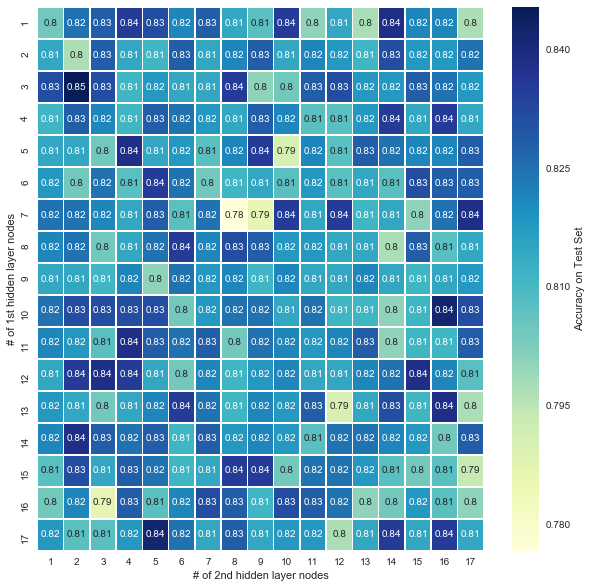

In [67]:
accuracies = pd.DataFrame(accuracies)

plt.figure(figsize = (10,10))
ax = sns.heatmap(data=accuracies, cmap="YlGnBu", annot=True, linewidths=.5, cbar_kws={'label': 'Accuracy on Test Set'})
ax.set(xlabel='# of 2nd hidden layer nodes', ylabel='# of 1st hidden layer nodes')
ax.set_xticklabels(np.arange(1, 18))
ax.set_yticklabels(reversed(np.arange(1, 18)))

# Ensemble Methods

Since we have created so many models, we thought it would be worth looking into ways to combine the best models. Below is a graph that shows the approximate accuracy of each model. The three models with the highest accuracy rates are RFC, SVC, and GBC. We will use these three models going forward.

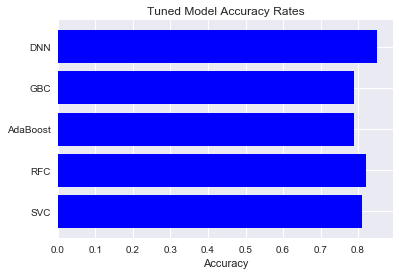

In [16]:
class_rates = np.array([.81, .82, .79, .79, .85])
features = np.array(['SVC', 'RFC', 'AdaBoost', 'GBC', 'DNN'])

plt.title('Tuned Model Accuracy Rates')
plt.barh(range(len(class_rates)), class_rates, color='b', align='center')
plt.yticks(range(len(class_rates)), features) ## removed [indices]
plt.xlabel('Accuracy')
plt.show()

Now that we have selected the best models, we will create a 10 fold cross-validation set. This will allow us to fit our best models (with the parameters selected above) with 9 of the folds and make predictions about the remainig fold. We will cycle through all of the folds and store all of the predictions in an array called 'predictions'. These prediction will be used to begin exploring ways to combine all of our best models.

In [66]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[18])]
skf = StratifiedKFold(n_splits = 10, shuffle = True)
j = 0

#create a numpy array with the CV predictions for the training data
predictions = np.zeros((len(data), 5))

#fit all of the models with the training data and fill and array with the predictions for the test data
for train_index, test_index in skf.split(data, targets):
    X_train = data.iloc[train_index]
    X_test = data.iloc[test_index]
    y_train = targets.iloc[train_index]
    y_test = targets.iloc[test_index]

    rf = RandomForestClassifier(max_depth = 9, n_estimators = 300)
    rf.fit(X_train, y_train)

    sv = SVC(C=100, gamma = .005, kernel = 'rbf')
    sv.fit(X_train, y_train)

    ada = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = .5, n_estimators = 100)
    ada.fit(X_train, y_train)
    
    params={'n_estimators': 1000, 'max_depth': 12,
            'min_samples_leaf': 5, 'learning_rate': 0.001,
            'max_features': 'sqrt', 'random_state': seed}
    
    gbcm = GradientBoostingClassifier(**params).fit(X_train, y_train)
    
    classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                                  hidden_units=[12, 3],
                                                  n_classes=2,
                                                  optimizer=tf.train.AdamOptimizer())

    train_input_fn = tf.estimator.inputs.numpy_input_fn(
              x={"x": np.array(X_train)},
              y=np.array(y_train),
              num_epochs=None,
              shuffle=True)

    classifier.train(input_fn=train_input_fn, steps=5000)

    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": np.array(X_test)},
            num_epochs=1,
            shuffle=False)

    kaanPredictions = list(classifier.predict(input_fn=predict_input_fn))
    kaanPredictions=np.array(kaanPredictions)
    finalPreds = []
    for i in range(len(kaanPredictions)):
        temp = kaanPredictions[i]['class_ids'][0]
        finalPreds.append(temp)


    rf_test = rf.predict(X_test)
    sv_test = sv.predict(X_test)
    ada_test = ada.predict(X_test)
    gbcm_test = gbcm.predict(X_test)

    y_true = y_test

    for k in range(0, len(test_index)):
        predictions[test_index[k]][0] = rf_test[k]
        predictions[test_index[k]][1] = sv_test[k]
        predictions[test_index[k]][2] = ada_test[k]
        predictions[test_index[k]][3] = gbcm_test[k]
        predictions[test_index[k]][4] = kaanPredictions[k]['class_ids'][0]
 


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\stahlaj\\AppData\\Local\\Temp\\tmpfjclwy9k', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\stahlaj\AppData\Local\Temp\tmpfjclwy9k\model.ckpt.
INFO:tensorflow:loss = 89.4289, step = 1
INFO:tensorflow:global_step/sec: 842.314
INFO:tensorflow:loss = 86.3901, step = 101 (0.116 sec)
INFO:tensorflow:global_step/sec: 1056.45
INFO:tensorflow:loss = 87.2681, step = 201 (0.110 sec)
INFO:tensorflow:global_step/sec: 1027.12
INFO:tensorflow:loss = 85.6653, step = 301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1098.26
INFO:tensorflow:loss = 82.4497, step = 401 (0.091 sec)
INFO:tensorflow:global_step/sec: 957.857
INFO:te

INFO:tensorflow:loss = 56.8202, step = 2001 (0.088 sec)
INFO:tensorflow:global_step/sec: 1135.58
INFO:tensorflow:loss = 62.3482, step = 2101 (0.088 sec)
INFO:tensorflow:global_step/sec: 1051.91
INFO:tensorflow:loss = 59.5985, step = 2201 (0.095 sec)
INFO:tensorflow:global_step/sec: 1098.14
INFO:tensorflow:loss = 61.5499, step = 2301 (0.091 sec)
INFO:tensorflow:global_step/sec: 1122.82
INFO:tensorflow:loss = 48.0801, step = 2401 (0.088 sec)
INFO:tensorflow:global_step/sec: 1248.96
INFO:tensorflow:loss = 44.0799, step = 2501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1220.59
INFO:tensorflow:loss = 56.7127, step = 2601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1119.82
INFO:tensorflow:loss = 47.9605, step = 2701 (0.088 sec)
INFO:tensorflow:global_step/sec: 1070.01
INFO:tensorflow:loss = 52.3044, step = 2801 (0.094 sec)
INFO:tensorflow:global_step/sec: 1085.09
INFO:tensorflow:loss = 58.7173, step = 2901 (0.092 sec)
INFO:tensorflow:global_step/sec: 1118.89
INFO:tensorflow:loss = 55.9472

INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 57.0747, step = 4701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1283.55
INFO:tensorflow:loss = 47.8978, step = 4801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1002.03
INFO:tensorflow:loss = 60.4629, step = 4901 (0.102 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\stahlaj\AppData\Local\Temp\tmptsqrdxkc\model.ckpt.
INFO:tensorflow:Loss for final step: 48.0622.
INFO:tensorflow:Restoring parameters from C:\Users\stahlaj\AppData\Local\Temp\tmptsqrdxkc\model.ckpt-5000
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\stahlaj\\AppData\\Local\\Temp\\tmpc_mk211v', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving chec

INFO:tensorflow:global_step/sec: 1279.89
INFO:tensorflow:loss = 55.4093, step = 1501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 55.3887, step = 1601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.9
INFO:tensorflow:loss = 67.0776, step = 1701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1066.59
INFO:tensorflow:loss = 55.415, step = 1801 (0.094 sec)
INFO:tensorflow:global_step/sec: 1139.97
INFO:tensorflow:loss = 60.3985, step = 1901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1165.76
INFO:tensorflow:loss = 61.6168, step = 2001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1353.05
INFO:tensorflow:loss = 56.2435, step = 2101 (0.071 sec)
INFO:tensorflow:global_step/sec: 1066.58
INFO:tensorflow:loss = 59.9227, step = 2201 (0.094 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 53.5068, step = 2301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1066.59
INFO:tensorflow:loss = 60.9863, step = 2401 (0.094 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 61.7665, step = 4101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1071.02
INFO:tensorflow:loss = 53.4127, step = 4201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1244.84
INFO:tensorflow:loss = 65.6802, step = 4301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1296.52
INFO:tensorflow:loss = 55.3901, step = 4401 (0.093 sec)
INFO:tensorflow:global_step/sec: 1279.88
INFO:tensorflow:loss = 49.1726, step = 4501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1279.92
INFO:tensorflow:loss = 43.8832, step = 4601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.89
INFO:tensorflow:loss = 40.4339, step = 4701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.9
INFO:tensorflow:loss = 48.8584, step = 4801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1066.6
INFO:tensorflow:loss = 60.7066, step = 4901 (0.094 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\stahlaj\AppData\Local\Temp\tmpplkr3_hc\model.ckpt.
INFO:tensorflow:Loss for final step: 48.7118.
INFO:tensorflow

INFO:tensorflow:global_step/sec: 1599.88
INFO:tensorflow:loss = 61.7819, step = 901 (0.063 sec)
INFO:tensorflow:global_step/sec: 1066.59
INFO:tensorflow:loss = 66.9509, step = 1001 (0.094 sec)
INFO:tensorflow:global_step/sec: 1221.49
INFO:tensorflow:loss = 63.923, step = 1101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1326.72
INFO:tensorflow:loss = 59.7468, step = 1201 (0.072 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 47.6837, step = 1301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 64.5632, step = 1401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 60.3048, step = 1501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1275.47
INFO:tensorflow:loss = 60.1185, step = 1601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1066.6
INFO:tensorflow:loss = 57.8697, step = 1701 (0.094 sec)
INFO:tensorflow:global_step/sec: 1263.33
INFO:tensorflow:loss = 57.6556, step = 1801 (0.079 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:loss = 56.7034, step = 3501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 42.8739, step = 3601 (0.094 sec)
INFO:tensorflow:global_step/sec: 1039.45
INFO:tensorflow:loss = 52.9878, step = 3701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1513.77
INFO:tensorflow:loss = 58.0988, step = 3801 (0.063 sec)
INFO:tensorflow:global_step/sec: 1140.86
INFO:tensorflow:loss = 44.6974, step = 3901 (0.088 sec)
INFO:tensorflow:global_step/sec: 1066.58
INFO:tensorflow:loss = 41.7267, step = 4001 (0.094 sec)
INFO:tensorflow:global_step/sec: 1279.89
INFO:tensorflow:loss = 42.0632, step = 4101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 57.2558, step = 4201 (0.094 sec)
INFO:tensorflow:global_step/sec: 1279.91
INFO:tensorflow:loss = 45.4935, step = 4301 (0.063 sec)
INFO:tensorflow:global_step/sec: 1066.59
INFO:tensorflow:loss = 42.8329, step = 4401 (0.094 sec)
INFO:tensorflow:global_step/sec: 1196.79
INFO:tensorflow:loss = 49.3299

### Stacked Ensemble Learner

This learner will use logestic regression to figure out how to combine the models. This will allow the model to figure out where the different models work well, and where they are weakest. To tune the parameters we experimented with the penalty type and the regularization strength. We will use a 10 fold CV set to find the approximate accuracy of the model.

In [69]:
#stacked ensemble model with best SV, RF, LOGREG, ADA, and Kaan's model
acc = np.zeros(10)
j = 0
for train_index, test_index in skf.split(predictions, targets):
    logreg_stack = linear_model.LogisticRegression(penalty = 'l2', C=1e2)
    logreg_stack.fit(predictions[train_index], targets[train_index])
    
    y_true, y_pred = targets[test_index], logreg_stack.predict(predictions[test_index])
    
    print('\nFold {} Classification Report'.format(j+1))
    print(classification_report(y_true, y_pred))
    acc[j] = 1.0 * sum(y_pred == y_true) / len(test_index)
    j += 1

print('\nAverage Accuracy of the model:')
print(mean(acc))


Fold 1 Classification Report
             precision    recall  f1-score   support

          0       0.84      0.98      0.91        55
          1       0.96      0.71      0.82        35

avg / total       0.89      0.88      0.87        90


Fold 2 Classification Report
             precision    recall  f1-score   support

          0       0.89      0.89      0.89        55
          1       0.83      0.83      0.83        35

avg / total       0.87      0.87      0.87        90


Fold 3 Classification Report
             precision    recall  f1-score   support

          0       0.75      0.84      0.79        55
          1       0.68      0.56      0.61        34

avg / total       0.73      0.73      0.72        89


Fold 4 Classification Report
             precision    recall  f1-score   support

          0       0.88      0.89      0.88        55
          1       0.82      0.79      0.81        34

avg / total       0.85      0.85      0.85        89


Fold 5 Classificati

### 'Majority Vote' Ensemble

We will also consider a 'majority vote' ensemble. This learner will use the predictions of the best models to predict whether a passenger will surive or not. The model simply assigns each passenger the prediction the majority of the models have assigned it.

In [72]:
sum(predictions[1])

5.0

In [74]:
# majority vote ensemble with best models

maj = np.zeros(len(predictions))

for i in range(0, len(maj)):
    maj[i] = sum(predictions[i])
    
maj[maj < 3] = 0
maj[maj >= 3] = 1  

print('\nClassification Report')
print(classification_report(targets, maj))


Classification Report
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       549
          1       0.81      0.72      0.76       342

avg / total       0.83      0.83      0.83       891



# Preprocessing of Test Data

We will follow the same preprocessing procedures as the training data for the test data. 

In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Family_size    418 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB


### Fare

There was one missing values in Fare for the test data, so we used the median of all the Fares.

In [136]:
test_fare = imputer.fit_transform(df_test[['Fare']])
fares_test = pd.DataFrame(test_fare, columns=['Fare'])

### Title

In [152]:
unique(df['Title'])

array(['Lady', 'Master', 'Miss', 'Mr', 'Mrs', 'Sir'], dtype=object)

We will follow the same basic procedure. This time there are significantly fewer Titles, so only a few need to be mapped to 'Sir' and 'Lady'.

In [113]:
df_test['Title'] = df_test.Name.map(prefix)
unique(df_test['Title'])

array(['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'], dtype=object)

In [114]:

df_test.loc[(df_test.Title == 'Rev') |
            (df_test.Title == 'Dr') |
            (df_test.Title == 'Col'), 'Title']='Sir'

df_test.loc[(df_test.Title == 'Dona'), 'Title']='Lady'

title_test = lb.fit_transform(df_test['Title'])
title_columns_test = lb.classes_
titles_test = pd.DataFrame(data=title_test, columns=title_columns_test)

### Family Size

In [115]:
df_test['Family_size'] = df_test.SibSp + df_test.Parch + 1 

### Pclass

In [116]:
pclass_test = lb.fit_transform(df_test['Pclass'])
pclass_columns_test = ['Class1', 'Class2', 'Class3']
pclasses_test = pd.DataFrame(data=pclass_test, columns=pclass_columns_test)

### Sex

In [117]:
sex_test = lb.fit_transform(df_test['Sex'])
genders_test = pd.DataFrame(data=sex_test, columns=['Sex_transform'])

### Embark

There are no missing 'Embarked' values in this data set, so we will just need to convert it to a one-hot encoded dataframe.

In [118]:
embark_test = lb.fit_transform(df_test['Embarked'])
embark_columns = lb.classes_
embarked_test = pd.DataFrame(data=embark_test, columns=embark_columns)

### Age

The training and testing datasets were combined to compute the median age values grouped by class and title.

In [119]:
print(df_test.groupby(['Pclass','Title'])['Age'].median())
df.groupby(['Pclass','Title'])['Age'].median()

Pclass  Title 
1       Lady      39.0
        Master     9.5
        Miss      32.0
        Mr        42.0
        Mrs       48.0
        Sir       53.0
2       Master     5.0
        Miss      19.5
        Mr        28.0
        Mrs       29.0
        Sir       35.5
3       Master     7.0
        Miss      22.0
        Mr        25.0
        Mrs       28.0
        Ms         NaN
Name: Age, dtype: float64


Pclass  Title 
1       Lady      24.0
        Master     4.0
        Miss      30.0
        Mr        40.0
        Mrs       41.5
        Sir       49.0
2       Lady      28.0
        Master     1.0
        Miss      24.0
        Mr        31.0
        Mrs       32.0
        Sir       46.5
3       Master     4.0
        Miss      18.0
        Mr        26.0
        Mrs       31.0
Name: Age, dtype: float64

In [132]:
group_train_test_age = pd.concat([df[['Age','Pclass', 'Title']], df_test[['Age','Pclass', 'Title']]], ignore_index = True)


In [124]:
group_train_test_age.groupby(['Pclass','Title'])['Age'].median()

Pclass  Title 
1       Lady      28.5
        Master     6.0
        Miss      30.0
        Mr        40.0
        Mrs       44.0
        Sir       49.0
2       Lady      28.0
        Master     2.0
        Miss      20.5
        Mr        30.0
        Mrs       30.5
        Sir       41.5
3       Master     5.0
        Miss      18.0
        Mr        26.0
        Mrs       31.0
        Ms         NaN
Name: Age, dtype: float64

In [146]:
median_age = group_train_test_age.median()
df_test.loc[(df_test.Title == 'Ms'), 'Age'] = median_age[0]

In [134]:
df_test['Age'] = group_train_test_age.groupby(['Pclass','Title'])['Age'].transform(lambda x:x.fillna(x.median()))

### Combine Transformed Dataframes into Testing Dataset

In [147]:
numerical_attributes=['SibSp', 'Parch', 'Age', 'Family_size']
data_test = pd.concat([df_test[numerical_attributes], fares_test, embarked_test, titles_test, pclasses_test, genders_test], axis=1)
numerical_attributes=['SibSp', 'Parch', 'Age', 'Family_size', 'Fare']
# scale the numerical attributes
data_test[numerical_attributes] = scaler.fit_transform(data_test[numerical_attributes])

In [137]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Family_size    418 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB


# Final Predictions

In [ ]:
data_test.drop('Ms', axis=1, inplace=True)

In [164]:
#Make the final predictions


#fit the models with all of the test data
rf.fit(data, targets)

sv.fit(data, targets)

ada.fit(data, targets)
     
gbcm.fit(data, targets)
    
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                                  hidden_units=[12, 3],
                                                  n_classes=2,
                                                  optimizer=tf.train.AdamOptimizer())
    
train_input_fn = tf.estimator.inputs.numpy_input_fn(
              x={"x": np.array(data)},
              y=np.array(targets),
              num_epochs=None,
              shuffle=True)

classifier.train(input_fn=train_input_fn, steps=10000)


#get predictions for the Test data
rf_test = rf.predict(data_test)
sv_test = sv.predict(data_test)
ada_test = ada.predict(data_test)
gbcm_test = gbcm.predict(data_test)



predict_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": np.array(data_test)},
            num_epochs=1,
            shuffle=False)

kaanPredictions = list(classifier.predict(input_fn=predict_input_fn))
kaanPredictions=np.array(kaanPredictions)
finalPreds = []
for i in range(len(kaanPredictions)):
    temp = kaanPredictions[i]['class_ids'][0]
    finalPreds.append(temp)

model_predictions = np.zeros((len(data_test), 5))

model_predictions[:,0] = rf_test
model_predictions[:,1] = sv_test
model_predictions[:,2] = gbcm_test
model_predictions[:,3] = ada_test
model_predictions[:,4] = finalPreds

#use the stack_model fitted with all of the training data
logreg_final = linear_model.LogisticRegression(penalty = 'l2', C=1e2)
logreg_final.fit(predictions, targets)

test_preds = logreg_final.predict(model_predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\stahlaj\\AppData\\Local\\Temp\\tmp3j_34t2g', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\stahlaj\AppData\Local\Temp\tmp3j_34t2g\model.ckpt.
INFO:tensorflow:loss = 89.4548, step = 1
INFO:tensorflow:global_step/sec: 829.535
INFO:tensorflow:loss = 70.2211, step = 101 (0.105 sec)
INFO:tensorflow:global_step/sec: 1023.36
INFO:tensorflow:loss = 56.4349, step = 201 (0.098 sec)
INFO:tensorflow:global_step/sec: 1139.66
INFO:tensorflow:loss = 57.7092, step = 301 (0.103 sec)
INFO:tensorflow:global_step/sec: 1035.33
INFO:tensorflow:loss = 49.8021, step = 401 (0.097 sec)
INFO:tensorflow:global_step/sec: 961.996
INFO:te

INFO:tensorflow:global_step/sec: 1125.48
INFO:tensorflow:loss = 46.0023, step = 7901 (0.073 sec)
INFO:tensorflow:global_step/sec: 1328.53
INFO:tensorflow:loss = 41.2101, step = 8001 (0.091 sec)
INFO:tensorflow:global_step/sec: 1117.02
INFO:tensorflow:loss = 28.763, step = 8101 (0.090 sec)
INFO:tensorflow:global_step/sec: 966.741
INFO:tensorflow:loss = 39.6291, step = 8201 (0.091 sec)
INFO:tensorflow:global_step/sec: 1075.19
INFO:tensorflow:loss = 46.6547, step = 8301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1198.37
INFO:tensorflow:loss = 35.0691, step = 8401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1020.01
INFO:tensorflow:loss = 32.8614, step = 8501 (0.098 sec)
INFO:tensorflow:global_step/sec: 1043.4
INFO:tensorflow:loss = 32.1572, step = 8601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1196.63
INFO:tensorflow:loss = 41.8919, step = 8701 (0.084 sec)
INFO:tensorflow:global_step/sec: 917.945
INFO:tensorflow:loss = 42.0773, step = 8801 (0.109 sec)
INFO:tensorflow:global_step/sec:

In [166]:
#export the data
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'] , 'Survived': test_preds})
submission.to_csv('titanic.csv', index=False)

# Conclusion

Our best model ended up with an accuracy of .78947. To improve this score even further we would devote some more time to feature extraction. In our model we didn't include the predictors 'Ticket' or 'Cabin'. When we examined Ticket, there were 681 unique values out of the 891 entries. Since the vast majority of passengers had a unique ticket number we didn't see any value in including it in our models. The 'Cabin' predictor could have been very useful. Passengers closer to stairs or the lifeboats might have an increased rate of survival. We were unable to use it as a predictor because of all of the missing values in the data. It might be worth while to see if we are able to use the information in the ticket column to assign each passenger to a cabin.
<br>
<br>
There were several challenges we encountered while working on this project. One particularly vexing challenge was handling the missing values in the data. The training set and test set were both missing large amounts of the 'Age' feature. We tried to impute these 'Age' values with a predictive neural net model trained on the other features, but problems with importing these values back into the original pandas DataFrame prevented us from fully realizing this imputation. We decided to instead impute 
these values with the median value of both the training and test set combined. 
<br>
<br>
Another challenge/limitation was the use of black-box API calls to run our learning algorithms. For instance, our neural net classifier was built using the tensorflow.estimator.DNNClassifier class, which automatically creates a neural net scoped with user parameters. This offered ease of implementation at the possible cost of greater control over the model. We encountered the same limitation when using the scikit-learn API to build our other models, although this was somewhat mitigated by our usage of hyperparameter optimization. We trained our neural net model 289 times with different combinations of hidden layer width to determine which would give us the best performance. We also used grid search to tune the parameters that we passed to our SVM, random forest, GBC, and Adaboosting classifiers. 
<br>
<br>
Finally, our team felt that the data set was rather limited in the sense that of the 2200 actual passengers on board, we only had 891 training values, with many missing feature values for age. We understand that data in real-world, practical situations often has similar limitations, but that does not make the task before us any easier. We also believe that leaving out crew member data (we think that's the case), leads to some loss in predictive power. 